<div style="text-align: center;">

# **Exploring Mental Health Data**  

[![Kaggle Competition](https://img.shields.io/badge/Kaggle-Competition-blue)](https://www.kaggle.com/competitions/playground-series-s4e11)  
[![GitHub](https://img.shields.io/badge/GitHub-Project-green)](https://github.com/karimrochd/Exploring-Mental-Health-Data)

---

[Ilan Aliouchouche](https://github.com/ilanaliouchouche)  
[Karim Rochd](https://github.com/karimrochd)  
[Feddy Immoula](https://github.com/feddy321)  

---

### **MSc 1 Artificial Intelligence**  
**Université Paris-Saclay**

---
</div>

<div style="text-align: left;">

## **Contents**

---

### **[1. Comprehensive Data Exploration and Preparation](#comprehensive-data-exploration-and-preparation)**
- **1.1** [Task Overview and Target Variable Analysis](#task-overview-and-target-variable-analysis)
- **1.2** [NaN Patterns and Dataset Partitioning](#nan-patterns-and-dataset-partitioning)

### **[2. Student Pipeline](#student-pipeline)**
- **2.1** [Student Dataset Analysis and Refinement](#detailed-dataset-analysis-and-refinement)
  - **2.1.1** [Feature engineering](#feature-exploration-and-preliminary-cleaning)
  - **2.1.2** [Pattern Visualization](#dimensionality-reduction-and-pattern-visualization)
- **2.2** [Model Development and Optimization](#model-development-and-optimization)
  - **2.2.1** [Learning and Generalization](#model-learning-dynamics-and-generalization)
  - **2.2.2** [Parameter Tuning through 1D and 2D Search](#parameter-tuning-through-1d-and-2d-search)
  - **2.2.3** [Advanced Hyperparameter Search with Free-Gradient Methods](#advanced-hyperparameter-search-with-non-gradient-methods)
  - **2.2.4** [Addressing Class Imbalance](#addressing-class-imbalance)
  - **2.2.5** [Benchmark of Logistic Regression Methods](#comparative-evaluation-of-logistic-regression-methods)
  - **2.2.6** [Ensemble Learning](#ensemble-learning-and-model-stacking)
  - **2.2.7** [Student Dataset Final Benchmark](#student-data-final-benchmark)

### **[3. Working Professional Pipeline](#working-professional-data-pipeline)**
- **3.1** [Pro Dataset Analysis and Refinement](#comprehensive-dataset-cleaning-and-analysis)
  - **3.1.1** [Feature engineering](#feature-exploration-and-refinement)
  - **3.1.2** [Pattern Visualization](#dimensionality-reduction-and-correlation-analysis)
- **3.2** [Model Development and Optimization](#model-development-and-optimization-1)
  - **3.2.1** [Advanced Hyperparameter Search with Free-Gradient Methods](#advanced-hyperparameter-search-with-non-gradient-methods-1)
  - **3.2.2** [Addressing Class Imbalance](#addressing-class-imbalance-1)
  - **3.2.3** [Benchmark of Logistic Regression Methods](#comparative-evaluation-of-logistic-regression-methods-1)
  - **3.2.4** [Ensemble Learning](#ensemble-learning-and-model-stacking-1)
  - **3.2.5** [Professional Dataset Final Benchmark](#professional-data-final-benchmark)

### **[4. Error Analysis and Model Evaluation](#error-analysis-and-model-evaluation)**
- **4.1** [Loss Distribution and Feature Analysis](#loss-distribution-and-feature-analysis)
- **4.2** [Precision-Recall Threshold](#precision-recall-threshold-dynamics)

</div>

### **What you will explore in this notebook**

- **Justified Hypotheses and Decision-Making**  
- **NaN Pattern Detection**  
- **Principal Component Analysis**:  
  - Correlation Circle Visualization  
  - 2D Data Projection
  - Explained Variance Ratio Analysis
  - Hopkins Statistic for Cluster Detection Evolution
  - Dimensionality Reduction and Decorrelation
- **Evaluation Metrics**:  
  - MCC for robust Model Comparison
  - Precision-Recall Curves Tailored to our Use Case
- **Learning Curves Analysis** 
- **Hyperparameter Optimization**:  
  - Graphical Representation of HP Impacts  
  - Optimization Using Tree-Structured Parzen Estimator Algorithm  
- **Imbalanced Data Handling**:  
  - Balanced Binary Cross-Entropy 
  - SMOTE Oversampling Technique  
  - Nonuniform Negative Sampling with Log Odds Correction  
- **Model Benchmarking**:
  - Comprehensive Classification Benchmark  
  - Error Distribution Analysis Across Features

In [188]:
import os

from typing import (
    List,
    Union,
    Tuple, 
    Dict,
    Callable,
    Optional,
    Literal
)

import pandas as pd
import numpy as np

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import seaborn as sns
from skimpy import skim
import missingno as msno

import optuna

from sklearn.base import (
    BaseEstimator,
    ClassifierMixin
)
from sklearn.compose import (
    ColumnTransformer,
    make_column_transformer)
from sklearn.pipeline import (
    Pipeline,
    make_pipeline
)
from sklearn.ensemble import (
    RandomForestClassifier,
    StackingClassifier
)
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import (
    train_test_split,
    learning_curve,
    cross_validate,
    cross_val_score
)                                    
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score,
    roc_curve,
    log_loss,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    confusion_matrix,
    precision_score,
    recall_score,
    classification_report,
    precision_recall_curve
)
from sklearn.neighbors import NearestNeighbors
from sklearn.utils.class_weight import compute_sample_weight

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier

import warnings
from tqdm.auto import tqdm

warnings.filterwarnings('ignore')
os.environ['PYTHONWARNINGS'] = 'ignore'
optuna.logging.set_verbosity(optuna.logging.ERROR)
tqdm.pandas()
plt.style.use('ggplot')

<a id="comprehensive-data-exploration-and-preparation"></a>
## **1. Comprehensive Data Exploration and Preparation**

---

<a id="task-overview-and-target-variable-analysis"></a>
### **1.1 Task Overview and Target Variable Analysis**

### **Dataset Analysis Introduction**

In this section, we will analyze the dataset and specifically address the following questions:  
- **What will be our task?** *(Classification or regression)*  

- **How many data points do we have available?**  

- **Are the data of good quality?** *(Balanced, presence of NaN, etc.)*  

In [48]:
data = pd.read_csv('train.csv')

In [49]:
data.head()

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

In [50]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 140700 │ │ string      │ 10    │                                                          │
│ │ Number of columns │ 20     │ │ float64     │ 8     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA      ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ id                  │       0 │      0 │  70350 │  40620 │    0 │ 35170 │ 70350 │ 105500 │ 140700 │ ▇▇▇▇▇▇ │  │
│ │ Age                 │       0 │      0 │  40.39 │  12.38 │   18 │    29 │    42 │     51 │     60 │ ▆▅▅▆▇▇ │  │
│ │ Academic Pressure   │  112803 │  80.17 │  3.142 │   1.38 │    1 │     2 │     3 │      4 │      5 │ ▅▅ ▇▆▇ │  │
│ │ Work Pressure       │   27918 │  19.84 │  2.999 │  1.406 │    1 │     2 │     3 │      4 │      5 │ ▇▇ ▇▇▇ │  │
│ │ CGPA                │  112802 │  80.17 │  7.659 │  1.464 │ 5.03 │  6.29 │  7.77 │   8.92 │     10 │ ▇▅▇▇▇▇ │  │
│ │ Study Satisfaction  │  112803 │  80.17 │  2.945 │   1.36 │    1 │     2 │     3 │      4 │      5 │ ▇▇ ▇▇▆ │  │
│ │ Job Satisfaction    │   27910 │  19.84 │  2.974 │  1.416 │    1 │     2 │     3 │      4 │      5 │ ▇▇ ▇▇▇ │  │
│ │ Work/Study Hours    │       0 │      0 │  6.253 │  3.854 │    0 │     3 │     6 │     10 │     12 │ ▅▅▃▅▅▇ │  │
│ │ Financial Stress    │       4 │      0 │  2.989 │  1.414 │    1 │     2 │     3 │      4 │      5 │ ▇▇ ▇▇▇ │  │
│ │ Depression          │       0 │      0 │ 0.1817 │ 0.3856 │    0 │     0 │     0 │      0 │      1 │ ▇    ▂ │  │
│ └─────────────────────┴─────────┴────────┴────────┴────────┴──────┴───────┴───────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA         ┃ NA %       ┃ words per row          ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Name                               │          0 │          0 │                      1 │             140702 │  │
│ │ Gender                             │          0 │          0 │                      1 │             140700 │  │
│ │ City                               │          0 │          0 │                      1 │             140704 │  │
│ │ Working Professional or Student    │          0 │          0 │                    1.8 │             253499 │  │
│ │ Profession                         │      36630 │      26.03 │                      1 │             144073 │  │
│ │ Sleep Duration                     │          0 │          0 │                      3 │             424406 │  │
│ │ Dietary Habits                     │          4 │   

As observed using `skimpy`, the dataset contains **8 numerical columns** and **12 categorical columns**.  
The dependent feature is the **Depression** column, which contains two unique values (0 or 1), indicating that this is a **binary classification task**.

Two key observations arise:  
- **Categorical data dominance:** A large number of categorical features will require proper encoding for model training.  

- **Significant presence of missing values:** Many columns have missing values, with some sharing the exact same proportion.  
Therefore, we won't immediately resort to using `Imputer` techniques without further investigation.  

In [51]:
data = data.drop(['id', 'Name'], axis=1)

In [52]:
def plot_target_distribution(df: pd.DataFrame,
                             target: str) -> None:
    """
    Plot the distribution of the target variable.

    :param df: The dataset.
    :param target: The target variable.
    """

    df[target].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0, 0.1])
    plt.ylabel('')
    plt.title('Target distribution')
    plt.show()

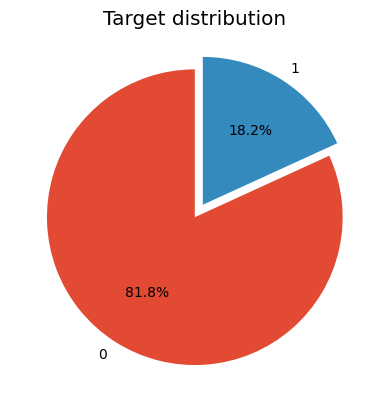

In [53]:
TARGET_COL = 'Depression'
plot_target_distribution(data, TARGET_COL)

As illustrated by the pie chart, the data is significantly imbalanced.  

This necessitates appropriate actions to address the imbalance:

1. Use **appropriate evaluation metrics** that account for class imbalance.  

2. **Stratify** $X_{\text{train}}$ and $X_{\text{test}}$ to ensure proportional representation of classes.

In [54]:
data_categorical_cols = data.select_dtypes(include='object').columns
data_numerical_cols = data.select_dtypes(exclude='object').columns

assert len(data_categorical_cols) + len(data_numerical_cols) == data.shape[1]

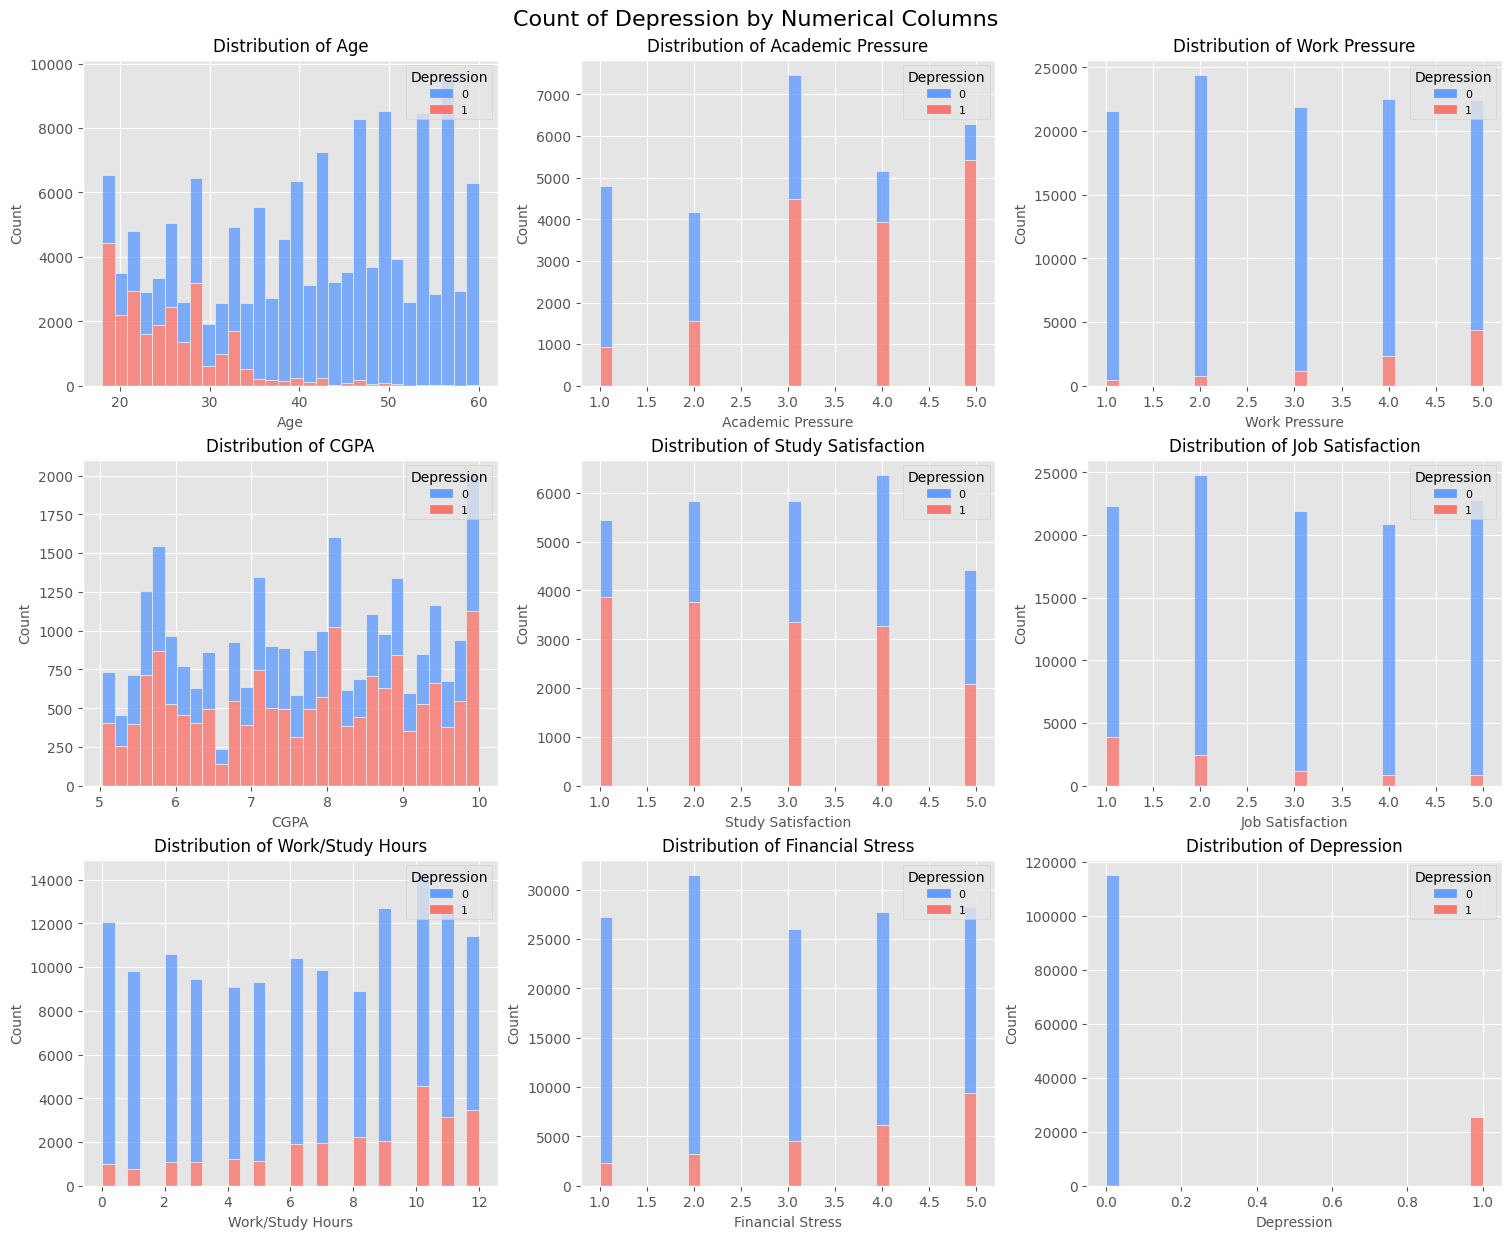

In [196]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12), constrained_layout=True)

colors = ['#619CFF', '#F8766D']

for i, col in enumerate(data_numerical_cols):
    ax = axes[i // 3, i % 3]
    
    sns.histplot(
        data=data, 
        x=col, 
        hue=TARGET_COL, 
        multiple="stack",
        alpha=0.8, 
        palette=colors,
        bins=30, 
        ax=ax
    )
    
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

    
    handles = [
        mpatches.Patch(color=colors[0], label=f'0'),
        mpatches.Patch(color=colors[1], label=f'1')
    ]
    ax.legend(handles=handles, title=TARGET_COL, loc='upper right', fontsize=8)


plt.suptitle('Count of Depression by Numerical Columns', y=1.02, fontsize=16)
plt.show()

del fig, axes, handles

As observed in this figure, beyond the obvious correlations such as **Work Pressure** and the target column **Depression**, an interesting insight emerges: for the **Age** column, the higher the age, the less likely individuals are to exhibit depressive tendencies.

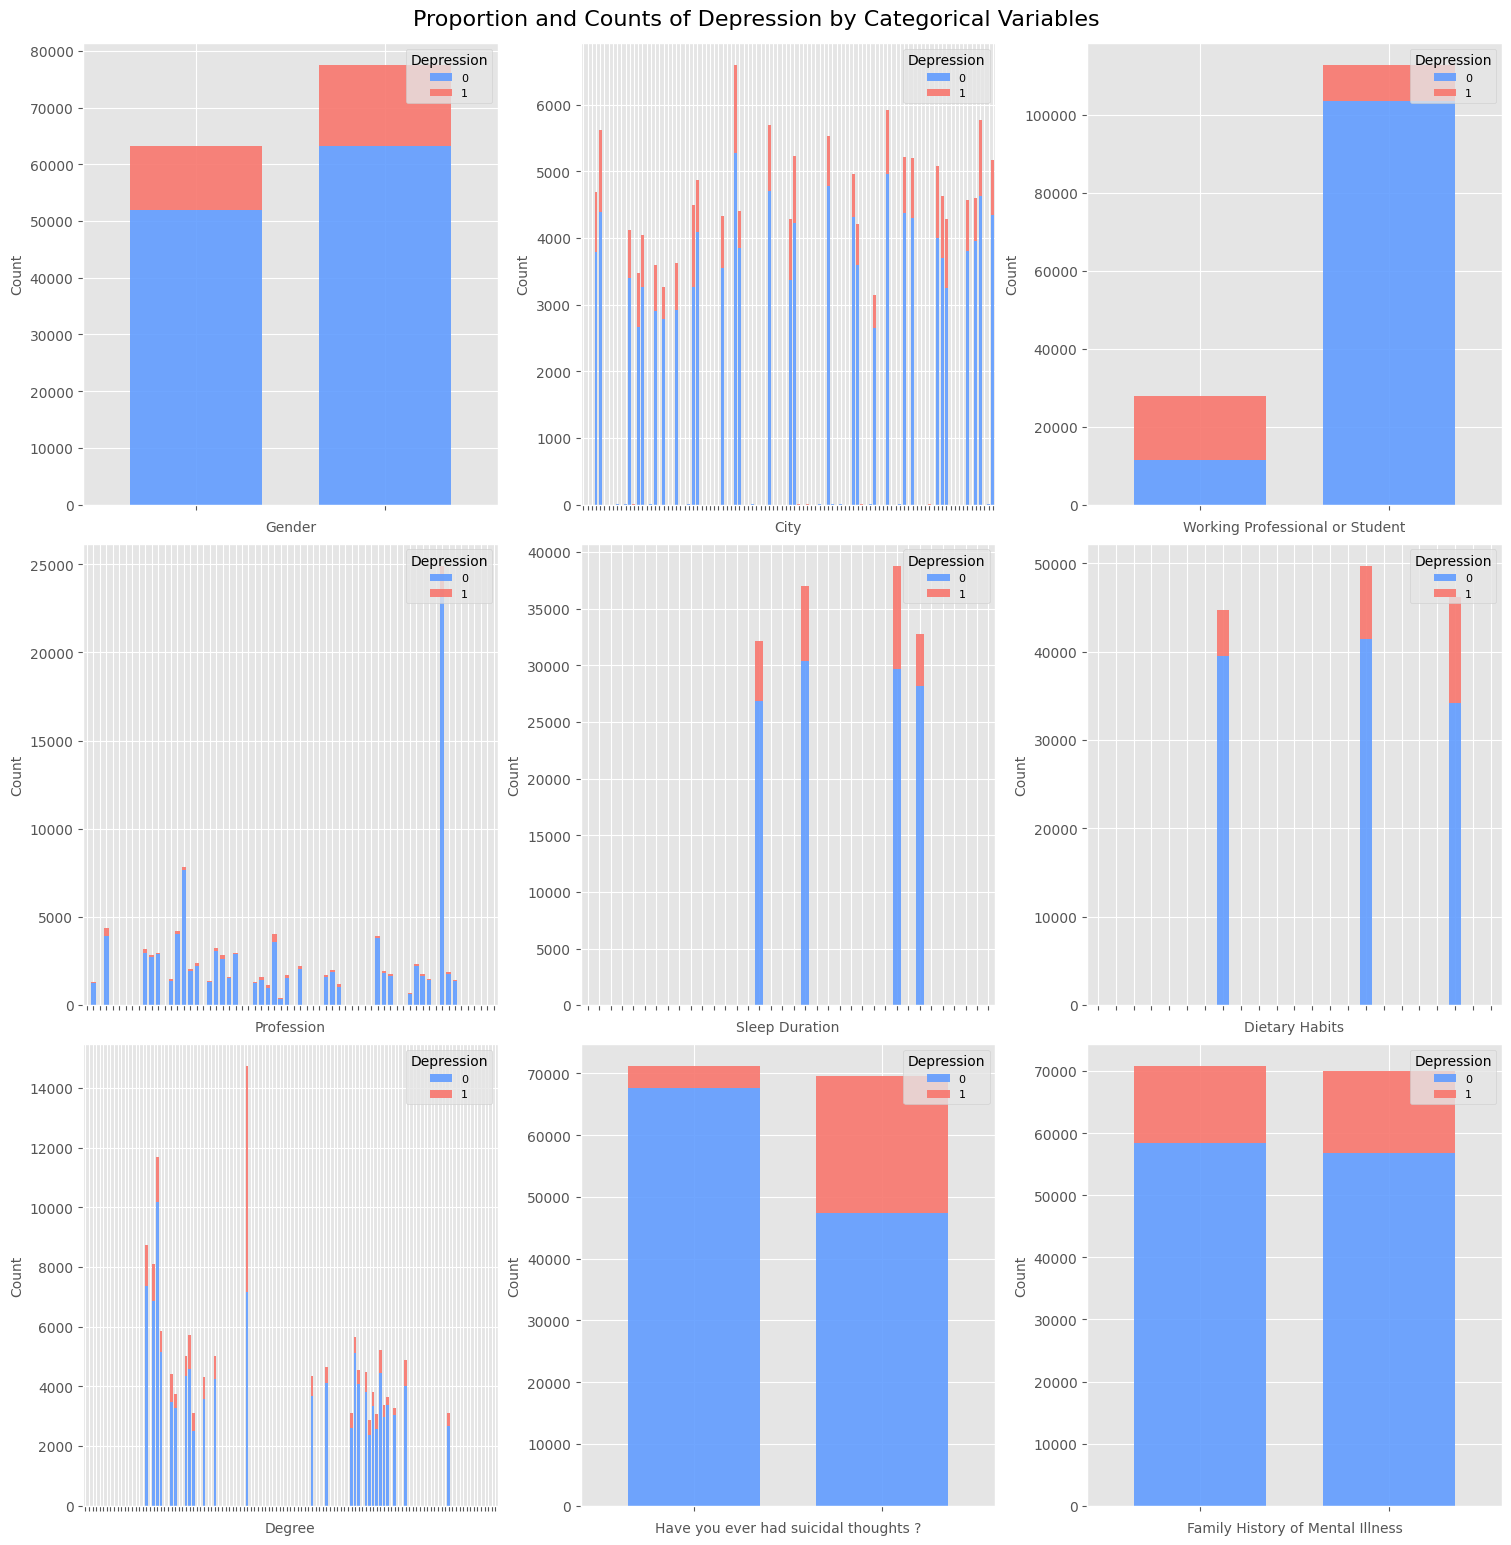

In [181]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(data_categorical_cols):
    if col == TARGET_COL:
        continue

    ax = axes[i]

    grouped_data = data.groupby([col, TARGET_COL]).size().unstack(fill_value=0)

    total_counts = grouped_data.sum(axis=1)
    grouped_data.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        color=colors,
        alpha=0.9,
        width=0.7
    )

    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.set_xticklabels([])
    ax.legend(title=TARGET_COL, loc='upper right', fontsize=8)

plt.suptitle('Proportion and Counts of Depression by Categorical Variables', y=1.02, fontsize=16)
plt.show()

del grouped_data, total_counts

<a id="nan-patterns-and-dataset-partitioning"></a>
### **1.2 NaN Patterns and Dataset Partitioning**

In this section, we will address the **NaN values** identified in the previous analysis, where we observed similar proportions of missing data across several columns.  
To investigate this further, we will leverage the `missigno` package for a more detailed examination.

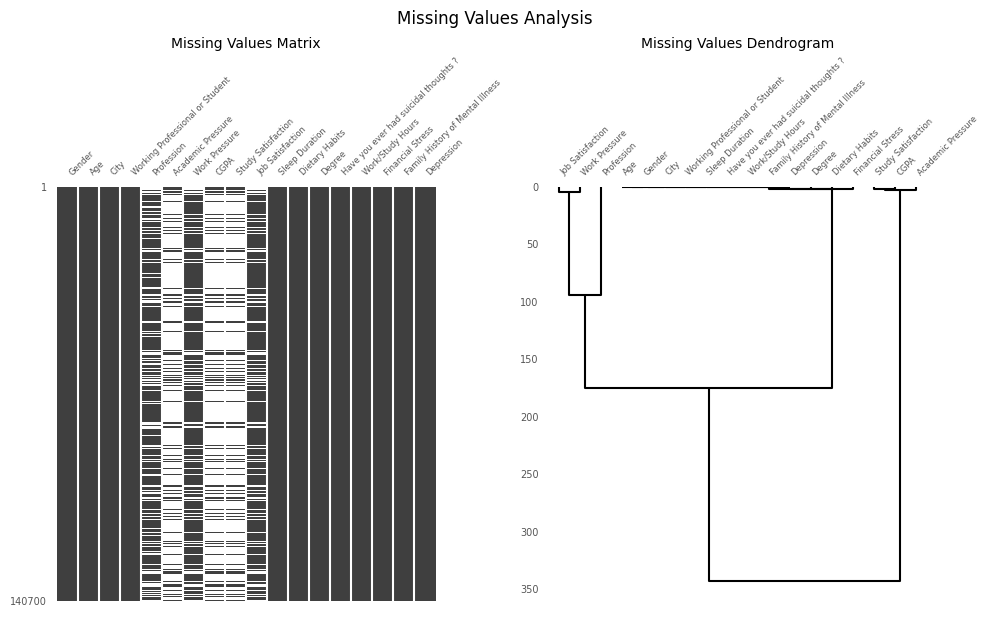

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

plt.sca(axes[0])
msno.matrix(data, sparkline=False, ax=axes[0], fontsize=6)
axes[0].set_title('Missing Values Matrix', fontsize=10)

plt.sca(axes[1])
msno.dendrogram(data, ax=axes[1], fontsize=6)
axes[1].set_title('Missing Values Dendrogram', fontsize=10)

plt.tight_layout()
fig.suptitle('Missing Values Analysis', y=1.02, size=12)
plt.show()

Looking at the matrix on the left, we observe that the patterns of missing data in the columns **Job Satisfaction**, **Work Pressure**, and **Profession** are highly correlated.  
Similarly, the patterns in **Academic Pressure**, **CGPA**, and **Study Satisfaction** are also closely related.

If we focus on the dendrogram, we can identify two distinct groups of columns with missing values, which align with the observations above.  

These correspond to columns associated with the **academic domain** and those related to the **professional domain**.

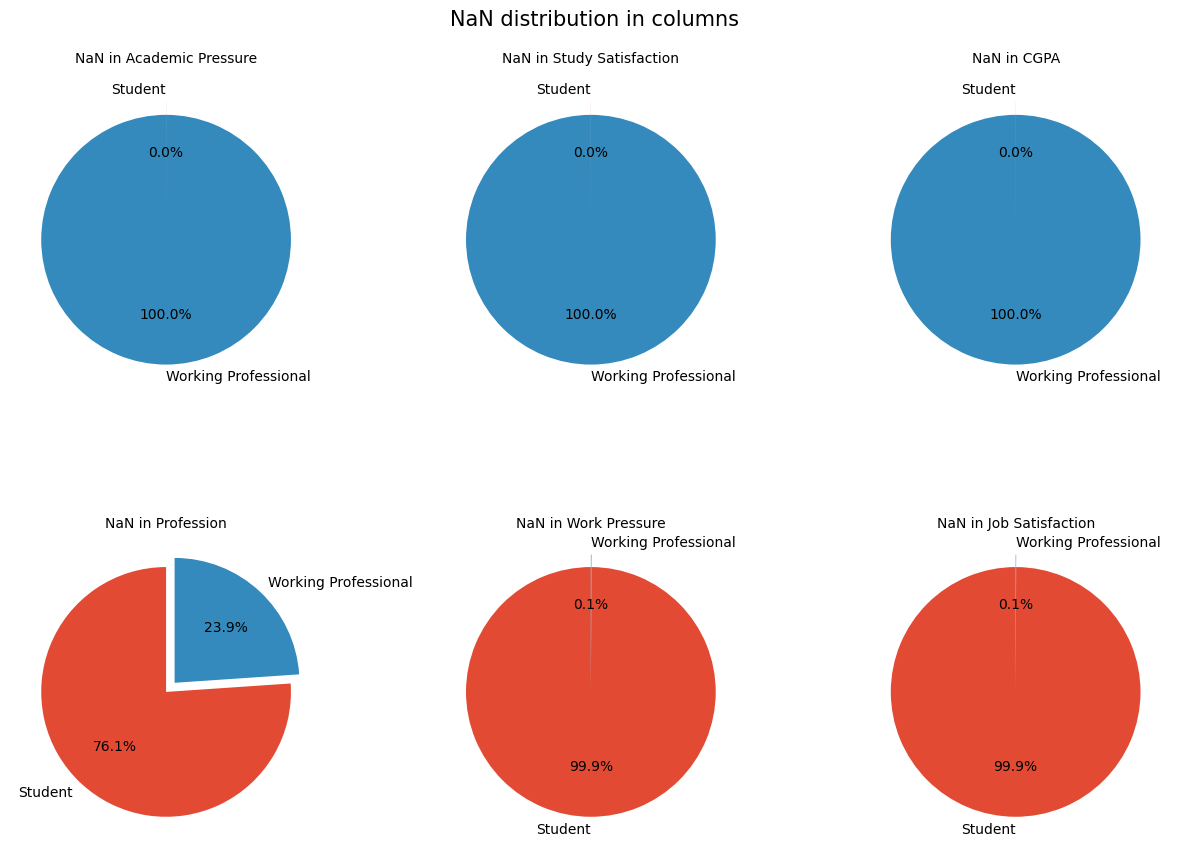

In [60]:
COL_WITH_NA_SORTED = ['Academic Pressure', 'Study Satisfaction', 'CGPA', 'Profession', 'Work Pressure', 'Job Satisfaction']

fig, axes = plt.subplots(2, 3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(COL_WITH_NA_SORTED):
    counts = data.groupby('Working Professional or Student')[col].apply(lambda x: x.isna().sum())
    
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, explode=[0, 0.1])
    axes[i].set_title(f'NaN in {col}', fontsize=10)

plt.tight_layout()
fig.suptitle('NaN distribution in columns', y=0.95, size=15)
plt.show()


These pie charts confirm our previous analysis, showing for each column with missing values the proportion of **professionals** vs **students**.

An exception is observed for the **Profession** column, where rows associated with professionals also contain missing values. This will be investigated further in subsequent steps.

**For **modeling**, we will split our dataset into two parts. We will have on one side $ (X, y)_{\text{student}} $ and on the other $ (X, y)_{\text{pro}} $.**

In [61]:
data_student = data[data['Working Professional or Student'] == 'Student']
data_professional = data[data['Working Professional or Student'] == 'Working Professional']

<a id="student-pipeline"></a>
## **2. Student Pipeline**
---

<a id="detailed-dataset-analysis-and-refinement"></a>
### **2.1 Student Dataset Analysis and Refinement**

In this section, we will focus on analyzing the models that will be used to predict whether a student is depressed or not.  

First, we will conduct further analyses to identify any remaining columns with NaN values that need to be addressed or to determine if the issue of imbalance is more or less significant than previously observed.

<a id="feature-exploration-and-preliminary-cleaning"></a>
#### **2.1.1 Feature Engineering**

In [62]:
skim(data_student)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 27901  │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 18     │ │ float64     │ 8     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA     ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Age                   │      0 │      0 │   25.82 │   4.906 │    18 │    21 │    25 │   30 │   59 │  ▇▇▃   │  │
│ │ Academic Pressure     │      9 │   0.03 │   3.142 │   1.381 │     1 │     2 │     3 │    4 │    5 │ ▅▅ ▇▆▇ │  │
│ │ Work Pressure         │  27898 │  99.99 │       4 │   1.732 │     2 │   3.5 │     5 │    5 │    5 │ ▃    ▇ │  │
│ │ CGPA                  │      9 │   0.03 │   7.659 │   1.464 │  5.03 │  6.29 │  7.77 │ 8.92 │   10 │ ▇▅▇▇▇▇ │  │
│ │ Study Satisfaction    │     10 │   0.04 │   2.945 │    1.36 │     1 │     2 │     3 │    4 │    5 │ ▇▇ ▇▇▆ │  │
│ │ Job Satisfaction      │  27893 │  99.97 │   2.375 │   1.188 │     1 │  1.75 │     2 │ 3.25 │    4 │ ▅ ▇ ▃▅ │  │
│ │ Work/Study Hours      │      0 │      0 │   7.157 │   3.708 │     0 │     4 │     8 │   10 │   12 │ ▂▂▂▃▃▇ │  │
│ │ Financial Stress      │      3 │   0.01 │    3.14 │   1.437 │     1 │     2 │     3 │    4 │    5 │ ▆▆ ▆▇▇ │  │
│ │ Depression            │      0 │      0 │  0.5855 │  0.4926 │     0 │     0 │     1 │    1 │    1 │ ▆    ▇ │  │
│ └───────────────────────┴────────┴────────┴─────────┴─────────┴───────┴───────┴───────┴──────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA         ┃ NA %       ┃ words per row          ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                             │          0 │          0 │                      1 │              27901 │  │
│ │ City                               │          0 │          0 │                      1 │              27905 │  │
│ │ Working Professional or Student    │          0 │          0 │                      1 │              27901 │  │
│ │ Profession                         │      27867 │      99.88 │                 0.0015 │                 42 │  │
│ │ Sleep Duration                     │          0 │          0 │                      3 │              84509 │  │
│ │ Dietary Habits                     │          2 │       0.01 │                      1 │              27903 │  │
│ │ Degree                             │          0 │          0 │                    1.2 │              33983 │  │
│ │ Have you ever had suicidal         │          0 │   

In [63]:
data_student = data_student.drop(['Working Professional or Student', 'Work Pressure', 'Job Satisfaction', 'Profession'], axis=1)

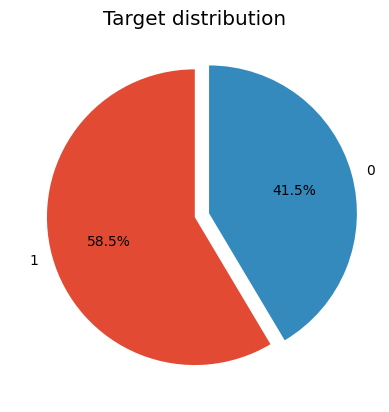

In [64]:
plot_target_distribution(data_student, TARGET_COL)

The problem is significantly less imbalanced, and the trend is even reversed.  

We now observe more depressive samples than non-depressive ones (which is rather sad).

In [65]:
TOTAL_NA_OVER_AXIS_0 = data_student.isna().sum(axis=0)

print(f'Proportion of missing values in the student dataset: {TOTAL_NA_OVER_AXIS_0.sum() / data_student.shape[0]:5f}')

Proportion of missing values in the student dataset: 0.001183


We observe that there are very few missing values remaining (less than $1\%$). Therefore, we allow ourselves to remove them.

In [66]:
data_student = data_student.dropna()

In [67]:
X_student = data_student.drop(TARGET_COL, axis=1)
y_student = data_student[TARGET_COL]

In [68]:
print("Student dataset shape:", X_student.shape)
print("Student target shape:", y_student.shape)

Student dataset shape: (27882, 13)
Student target shape: (27882,)


In [69]:
def plot_categorical_count(df: pd.DataFrame,
                           ax: plt.Axes) -> None:
     """
     Plot the count of categories in each categorical column in a specific axis.
    
     :param df: The dataframe to plot.
     :param ax: The axis to plot the histogram.
     """
    
     counts = df.select_dtypes(include='object').nunique().sort_values(ascending=False)
     sns.barplot(x=counts, y=counts.index, ax=ax)
     ax.set_ylabel('')
     ax.set_xlabel('')
     ax.set_title('Number of categories per column')

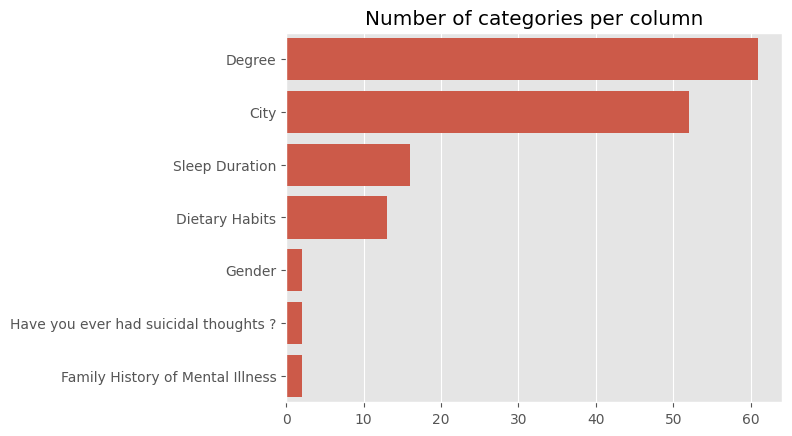

In [70]:
plot_categorical_count(X_student, plt.gca())
plt.show()

In [71]:
print(f"Sleep Duration categories: \n\n{X_student['Sleep Duration'].unique()}", end='\n\n')
print(f"Dietary Habits categories: \n\n{X_student['Dietary Habits'].unique()}")

Sleep Duration categories: 

['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours'
 '1-2 hours' '10-11 hours' '40-45 hours' '2-3 hours' 'Moderate'
 '55-66 hours' '3-4 hours' '4-5 hours' '8 hours' '45' 'than 5 hours'
 '6-7 hours']

Dietary Habits categories: 

['Healthy' 'Moderate' 'Unhealthy' '3' 'Less than Healthy' 'Mihir' '1.0'
 'No Healthy' 'Less Healthy' 'M.Tech' 'Male' 'Yes' '2']


We notice that for the columns **Sleep Duration** and **Dietary Habits**, there are many categories that can be merged, as well as others that represent noise and contain very few data points (as observed earlier). Therefore, we will attempt to merge similar categories and assign random values to the remaining categories with minimal data representation. 

Moreover, we observe that an `OrdinalEncoder` can be utilized here, as there is a clear hierarchy between the categories.

In [72]:
def clean_sleep_diet(X: pd.DataFrame, 
                     seed: int = 42) -> pd.DataFrame:
    """
    Clean the 'Sleep Duration' and 'Dietary Habits' columns.

    :param X: The dataframe to clean.
    :param seed: The random seed to use.
    :return: The cleaned dataframe.
    """

    np.random.seed(seed)

    X = X.copy()

    X['Sleep Duration'] = X['Sleep Duration'].progress_apply(
        lambda value: (
            0 if value in ["Less than 5 hours", "2-3 hours", "3-4 hours", "4-5 hours", "No"]
            else 1 if value in ["5-6 hours", "6-7 hours", "4-6 hours"]
            else 2 if value in ["7-8 hours"]
            else 3 if value in ["8-9 hours", "More than 8 hours", "9-11 hours", "10-11 hours"]
            else np.random.choice([0, 1, 2, 3])
        )
    )

    X['Dietary Habits'] = X['Dietary Habits'].progress_apply(
        lambda value: (
            0 if value in ["Unhealthy", "No Healthy", "No", "1", 1]
            else 1 if value in ["Moderate", "Less Healthy", "Less than Healthy", "2", 2]
            else 2 if value in ["Healthy", "More Healthy", "Yes", "3", 3]
            else np.random.choice([0, 1, 2])
        )
    )

    return X


In [73]:
X_student_cleaned = clean_sleep_diet(X_student)

  0%|          | 0/27882 [00:00<?, ?it/s]

  0%|          | 0/27882 [00:00<?, ?it/s]

Once our data is cleaned, we can create $(X_{train}, y_{train})_{student}$ and $(X_{test}, y_{test})_{student}$.

In [74]:
X_student_train, X_student_test, y_student_train, y_student_test = train_test_split(X_student_cleaned, y_student, test_size=0.2, random_state=42)
X_student_train = X_student_train.reset_index(drop=True)
y_student_train = y_student_train.reset_index(drop=True)
X_student_test = X_student_test.reset_index(drop=True)
y_student_test = y_student_test.reset_index(drop=True)

In [75]:
X_student_train.head()

Gender   Age      City  Academic Pressure  CGPA  Study Satisfaction  \
0    Male  18.0    Bhopal                3.0  6.17                 5.0   
1  Female  19.0      Agra                4.0  5.82                 4.0   
2    Male  22.0  Varanasi                5.0  9.21                 2.0   
3    Male  34.0     Surat                2.0  5.68                 4.0   
4  Female  33.0   Kolkata                2.0  8.09                 1.0   

   Sleep Duration  Dietary Habits    Degree  \
0               0               0  Class 12   
1               0               0  Class 12   
2               0               1       MSc   
3               3               1      B.Ed   
4               0               2     M.Com   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                    No               5.0               1.0   
1                                   Yes               7.0               4.0   
2                                   Yes              10.0               2.0   
3                                   Yes               0.0               1.0   
4                                    No               5.0               3.0   

  Family History of Mental Illness  
0                               No  
1                               No  
2                               No  
3                               No  
4                              Yes

<a id="dimensionality-reduction-and-pattern-visualization"></a>
#### **2.1.2 Pattern Visualization**

We will now analyze $(X_{train}, y_{train})_{student}$ more thoroughly. To achieve this, categorical columns need to be encoded, and we will use a `OneHotEncoder`.  

Since there are many categories with very few data points, we will set the parameter `min_frequency=0.05` to reduce noise (but not excessively).

The goal is to apply `PCA` to visualize our data.

In [76]:
def hopkins_statistic(data: pd.DataFrame,
                      n: int = 100,
                      random_state: int = 42) -> float:
    """
    Calculate the Hopkins statistic for a given dataset.

    :param data: DataFrame containing the dataset.
    :param n: Number of points to sample for the calculation.
    :param random_state: Seed for reproducibility.
    :return: Hopkins statistic (value between 0 and 1).
    """

    np.random.seed(random_state)
    data_array = data.to_numpy()
    d = data_array.shape[1]

    n = min(n, len(data_array))

    sampled_indices = np.random.choice(data_array.shape[0], n, replace=False)
    sampled_data = data_array[sampled_indices]

    random_points = np.random.uniform(
        np.min(data_array, axis=0),
        np.max(data_array, axis=0),
        size=(n, d)
    )

    nbrs = NearestNeighbors(n_neighbors=2).fit(data_array)

    u_distances, _ = nbrs.kneighbors(sampled_data, n_neighbors=2)
    w_distances, _ = nbrs.kneighbors(random_points, n_neighbors=1)

    u_sum = np.sum(u_distances[:, 1])
    w_sum = np.sum(w_distances[:, 0])

    hopkins_stat = w_sum / (w_sum + u_sum)

    return hopkins_stat

def plot_pca_analysis(X: pd.DataFrame,
                      y: pd.Series = None,
                      min_frequency: float = 0.05,
                      title: str = 'PCA Analysis',
                      n_hopkins: int = 200) -> None:
    """
    Plot the PCA analysis with the Kaiser criterion and Hopkins scores.

    :param X: The features.
    :param y: The target.
    :param min_frequency: The minimum frequency to consider a category in the OneHotEncoder.
    :param n_hopkins: The number of points to sample for the Hopkins statistic.
    """

    basic_column_transformer = make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=min_frequency),
         X.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    )

    pipeline = make_pipeline(
        basic_column_transformer,
        StandardScaler(),
        PCA(random_state=42)
    )

    X_pca = pipeline.fit_transform(X)
    
    pca_model = pipeline.named_steps['pca']
    components = pca_model.components_
    explained_variance = pca_model.explained_variance_ratio_
    total_components = len(explained_variance)
    kaiser_threshold = 1 / total_components

    preprocessor = pipeline.named_steps['columntransformer']
    encoder_feature_names = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(
        X.select_dtypes(include='object').columns
    )
    all_feature_names = list(encoder_feature_names) + list(X.select_dtypes(exclude='object').columns)
    
    hopkins_scores = []
    n_components_range = range(1, total_components + 1)
    for n_components in n_components_range:
        X_temp = X_pca[:, :n_components]
        hopkins_scores.append(hopkins_statistic(pd.DataFrame(X_temp), n=n_hopkins))

    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    
    axes[0, 0].hexbin(X_pca[:, 0], X_pca[:, 1], C=y, cmap='coolwarm', gridsize=50, alpha=0.5)
    axes[0, 0].set_title('PCA Projection', fontsize=12)
    axes[0, 0].set_xlabel('Principal Component 1')
    axes[0, 0].set_ylabel('Principal Component 2')
    
    axes[0, 1].axhline(0, color='grey', linestyle='--', linewidth=0.5)
    axes[0, 1].axvline(0, color='grey', linestyle='--', linewidth=0.5)
    circle = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--', linewidth=1.5)
    axes[0, 1].add_artist(circle)
    for i, (x, y) in enumerate(zip(components[0], components[1])):
        axes[0, 1].arrow(0, 0, x, y, color='r', alpha=0.8, head_width=0.03, length_includes_head=True)
        axes[0, 1].text(x * 1.15, y * 1.15, all_feature_names[i], color='blue', fontsize=8, ha='center', va='center')
    axes[0, 1].set_xlim(-1.2, 1.2)
    axes[0, 1].set_ylim(-1.2, 1.2)
    axes[0, 1].set_title('PCA Correlation Circle', fontsize=12)
    axes[0, 1].set_xlabel('Principal Component 1')
    axes[0, 1].set_ylabel('Principal Component 2')
    
    for i, var in enumerate(explained_variance):
        color = 'blue' if var > kaiser_threshold else 'gray'
        axes[1, 0].bar(i + 1, var, alpha=0.7, align='center', color=color, label='Explained Variance' if i == 0 else None)
    axes[1, 0].step(range(1, total_components + 1), np.cumsum(explained_variance), where='mid', label='Cumulative Variance')
    axes[1, 0].axhline(kaiser_threshold, color='red', linestyle='--', label=f'Kaiser Threshold (1/{total_components:.0f})')
    axes[1, 0].set_title('PCA Explained Variance', fontsize=12)
    axes[1, 0].set_xlabel('Components')
    axes[1, 0].set_ylabel('Variance Ratio')
    axes[1, 0].legend(loc='best')

    axes[1, 1].bar(n_components_range, hopkins_scores, label='Hopkins Score')
    axes[1, 1].axhline(0.5, color='blue', linestyle='--', label='Threshold (0.5)')
    axes[1, 1].set_title('Hopkins Score by Components', fontsize=12)
    axes[1, 1].set_xlabel('Number of Components')
    axes[1, 1].set_ylabel('Hopkins Score')
    axes[1, 1].legend(loc='best')
    
    plt.tight_layout()
    fig.suptitle(title, y=1.02, size=15)
    plt.show()

`PCA` is a dimensionality reduction technique that identifies the top $k$ eigenvectors (principal components) corresponding to the largest eigenvalues of the centered covariance matrix.  
This allows us to project high-dimensional data onto a lower-dimensional subspace while retaining the maximum variance.

The `PCA` process works as follows:

1. Compute the covariance matrix of the centered data:
   $$
   \Sigma = \mathbf{X}_c^\top \mathbf{X}_c = \mathbf{V} \mathbf{D} \mathbf{V}^{-1}
   $$
   where:
   - $\mathbf{X}_c$ is the centered data matrix ($\mathbf{X} - \text{mean}(\mathbf{X})$),
   - $\mathbf{V}$ contains the eigenvectors,
   - $\mathbf{D}$ is a diagonal matrix with the eigenvalues.

2. Select the top $k$ eigenvectors:
   $$
   \mathbf{P} = \mathbf{V}_{[:, :k]}
   $$

3. Project the data onto the new subspace:
   $$
   \mathbf{x}_{\text{transformed}} = (\mathbf{x} - \text{mean}(\mathbf{X}_{\text{train}})) \mathbf{P}
   $$

##### **Figure 1: PCA Projection in 2D**
- Here, $\mathbf{P} = \mathbf{V}_{[:, :2]}$, enabling us to project the data into 2D space.
- Each data point $\mathbf{x}_{\text{transformed}}$ is plotted and colored by its corresponding label ($y$).
- This visualization provides insights into the separability of classes in the reduced feature space.

##### **Figure 2: PCA Correlation Circle**
- Using $\mathbf{P}^\top$, we can analyze the contribution of the original features to the new principal components.
- $\mathbf{P}^\top$ is a $2 \times D$ matrix, where $D$ is the number of original features.
- Each feature is represented as a vector in the new 2D space, showing its correlation with the principal components.

##### **Figure 3: Explained Variance and Kaiser Criterion**
- The eigenvalues $\lambda_i$ (from $i = 1$ to $k$) determine the variance explained by each principal component.
- The explained variance ratio is given by:
  $$
  \text{Explained Variance Ratio} = \frac{\lambda_i}{\sum_{j=1}^k \lambda_j}
  $$
- A cumulative plot shows how much variance is captured as we increase the number of components.
- The Kaiser criterion states that a component is relevant if its explained variance $\geq \frac{1}{k}$.

##### **Figure 4: Hopkins Statistic**
The Hopkins statistic assesses whether a dataset contains meaningful clusters. In supervised learning, this measure must be interpreted carefully since clusters may not correspond to labels.

The Hopkins statistic is computed as follows:

1. Sample $N$ points from the dataset ($\mathbf{x}_{\text{sample}}$).
2. Generate $N$ artificial points ($\mathbf{x}_{\text{fake}}$) uniformly distributed within the bounds of each feature ($U(a, b)$).
3. Calculate the distance ($d$) for each point in $\mathbf{x}_{\text{sample}}$ and $\mathbf{x}_{\text{fake}}$ to their nearest neighbor.
4. Compute the Hopkins statistic:
   $$
   H = \frac{\sum_{i=1}^N d(\mathbf{x}_{\text{fake}, i})}{\sum_{i=1}^N \left[ d(\mathbf{x}_{\text{fake}, i}) + d(\mathbf{x}_{\text{sample}, i}) \right]}
   $$

**Interpretation**:
- $H \approx 0.5$: No significant clustering structure.
- $H \approx 1$: Strong clustering structure.

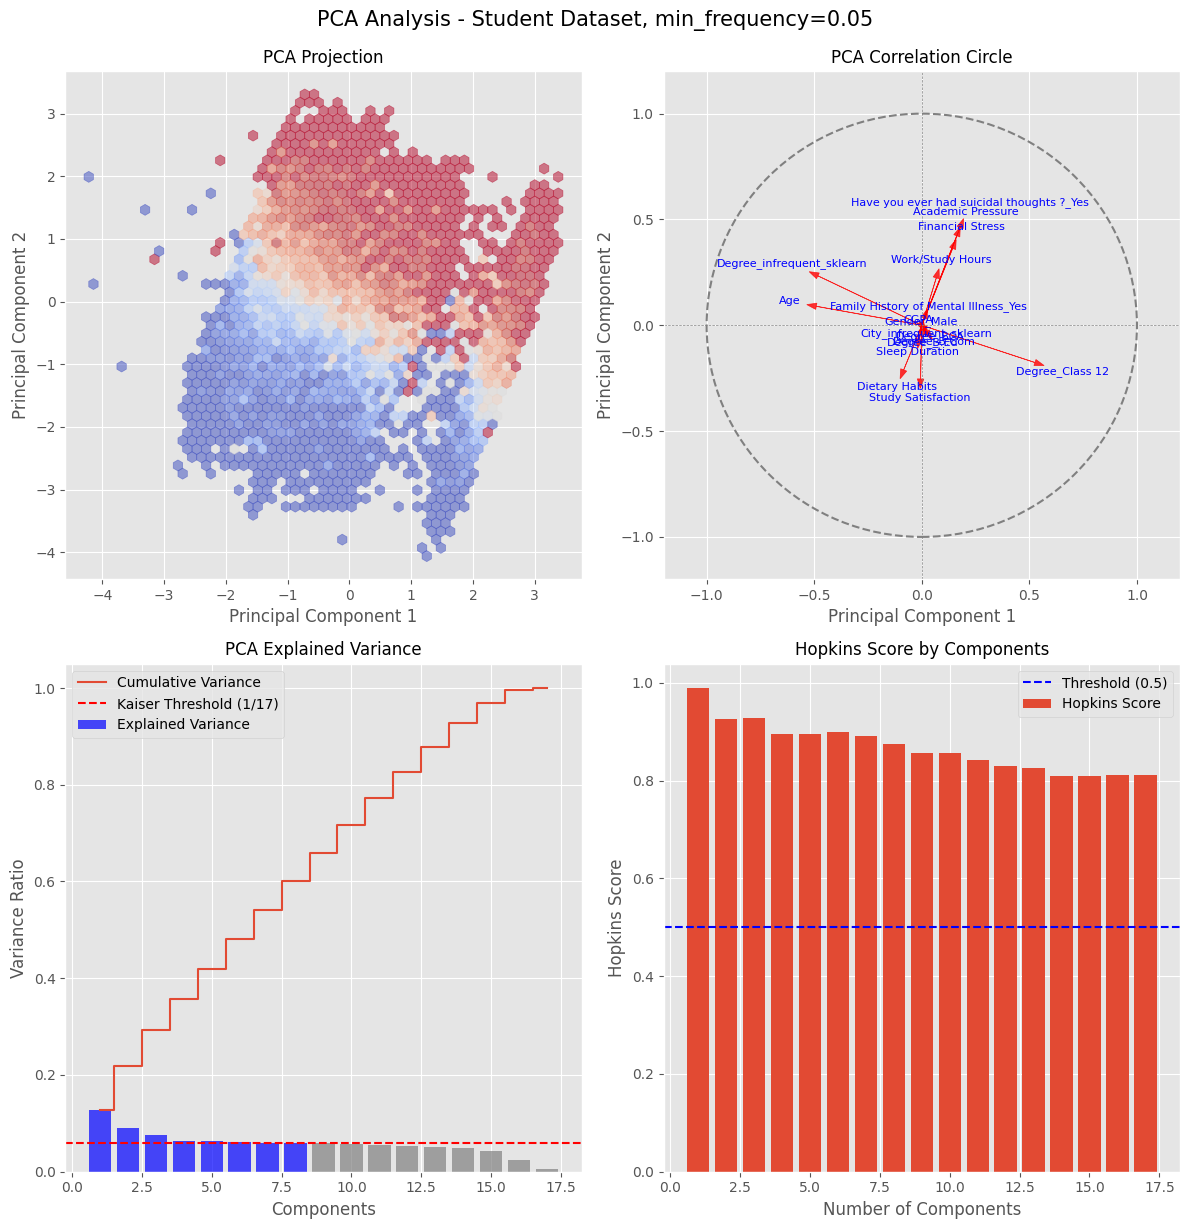

In [77]:
plot_pca_analysis(X_student_train, y_student_train, n_hopkins=100, title='PCA Analysis - Student Dataset, min_frequency=0.05')

We observe that the data seems easily separable in two dimensions, or at least there are clearly two distinct clusters of different colors. Perhaps this number of components is sufficient, despite explaining only approximately $20\%$ of the total variance.

The Hopkins statistic confirms that our data is strongly clustered regardless of the number of retained components $k$, and we hope these clusters correspond to our labels.

The correlation circle highlights that some features are correlated, which can pose challenges for models like logistic regression. Since these models rely on matrix multiplications, the conditioning of $\mathbf{X}_{\text{train}}$ becomes critical.  
We can also identify the features that contribute the most to the first two principal components.

In [78]:
def plot_correlation_analysis(X: pd.DataFrame,
                              min_frequency: float = 0.05,
                              title: str = 'Correlation Matrix Analysis') -> None:
    """
    Plot correlation matrices for encoded data and PCA-transformed data side by side.

    :param X: The data to use.
    :param title: Title of the figure.
    """

    basic_column_transformer = make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=min_frequency),
         X.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    )

    pipeline = make_pipeline(
        basic_column_transformer,
        StandardScaler(),
        PCA(random_state=42)
    )

    preprocessor = pipeline.named_steps['columntransformer']
    encoded_data = preprocessor.fit_transform(X)
    encoder_feature_names = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(
        X.select_dtypes(include='object').columns
    )
    all_feature_names = list(encoder_feature_names) + list(X.select_dtypes(exclude='object').columns)
    encoded_df = pd.DataFrame(encoded_data, columns=all_feature_names)
    encoded_corr_matrix = encoded_df.corr()

    X_pca = pipeline.fit_transform(X)
    pca_model = pipeline.named_steps['pca']
    n_components = pca_model.n_components_
    pca_columns = [f'PC{i+1}' for i in range(n_components)]
    pca_df = pd.DataFrame(X_pca, columns=pca_columns)
    pca_corr_matrix = pca_df.corr()

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.heatmap(encoded_corr_matrix, annot=False, cmap='coolwarm', center=0, cbar=True, ax=axes[0])
    axes[0].set_title('Correlation Matrix of Encoded Data', fontsize=14)
    axes[0].set_xticklabels([])
    axes[0].set_yticklabels([])

    sns.heatmap(pca_corr_matrix, annot=False, cmap='coolwarm', center=0, cbar=True, ax=axes[1])
    axes[1].set_title('Correlation Matrix in PCA Space', fontsize=14)
    axes[1].set_xticklabels([])
    axes[1].set_yticklabels([])

    plt.tight_layout()
    fig.suptitle(title, y=1.05, size=15)
    plt.show()

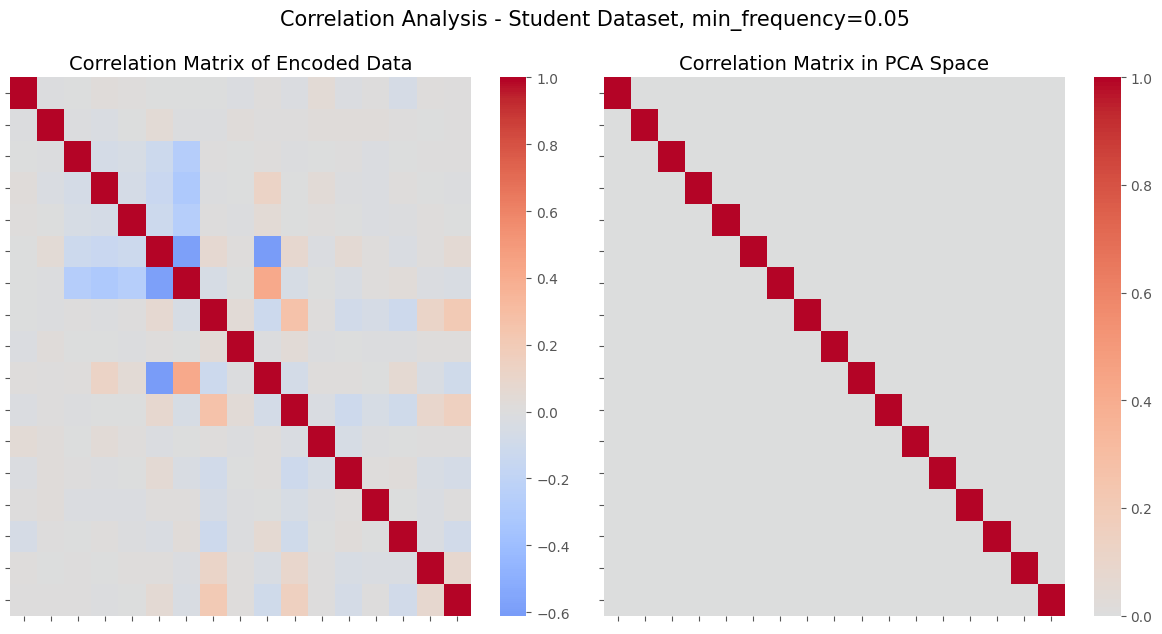

In [79]:
plot_correlation_analysis(X_student_train, title="Correlation Analysis - Student Dataset, min_frequency=0.05")

We observed correlated features, and this can be confirmed here using the Pearson correlation:

$
\rho_{x_d, x_e} = \frac{\sum_{i=1}^n (x_{d,i} - \bar{x}_d)(x_{e,i} - \bar{x}_e)}{\sqrt{\sum_{i=1}^n (x_{d,i} - \bar{x}_d)^2} \sqrt{\sum_{i=1}^n (x_{e,i} - \bar{x}_e)^2}}
$

where $x_d$ and $x_e$ represent two different feature columns, and $\bar{x}_d$ and $\bar{x}_e$ are their means.

One of the key uses of `PCA` is to trade some reconstruction error (or added noise) to decorrelate features.  

As shown above, we confirm through the correlation matrix that many features are significantly (anti)correlated.  
These correlations are completely eliminated after applying `PCA`.


<a id="model-development-and-optimization"></a>
### **2.2 Model Development and Optimization**

<a id="model-learning-dynamics-and-generalization"></a>
#### **2.2.1 Learning and Generalization**

We will now proceed to the step where we test different models.  
A preliminary way to select or at least analyze these models is through what is called **Learning Curves**.  
Learning curves allow us to compare model performances as a function of the number of data points.  
This is achieved using **cross-validation**; we will use **K-fold** cross-validation here.

To evaluate performance, we need one or more metrics for comparison.  
Since we have observed that our data is imbalanced, **accuracy is not suitable** (even though it is the competition's primary metric).  
The **F1-Score** is an excellent metric when the goal is to estimate the model's ability to predict $y = 1$. 

If equal importance is given to $y = 1$ and $y = 0$, the best metric is the **Matthews Correlation Coefficient**, which accounts for **TN** in its formula.  
Additionally, since the negative class is the minority class in this case, we must ensure it is not neglected.  

**For our learning curves, we will primarily focus on the MCC.**

### Key Metrics:

1. **F1-Score**:  

   The F1-Score is the harmonic mean of precision and recall.  
   Its formula is:  

   $
   F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
   $  
   
   where:
   - Precision = $\frac{\text{TP}}{\text{TP} + \text{FP}}$  

   - Recall = $\frac{\text{TP}}{\text{TP} + \text{FN}}$ 

2. **Matthews Correlation Coefficient (MCC)**:  

   MCC is a balanced measure that accounts for all four components of the confusion matrix:  

   $
   \text{MCC} = \frac{\text{TP} \cdot \text{TN} - \text{FP} \cdot \text{FN}}{\sqrt{(\text{TP} + \text{FP})(\text{TP} + \text{FN})(\text{TN} + \text{FP})(\text{TN} + \text{FN})}}
   $  
   
   This metric provides a value between -1 (completely incorrect prediction) and 1 (perfect prediction), with 0 representing random guessing.

In [80]:
def plot_learning_curves(X: pd.DataFrame,
                         y: pd.Series) -> None:
    """
    Plot learning curves for multiple models.
    :param X: Feature DataFrame.
    :param y: Target Series.
    """

    models = {
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier(eval_metric="logloss", use_label_encoder=False, verbosity=0),
        'Logistic Regression': LogisticRegression(),
        'SVM (RBF Kernel)': SVC(kernel='rbf')
    }

    column_transformer = ColumnTransformer(
        [('encoder', OneHotEncoder(drop='first', max_categories=10, handle_unknown="ignore"),
          X.select_dtypes(include='object').columns)],
        remainder='passthrough',
        sparse_threshold=0
    )

    pipelines = {
        'Random Forest': make_pipeline(column_transformer, models['Random Forest']),
        'XGBoost': make_pipeline(column_transformer, models['XGBoost']),
        'Logistic Regression': make_pipeline(column_transformer, StandardScaler(),
                                             PCA(), models['Logistic Regression']),
        'SVM (RBF Kernel)': make_pipeline(column_transformer, StandardScaler(),
                                          PCA(), models['SVM (RBF Kernel)'])
    }

    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()

    for idx, (model_name, pipeline) in enumerate(tqdm(pipelines.items(), desc='Computing Learning Curves')):
        train_sizes, train_scores, val_scores = learning_curve(
            pipeline, X, y, cv=5, scoring='matthews_corrcoef', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        val_scores_mean = np.mean(val_scores, axis=1)
        val_scores_std = np.std(val_scores, axis=1)

        ax = axes[idx]
        ax.set_title(f'Learning Curve - {model_name}', fontsize=12)
        ax.set_xlabel("Training size")
        ax.set_ylabel("Score")
        ax.grid()

        ax.fill_between(train_sizes,
                        train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std,
                        alpha=0.1, color="r")
        ax.fill_between(train_sizes,
                        val_scores_mean - val_scores_std,
                        val_scores_mean + val_scores_std,
                        alpha=0.1, color="g")
        ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training MCC")
        ax.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation MCC")

        ax.legend(loc="best")

    plt.tight_layout()
    fig.suptitle('Learning Curves', y=1.02, size=15)
    plt.show()

Computing Learning Curves:   0%|          | 0/4 [00:00<?, ?it/s]

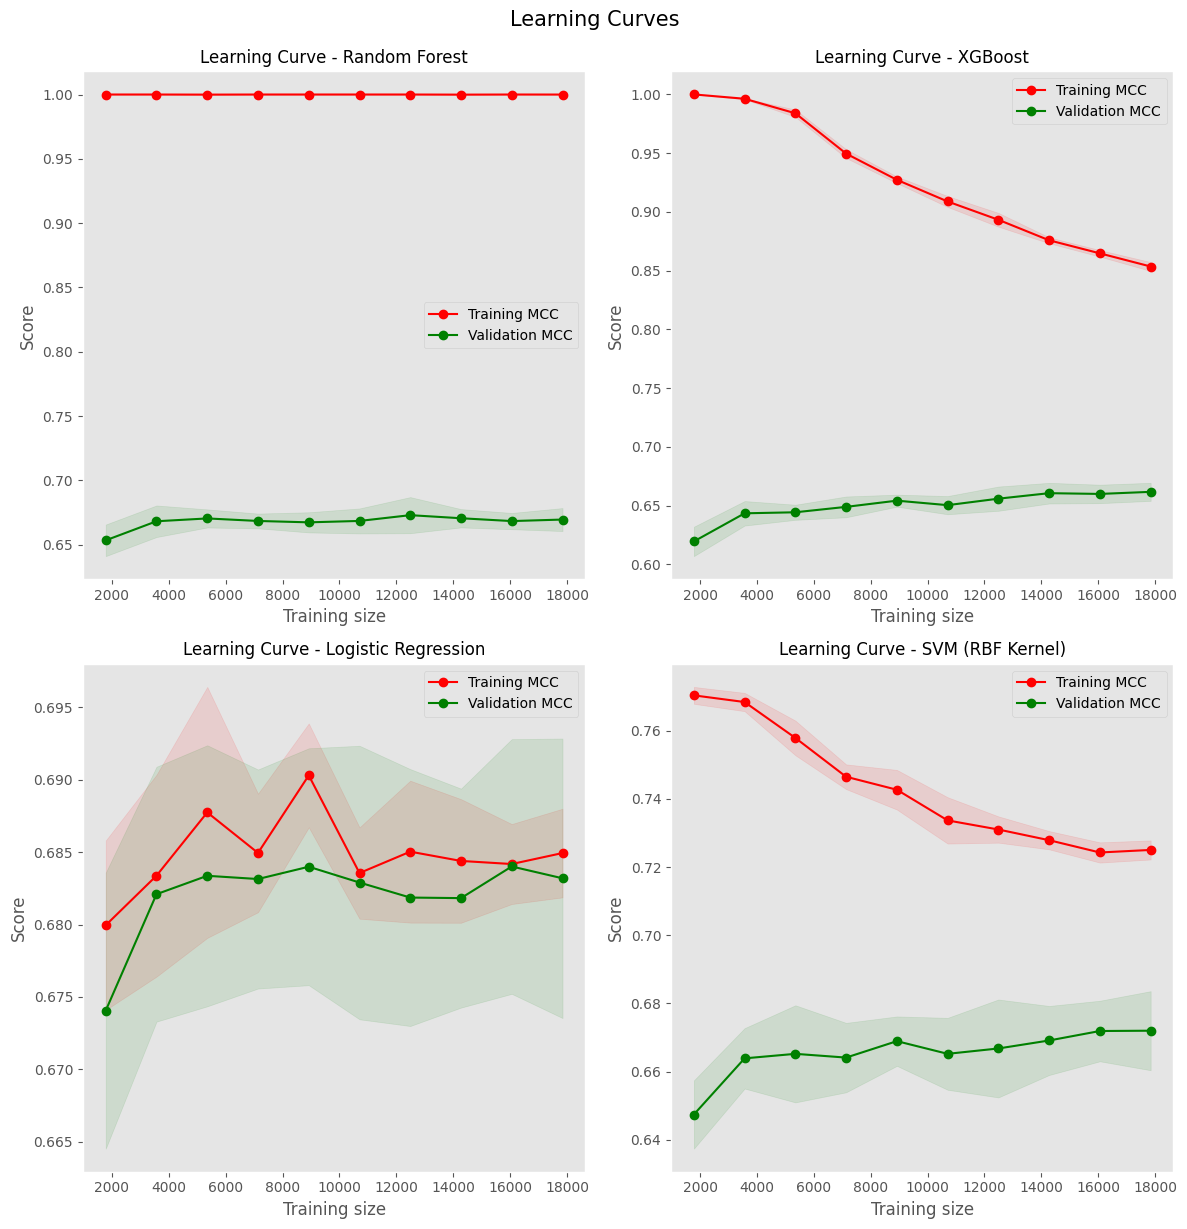

In [81]:
plot_learning_curves(X_student_train, y_student_train)

| **Model**               | **Description**                                                                                                                |
|--------------------------|-------------------------------------------------------------------------------------------------------------------------------|
| **Random Forest**        | Clear overfitting is observed, but the MCC remains quite good. With an MCC just under 0.7, the performance is sill good.     |
| **XGBOOST**              | The validation score increases as the training size grows, reducing overfitting as more data is included. Scores are good                 |
| **Logistic Regression**  | Validation scores are consistently good with no visible overfitting, but performance does not improve significantly.         |
| **SVM (RBF Kernel)**     | Similar behavior to XGBOOST, but training time is significantly longer, making it less practical. |

<a id="parameter-tuning-through-1d-and-2d-search"></a>
#### **2.2.2 Parameter Tuning through 1D and 2D Search**

We will now attempt to optimize one of the models discussed above: `LogisticRegression`.  

Instead of focusing on the model's hyperparameters, we will concentrate on optimizing the preprocessing steps we previously analyzed.  
Specifically, we will adjust the number of principal components `n_components` and the `min_frequency` parameter of the `OneHotEncoder`.  
This optimization will be performed manually.  

We will continue with the `MCC` that we have already presented.

In [82]:
def optimize_pca_components(X: pd.DataFrame,
                            y: pd.Series,
                            model: BaseEstimator,
                            min_frequency: float = 0.05,
                            max_components: int = None,
                            cv: int = 5) -> Tuple[int, float,
                                           Dict[int, Tuple[float, float, float, float]]]:
    """
    Optimize the number of components for PCA in a pipeline with a given model using MCC.

    :param X: Feature DataFrame.
    :param y: Target Series.
    :param model: Estimator to use in the pipeline.
    :param min_frequency: Minimum frequency parameter for OneHotEncoder.
    :param max_components: Maximum number of PCA components to test (default: number of features in X).
    :param cv: Number of cross-validation folds (default: 5).
    :return: Tuple of (best_n_components, best_score, scores_dict).
    """

    if max_components is None:
        max_components = X.shape[1]

    column_transformer = ColumnTransformer(
        [('encoder', OneHotEncoder(drop='first', min_frequency=min_frequency, handle_unknown="ignore"),
          X.select_dtypes(include='object').columns)],
        remainder='passthrough',
        sparse_threshold=0
    )

    scores = {}
    train_mean_scores = []
    train_std_scores = []
    val_mean_scores = []
    val_std_scores = []

    for n_components in tqdm(range(1, max_components + 1), desc='Optimizing PCA Components'):
        pipeline = Pipeline([
            ('preprocessor', column_transformer),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=n_components)),
            ('model', model)
        ])
        cv_results = cross_validate(pipeline, X, y, cv=cv, scoring="matthews_corrcoef", return_train_score=True, n_jobs=-1)
        train_scores = cv_results['train_score']
        val_scores = cv_results['test_score']
        
        train_mean = np.mean(train_scores)
        train_std = np.std(train_scores)
        val_mean = np.mean(val_scores)
        val_std = np.std(val_scores)
        
        train_mean_scores.append(train_mean)
        train_std_scores.append(train_std)
        val_mean_scores.append(val_mean)
        val_std_scores.append(val_std)

        scores[n_components] = (train_mean, train_std, val_mean, val_std)

    best_n_components = max(scores, key=lambda k: scores[k][2])
    best_score = scores[best_n_components][2]

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_components + 1), train_mean_scores, marker='o', label='Train MCC Score', color='blue')
    plt.fill_between(range(1, max_components + 1),
                     [m - s for m, s in zip(train_mean_scores, train_std_scores)],
                     [m + s for m, s in zip(train_mean_scores, train_std_scores)],
                     color='blue', alpha=0.2)

    plt.plot(range(1, max_components + 1), val_mean_scores, marker='o', label='Validation MCC Score', color='orange')
    plt.fill_between(range(1, max_components + 1),
                     [m - s for m, s in zip(val_mean_scores, val_std_scores)],
                     [m + s for m, s in zip(val_mean_scores, val_std_scores)],
                     color='orange', alpha=0.2)

    plt.xlabel('Number of PCA Components')
    plt.ylabel('MCC Score')
    plt.title('Optimization of PCA Components using MCC')
    plt.grid()
    plt.legend(loc='best')
    plt.show()

    return best_n_components, best_score, scores

Optimizing PCA Components:   0%|          | 0/13 [00:00<?, ?it/s]

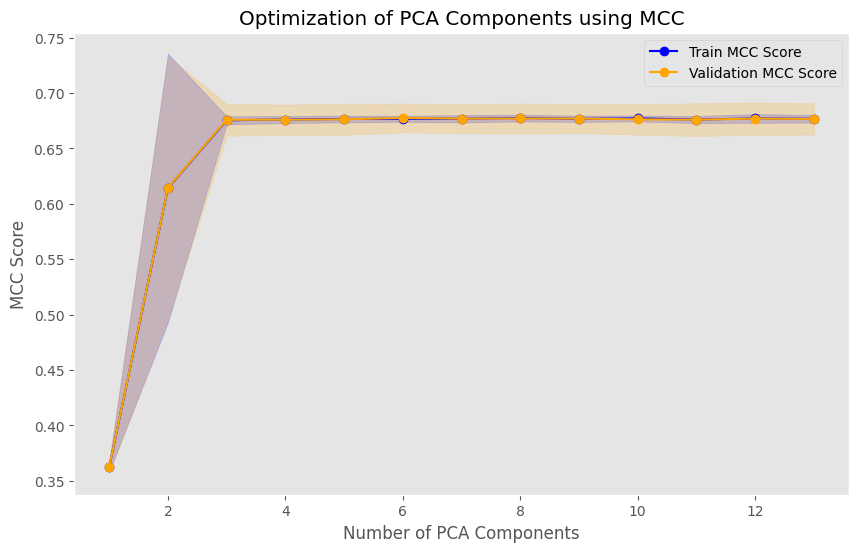

In [83]:
_ = optimize_pca_components(X_student_train, y_student_train, LogisticRegression(), min_frequency=0.05)

As previously observed in our visualizations, our data is already separable in 2 dimensions. However, it appears that this separability improves even further in higher dimensions.  

Visually, as noted with the learning curve, there is no sign of overfitting. Additionally, we observe that after 3 components, the results are nearly optimal.  

This suggests that choosing 3 components for our model could be a reasonable choice.

We will now attempt to optimize and visually analyze two hyperparameters simultaneously.  

This approach introduces significantly higher complexity, and if additional hyperparameters are included in the process, this visual method may no longer be feasible.

In [84]:
def optimize_pca_and_encoder(X: pd.DataFrame,
                             y: pd.Series,
                             model: BaseEstimator, 
                             min_frequency_range: np.ndarray = np.linspace(0.01, 0.5, 10),
                             max_components: int = None,
                             cv: int = 5) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Optimize both n_components for PCA and min_frequency for OneHotEncoder with a given model using MCC.
    Displays a contour plot of MCC scores.

    :param X: Feature DataFrame.
    :param y: Target Series.
    :param model: Estimator to use in the pipeline.
    :param min_frequency_range: Range of min_frequency values to test (default: np.linspace(0.01, 0.5, 10)).
    :param max_components: Maximum number of PCA components to test (default: 1 to number of features in X).
    :param cv: Number of cross-validation folds (default: 5).
    :return: Tuple of (min_frequency_values, n_components_values, scores_grid).
    """

    if max_components is None:
        max_components = min(X.shape[1], X.shape[0] * (cv - 1) // cv)

    n_components_range = range(1, max_components + 1)
    scores_grid = []

    for min_frequency in tqdm(min_frequency_range, desc='Optimizing PCA and Encoder'):
        row_scores = []
        for n_components in n_components_range:
            column_transformer = ColumnTransformer(
                [('encoder', OneHotEncoder(drop='first', min_frequency=min_frequency, handle_unknown="ignore"),
                  X.select_dtypes(include='object').columns)],
                remainder='passthrough',
                sparse_threshold=0
            )
            pipeline = Pipeline([
                ('preprocessor', column_transformer),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=n_components)),
                ('model', model)
            ])
            try:
                score = np.mean(cross_val_score(pipeline, X, y, cv=cv, scoring="matthews_corrcoef", n_jobs=-1))
                row_scores.append(score)
            except ValueError:
                row_scores.append(np.nan)
        scores_grid.append(row_scores)

    min_frequency_values = np.array(min_frequency_range)
    n_components_values = np.array(list(n_components_range))
    scores_grid = np.array(scores_grid)

    X_mesh, Y_mesh = np.meshgrid(n_components_values, min_frequency_values)

    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X_mesh, Y_mesh, scores_grid, levels=50, cmap='viridis_r', alpha=0.8)
    plt.colorbar(contour, label="MCC Score")
    plt.xlabel("Number of PCA Components")
    plt.ylabel("Min Frequency (OneHotEncoder)")
    plt.title("Optimization of n_components and min_frequency (MCC)")
    plt.show()

    return min_frequency_values, n_components_values, scores_grid

Optimizing PCA and Encoder:   0%|          | 0/12 [00:00<?, ?it/s]

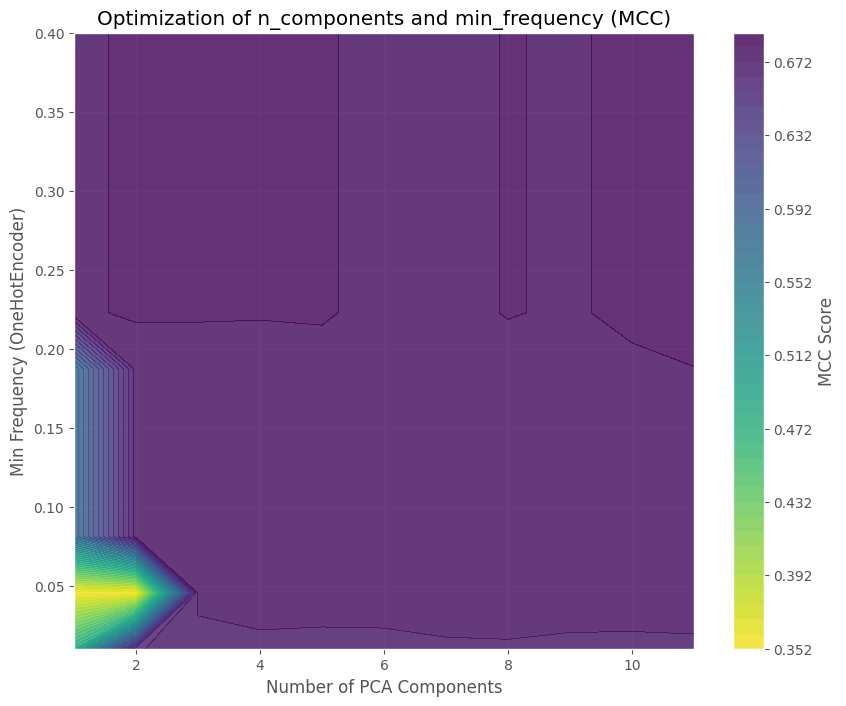

In [85]:
_ = optimize_pca_and_encoder(X_student_train, y_student_train, LogisticRegression(), min_frequency_range=np.linspace(0.01, 0.4, 12), max_components=11)

We observe that a model with hyperparameters simplifying the training process would suffice to achieve good performance.

The most significant finding is that higher scores are obtained when rare categories are excluded from consideration.

<a id="advanced-hyperparameter-search-with-non-gradient-methods"></a>
#### **2.2.3 Advanced Hyperparameter Search with Free-Gradient Methods**

Now, we aim to optimize multiple parameters simultaneously. As mentioned earlier, visual optimization is no longer feasible in such cases.  
While traditional methods like **Random Search** or **Grid Search** could be used, we will employ a more advanced gradient-free optimization technique called Tree-structured Parzen Estimator (TPE).  
This method "intelligently" explores the parameter space and converges much faster than conventional approaches.

The optimization will be performed using the `optuna` library.

For more details, look at the TPE paper: [Tree-structured Parzen Estimator Approach to Hyperparameter Optimization](https://arxiv.org/pdf/2304.11127).

In [86]:
def optimize_model_with_optuna(
    trial: optuna.Trial,
    X: pd.DataFrame,
    y: pd.Series,
    model_pipeline: Union[Pipeline, ImbPipeline],
    param_generator: Callable[[optuna.Trial],Dict[str, any]],
    scoring_metric: str = "matthews_corrcoef",
    cv: int = 5) -> float:
    """
    Optimize a model pipeline using Optuna.

    :param trial: The Optuna trial.
    :param X: The features.
    :param y: The target.
    :param model_pipeline: The model pipeline to optimize.
    :param param_generator: The function to generate the parameters.
    :param scoring_metric: The scoring metric.
    :param cv: The number of cross-validation folds.
    :return: The score.
    """

    param_grid = param_generator(trial)

    model_pipeline.set_params(**param_grid)

    try:
        scores = cross_val_score(
            model_pipeline,
            X,
            y,
            cv=cv,
            scoring=scoring_metric,
            n_jobs=-1
        )
    except Exception:
        return 0.0

    return scores.mean()

In [87]:
def optimize_logistic_regression_with_optuna(trial: optuna.Trial,
                                             X: Union[pd.DataFrame, np.ndarray],
                                             y: Union[pd.Series, np.ndarray],
                                             balanced: bool = False,
                                             oversampling: bool = False) -> float:
    """
    Optimize a logistic regression model using Optuna.

    :param trial: The Optuna trial.
    :param X: The features.
    :param y: The target.
    :param balanced: Whether to use balanced class weights.
    :param oversampling: Whether to use oversampling.
    :return: The score.
    """

    if oversampling:
        model_pipeline = ImbPipeline([
            ('columntransformer', make_column_transformer(
                (OneHotEncoder(drop='first', handle_unknown='ignore'),
                 X.select_dtypes(include='object').columns),
                remainder='passthrough',
                sparse_threshold=0
            )),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA()),
            ('logisticregression', LogisticRegression(class_weight='balanced' if balanced else None))
        ])

        param_generator_logistic_regression = lambda trial: {
            'columntransformer__onehotencoder__min_frequency': trial.suggest_float('min_frequency', 0.01, 0.5),
            'pca__n_components': trial.suggest_int('n_components', 1, min(X_student_cleaned.shape[1], 11)),
            'logisticregression__C': trial.suggest_float('C', 1e-5, 1e5, log=True),
            'smote__k_neighbors': trial.suggest_int('k_neighbors', 2, 15),
        }



    else:
        model_pipeline = make_pipeline(
            make_column_transformer(
                (OneHotEncoder(drop='first', handle_unknown='ignore'),
                 X.select_dtypes(include='object').columns),
                remainder='passthrough',
                sparse_threshold=0
            ),
            StandardScaler(),
            PCA(),
            LogisticRegression(class_weight='balanced' if balanced else None)
        )

        param_generator_logistic_regression = lambda trial: {
            'columntransformer__onehotencoder__min_frequency': trial.suggest_float('min_frequency', 0.01, 0.5),
            'pca__n_components': trial.suggest_int('n_components', 1, min(X_student_cleaned.shape[1], 11)),
            'logisticregression__C': trial.suggest_float('C', 1e-5, 1e5, log=True)
        }

    return optimize_model_with_optuna(
        trial,
        X,
        y,
        model_pipeline,
        param_generator_logistic_regression
    )

In [88]:
logistic_regression_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
logistic_regression_study.optimize(lambda trial: optimize_logistic_regression_with_optuna(trial, X_student_train, y_student_train),
                                   n_trials=200, show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [89]:
logistic_regression_study_dataframe = logistic_regression_study.trials_dataframe()
logistic_regression_study_dataframe.head()

number     value             datetime_start          datetime_complete  \
0       0  0.679933 2024-12-10 12:50:05.308110 2024-12-10 12:50:05.504349   
1       1  0.675081 2024-12-10 12:50:05.504851 2024-12-10 12:50:05.698604   
2       2  0.674577 2024-12-10 12:50:05.699003 2024-12-10 12:50:05.888838   
3       3  0.678860 2024-12-10 12:50:05.889493 2024-12-10 12:50:06.083123   
4       4  0.678415 2024-12-10 12:50:06.083723 2024-12-10 12:50:06.279430   

                duration      params_C  params_min_frequency  \
0 0 days 00:00:00.196239    208.900470              0.193525   
1 0 days 00:00:00.193753      0.000363              0.303343   
2 0 days 00:00:00.189835     10.260065              0.038461   
3 0 days 00:00:00.193630  50014.798289              0.356956   
4 0 days 00:00:00.195707      0.000658              0.417897   

   params_n_components     state  
0                   11  COMPLETE  
1                    2  COMPLETE  
2                   10  COMPLETE  
3                    1  COMPLETE  
4                    3  COMPLETE

In [185]:
def plot_optuna_study(study: optuna.study.Study) -> None:
    """
    Plot the Optuna study results.

    :param study: The Optuna study.
    """

    trials_df = study.trials_dataframe(attrs=('params', 'value')).dropna()
    trials_df.columns = [col.replace('params_', '') for col in trials_df.columns]
    
    param_columns = [col for col in trials_df.columns if col != 'value']
    categorical_params = trials_df[param_columns].select_dtypes(exclude=['float64']).columns
    n_params = len(param_columns)
    n_rows = (n_params + 2 - 1) // 2
    
    fig, axes = plt.subplots(n_rows, 2, figsize=(10, n_rows * 4))
    axes = axes.flatten()

    for idx, param in enumerate(param_columns):
        ax = axes[idx]
        if param in categorical_params:
            grouped = trials_df.groupby(param).agg(
                mean_score=('value', 'mean'),
                count=('value', 'size')
            ).reset_index()

            ax.bar(
                grouped[param], grouped['count'], 
                color=plt.cm.coolwarm((grouped['mean_score'] - grouped['mean_score'].min()) /
                                      (grouped['mean_score'].max() - grouped['mean_score'].min())),
                edgecolor='black'
            )

            ax.set_title(f"{param}")
            ax.set_xlabel("Value")
            ax.set_ylabel("Count")
        else:
            _ = ax.scatter(
                trials_df[param], trials_df['value'], 
                c=trials_df['value'], 
                cmap='coolwarm', 
                edgecolor='black', alpha=0.7
            )

            ax.set_title(f"{param}")
            ax.set_xlabel(f"Value")
            ax.set_ylabel("MCC")

    for idx in range(len(param_columns), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    fig.suptitle(f"Optuna Study Results for {len(trials_df)} iterations", y=1.02, size=15)
    plt.show()

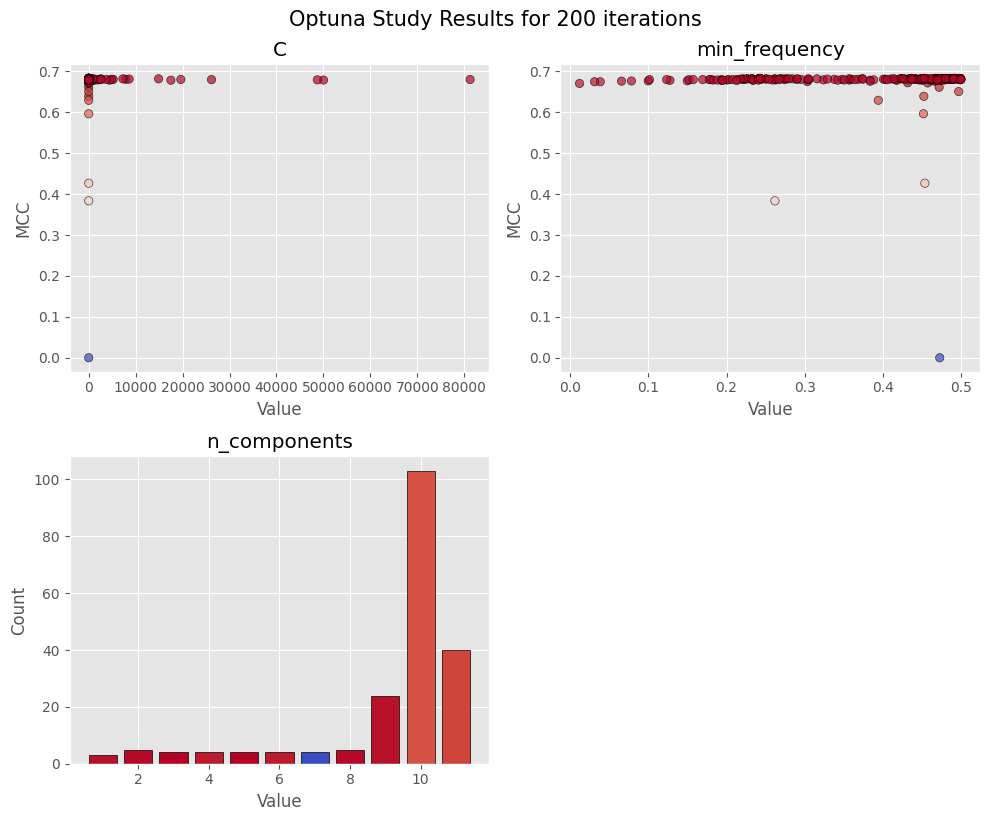

In [186]:
plot_optuna_study(logistic_regression_study)

We observe that the algorithm deemed it preferable to explore higher values for `min_frequency` and `n_components`. However, when examining the results, it appears that lower dimensions tend to yield better performance. This observation, however, is based on fewer occurrences, making it less statistically significant.

In [92]:
print(f"Best parameters for Logistic Regression: {logistic_regression_study.best_params} with MCC: {logistic_regression_study.best_value:.4f}")

Best parameters for Logistic Regression: {'min_frequency': 0.47485458325829577, 'n_components': 10, 'C': 0.0015799886703035037} with MCC: 0.6831


<a id="addressing-class-imbalance"></a>
#### **2.2.4 Addressing Class Imbalance**

We observed that our $ (X, y)_{\text{student}} $ dataset was **imbalanced**.  
To address this, we decided to use the **MCC** metric, which assigns equal importance to predictions of the positive and negative classes.  
We aim to optimize MCC using techniques that balance the representation of positive and negative classes in the training process.

##### **1. Weighted BCE**

The first approach involves weighting the loss function, specifically the BCE loss as follows:

$$
\text{BCE Loss} = -\frac{1}{N} \sum_{i=1}^N \left( w_1 \cdot y_i \cdot \log(\hat{y}_i) + w_0 \cdot (1 - y_i) \cdot \log(1 - \hat{y}_i) \right)
$$

Where:
- $w_1 = \frac{1}{\sum \mathbb{1}_{y_i = 1}}$,  
- $w_0 = \frac{1}{\sum \mathbb{1}_{y_i = 0}}$,   

##### **2. SMOTE**

SMOTE oversamples the minority class by generating synthetic examples. The process is as follows:
1. Select $ k $ nearest neighbors for each minority class sample.  

2. Randomly pick one neighbor for each sample.  

3. Generate a synthetic sample using the formula:
   $$
   \mathbf{x}_{\text{new}} = \mathbf{x} + \lambda \cdot (\mathbf{x}_{\text{neighbor}} - \mathbf{x})
   $$
   where $ \lambda \sim U(0, 1) $.

This process is repeated until the minority class matches the size of the majority class.

##### **3. Non-Uniform Negative Sampling and Log Odds**

NUNS is a method developed by TikTok and the University of Connecticut to improve training on imbalanced datasets.  

The process is as follows:

1. **Sampling for the Pilot Model**: 
   - Randomly sample an equal number of majority class examples as the number of minority class examples.
   - Train a **pilot model** on this balanced dataset to estimate probabilities.

2. **Predict Probabilities**:
   - Use the pilot model to predict the probabilities $ p_{\text{minority}} $ for all majority class examples in the dataset.

3. **Weighted Sampling**:
   - Normalize $ p_{\text{minority}} $ by dividing it by the mean probability of the minority class.
   - Adjust the probabilities using a hyperparameter $ \text{sampling\_rate} $, which controls how strongly the model focuses on hard-to-classify examples:
     $$
     p_{\text{new}} = \frac{p_{\text{minority}}}{\text{mean}(p_{\text{minority}})} \cdot \text{sampling\_rate}
     $$
   - Generate a random uniform variable $ u \sim U(0, 1) $. Retain the example if $  u \leq p_{\text{new}} $.

4. **Log Odds Correction**:
   - Train the final model using:
     - All minority class examples,
     - Majority class examples sampled as above, with sample weights proportional to $ \frac{1}{p_{\text{new}}} $.

For more details, look at the NUNSLOCRED paper: [Nonuniform Negative Sampling and Log Odds Correction with Rare Events Data](https://arxiv.org/pdf/2110.13048).


In [93]:
balanced_logistic_regression_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
balanced_logistic_regression_study.optimize(lambda trial: optimize_logistic_regression_with_optuna(trial, X_student_train, y_student_train, balanced=True),
                                            n_trials=200, show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [94]:
print(f"Best parameters for Balanced Logistic Regression: {balanced_logistic_regression_study.best_params} with MCC: {balanced_logistic_regression_study.best_value:.4f}")

Best parameters for Balanced Logistic Regression: {'min_frequency': 0.42300185786273137, 'n_components': 10, 'C': 0.2791176400868308} with MCC: 0.6832


In [95]:
logistic_regression_smote_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
logistic_regression_smote_study.optimize(lambda trial: optimize_logistic_regression_with_optuna(trial, X_student_train, y_student_train, oversampling=True),
                                         n_trials=200, show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [96]:
print(f"Best parameters for Logistic Regression with SMOTE: {logistic_regression_smote_study.best_params} with MCC: {logistic_regression_smote_study.best_value:.4f}")

Best parameters for Logistic Regression with SMOTE: {'min_frequency': 0.17049869041101712, 'n_components': 11, 'C': 47630.2709511255, 'k_neighbors': 2} with MCC: 0.6830


We aim to integrate the `NUNS` algorithm into the scikit-learn API to facilitate its optimization and seamless use with other features.  

This integration ensures that NUNS works perfectly with tools like `Pipeline` and `make_pipeline`, enabling optimal compatibility for complex workflows.

In [97]:
class NUNSClassifier(BaseEstimator, ClassifierMixin):
    """
    Implementation of the following paper https://arxiv.org/pdf/2110.13048 integrated with sklearn API.
    """

    def __init__(self,
                 pilot_model: BaseEstimator = LogisticRegression(),
                 final_model: BaseEstimator = LogisticRegression(),
                 final_model_name_if_pipeline: str = None,
                 sampling_rate: float = 0.1,
                 random_state: int = 42) -> None:
        """
        Non-Uniform Sampling and Log Odds Correction Classifier with customizable models.
        
        :param pilot_model: Model used for scoring samples in the pilot phase (must support predict_proba).
        :param final_model: Model used for the final classification (must support sample_weight).
        :param final_model_name_if_pipeline: Name of the final model if it is a pipeline (we need to access the model).
        :param sampling_rate: The sampling rate for the minority class.
        :param random_state: The random state for reproducibility.
        """

        self.pilot_model = pilot_model
        self.final_model = final_model
        self.final_model_name_if_pipeline = final_model_name_if_pipeline
        if isinstance(self.final_model, Pipeline) and final_model_name_if_pipeline is None:
            raise ValueError("final_model_name_if_pipeline must be specified for pipelines as final_model.")
        self.sampling_rate = sampling_rate
        self.random_state = random_state
        self.__unbalanced_class = None
        self.classes_ = None
        np.random.seed(random_state)

    def __uniform_sample(self,
                         data: pd.DataFrame,
                         labels: pd.Series
                         ) -> Tuple[pd.DataFrame, np.ndarray]:
        """
        Sample the majority class to balance the dataset.

        :param data: The data to sample.
        :param labels: The labels to sample.
        :return: The balanced data and labels.
        """

        labels = labels.reset_index(drop=True) if isinstance(labels, pd.Series) else labels
        data = data.reset_index(drop=True)

        np.random.seed(self.random_state)
        positive_indices = np.where(labels == 1)[0]
        negative_indices = np.where(labels == 0)[0]

        if len(positive_indices) > len(negative_indices):
            sampled_positive_indices = np.random.choice(positive_indices, size=len(negative_indices), replace=False)
            balanced_indices = np.concatenate([sampled_positive_indices, negative_indices])
            self.__unbalanced_class = 1
        else:
            sampled_negative_indices = np.random.choice(negative_indices, size=len(positive_indices), replace=False)
            balanced_indices = np.concatenate([positive_indices, sampled_negative_indices])
            self.__unbalanced_class = 0

        balanced_data = data.iloc[balanced_indices]
        balanced_labels = labels[balanced_indices]

        return balanced_data, balanced_labels

    def __score_samples(self,
                        pilot_model: BaseEstimator,
                        data: pd.DataFrame) -> np.ndarray:
        """
        Get the class probabilities of the samples.

        :param pilot_model: The model used for scoring the samples.
        :param data: The data to score.
        :return: The class probabilities.
        """

        return pilot_model.predict_proba(data)[:, 1]

    def __weighted_sample(self,
                          data: pd.DataFrame,
                          labels: Union[np.ndarray, pd.Series],
                          probabilities: np.ndarray
                          ) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
        """
        Perform weighted sampling for the minority class.

        :param data: The data to sample.
        :param labels: The labels to sample.
        :param probabilities: The class probabilities.
        :return: Indices of the weighted samples.
        """

        labels = labels.values if isinstance(labels, pd.Series) else labels
        np.random.seed(self.random_state)

        weighted_indices = []
        sampling_probs = []

        if self.__unbalanced_class == 1:
            minor_class_probs = probabilities[labels == 0]
        else:
            minor_class_probs = 1 - probabilities[labels == 1]

        mean_probability = np.mean(minor_class_probs)

        for i in range(len(data)):
            if labels[i] == self.__unbalanced_class:
                p = 1 - probabilities[i] if self.__unbalanced_class == 1 else probabilities[i]
                sampling_prob = self.sampling_rate * p / mean_probability

                if np.random.uniform(0, 1) < sampling_prob:
                    weighted_indices.append(i)
                    sampling_probs.append(sampling_prob)
            else:
                weighted_indices.append(i)
                sampling_probs.append(1.0)

        return np.array(weighted_indices), np.array(sampling_probs)

    def fit(self,
            X: pd.DataFrame,
            y: pd.Series) -> "NUNSClassifier":
        """
        Fit the Non-Uniform Sampling Classifier.

        :param X: The features.
        :param y: The target.
        :return: The fitted model.
        """

        self.classes_ = np.unique(y)

        balanced_X, balanced_y = self.__uniform_sample(X, y)
        
        self.pilot_model.fit(balanced_X, balanced_y)

        probabilities = self.__score_samples(self.pilot_model, X)

        weighted_indices, sampling_probs = self.__weighted_sample(X, y, probabilities)

        weighted_X = X.iloc[weighted_indices]
        weighted_y = y.iloc[weighted_indices]

        weights = 1 / sampling_probs
        if self.final_model_name_if_pipeline is not None:
            self.final_model.fit(weighted_X, weighted_y, **{f"{self.final_model_name_if_pipeline}__sample_weight": weights})
        else:
            self.final_model.fit(weighted_X, weighted_y, sample_weight=weights)

        return self

    def predict(self, X: pd.DataFrame) -> np.ndarray:
        """
        Predict the target.

        :param X: The features.
        :return: The predictions.
        """

        return self.final_model.predict(X)

    def predict_proba(self, X: pd.DataFrame) -> np.ndarray:
        """
        Predict the class probabilities.

        :param X: The features.
        :return: The class probabilities.
        """

        return self.final_model.predict_proba(X)
    
    def score(self,
              X: pd.DataFrame,
              y: pd.Series) -> float:
        """
        Score the model.

        :param X: The features.
        :param y: The target.
        :return: The score.
        """
        predictions = self.predict(X)
        if np.any(np.isnan(predictions)):
            raise ValueError("Model has NaN predictions.")
        return accuracy_score(y, self.predict(X))

In [191]:
dummy_nuns = NUNSClassifier()
dummy_nuns

NUNSClassifier()

In [192]:
del dummy_nuns

In [98]:
def optimize_nuns_with_optuna(trial: optuna.Trial,
                              X: Union[pd.DataFrame, np.ndarray],
                              y: Union[pd.Series, np.ndarray],
                              pilot_model: Optional[Union[LogisticRegression, XGBClassifier, RandomForestClassifier]] = None,
                              final_model: Optional[Union[LogisticRegression, XGBClassifier, RandomForestClassifier]] = None,
                              scoring_metric: str = "matthews_corrcoef",
                              cv: int = 5) -> float:
    """
    Optimize a NUNSClassifier model using Optuna, with configurable pilot and final models.

    :param trial: The Optuna trial.
    :param X: Input features.
    :param y: Target labels.
    :param pilot_model: Predefined pilot model (default: None).
    :param final_model: Predefined final model (default: None).
    :param scoring_metric: Scoring metric (default: "matthews_corrcoef").
    :param cv: Number of cross-validation folds (default: 5).
    :return: The score.
    """

    sampling_rate = trial.suggest_float("sampling_rate", 0.01, 0.5)
    min_frequency = trial.suggest_float("min_frequency", 0.01, 0.4)
    n_components = trial.suggest_int("n_components", 1, min(X.shape[1], 10))

    if pilot_model is None:
        pilot_model_type = trial.suggest_categorical("pilot_model_type", ["logistic", "xgboost", "random_forest"])
        if pilot_model_type == "logistic":
            pilot_model_C = trial.suggest_float("pilot_model__C", 1e-5, 1e5, log=True)
            pilot_model = LogisticRegression(C=pilot_model_C)
        elif pilot_model_type == "xgboost":
            pilot_model = XGBClassifier(
                n_estimators=trial.suggest_int("pilot_model__n_estimators", 50, 300),
                max_depth=trial.suggest_int("pilot_model__max_depth", 3, 10),
                learning_rate=trial.suggest_float("pilot_model__learning_rate", 0.01, 0.3)
            )
        elif pilot_model_type == "random_forest":
            pilot_model = RandomForestClassifier(
                n_estimators=trial.suggest_int("pilot_model__n_estimators", 50, 300),
                max_depth=trial.suggest_int("pilot_model__max_depth", 3, 10),
                min_samples_split=trial.suggest_int("pilot_model__min_samples_split", 2, 10)
            )
    else:
        if isinstance(pilot_model, LogisticRegression):
            pilot_model.C = trial.suggest_float("pilot_model__C", 1e-5, 1e5, log=True)
        elif isinstance(pilot_model, XGBClassifier):
            pilot_model.set_params(
                n_estimators=trial.suggest_int("pilot_model__n_estimators", 50, 300),
                max_depth=trial.suggest_int("pilot_model__max_depth", 3, 10),
                learning_rate=trial.suggest_float("pilot_model__learning_rate", 0.01, 0.3)
            )
        elif isinstance(pilot_model, RandomForestClassifier):
            pilot_model.set_params(
                n_estimators=trial.suggest_int("pilot_model__n_estimators", 50, 300),
                max_depth=trial.suggest_int("pilot_model__max_depth", 3, 10),
                min_samples_split=trial.suggest_int("pilot_model__min_samples_split", 2, 10)
            )

    if final_model is None:
        final_model_type = trial.suggest_categorical("final_model_type", ["logistic", "xgboost", "random_forest"])
        if final_model_type == "logistic":
            final_model_C = trial.suggest_float("final_model__C", 1e-5, 1e5, log=True)
            final_model = LogisticRegression(C=final_model_C)
        elif final_model_type == "xgboost":
            final_model = XGBClassifier(
                n_estimators=trial.suggest_int("final_model__n_estimators", 50, 300),
                max_depth=trial.suggest_int("final_model__max_depth", 3, 10),
                learning_rate=trial.suggest_float("final_model__learning_rate", 0.01, 0.3)
            )
        elif final_model_type == "random_forest":
            final_model = RandomForestClassifier(
                n_estimators=trial.suggest_int("final_model__n_estimators", 50, 300),
                max_depth=trial.suggest_int("final_model__max_depth", 3, 10),
                min_samples_split=trial.suggest_int("final_model__min_samples_split", 2, 10)
            )
    else:
        if isinstance(final_model, LogisticRegression):
            final_model_name_if_pipeline = "logisticregression"
            final_model.C = trial.suggest_float("final_model__C", 1e-5, 1e5, log=True)
        elif isinstance(final_model, XGBClassifier):
            final_model_name_if_pipeline = "xgbclassifier"
            final_model.set_params(
                n_estimators=trial.suggest_int("final_model__n_estimators", 50, 300),
                max_depth=trial.suggest_int("final_model__max_depth", 3, 10),
                learning_rate=trial.suggest_float("final_model__learning_rate", 0.01, 0.3)
            )
        elif isinstance(final_model, RandomForestClassifier):
            final_model_name_if_pipeline = "randomforestclassifier"
            final_model.set_params(
                n_estimators=trial.suggest_int("final_model__n_estimators", 50, 300),
                max_depth=trial.suggest_int("final_model__max_depth", 3, 10),
                min_samples_split=trial.suggest_int("final_model__min_samples_split", 2, 10)
            )

    def build_pipeline(model):
        apply_feature_engineering = not isinstance(model, (RandomForestClassifier, XGBClassifier))

        preprocessing_steps = [make_column_transformer(
            (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=min_frequency),
             X.select_dtypes(include='object').columns),
            remainder='passthrough',
            sparse_threshold=0
        )]
        if apply_feature_engineering:
            preprocessing_steps.extend([
                StandardScaler(),
                PCA(n_components=n_components),
                model
            ])

        return make_pipeline(*[step for step in preprocessing_steps])

    pilot_pipeline = build_pipeline(pilot_model)
    final_pipeline = build_pipeline(final_model)

    nuns_model = NUNSClassifier(
        pilot_model=pilot_pipeline,
        final_model=final_pipeline,
        final_model_name_if_pipeline=final_model_name_if_pipeline,
        sampling_rate=sampling_rate
    )

    scores = cross_val_score(
        nuns_model,
        X,
        y,
        cv=cv,
        scoring=scoring_metric,
        n_jobs=-1
    )        

    return scores.mean()

In [99]:
logistic_regression_nnus_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
logistic_regression_nnus_study.optimize(lambda trial: optimize_nuns_with_optuna(trial, X_student_train, y_student_train, pilot_model=LogisticRegression(), final_model=LogisticRegression()),
               n_trials=200, show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

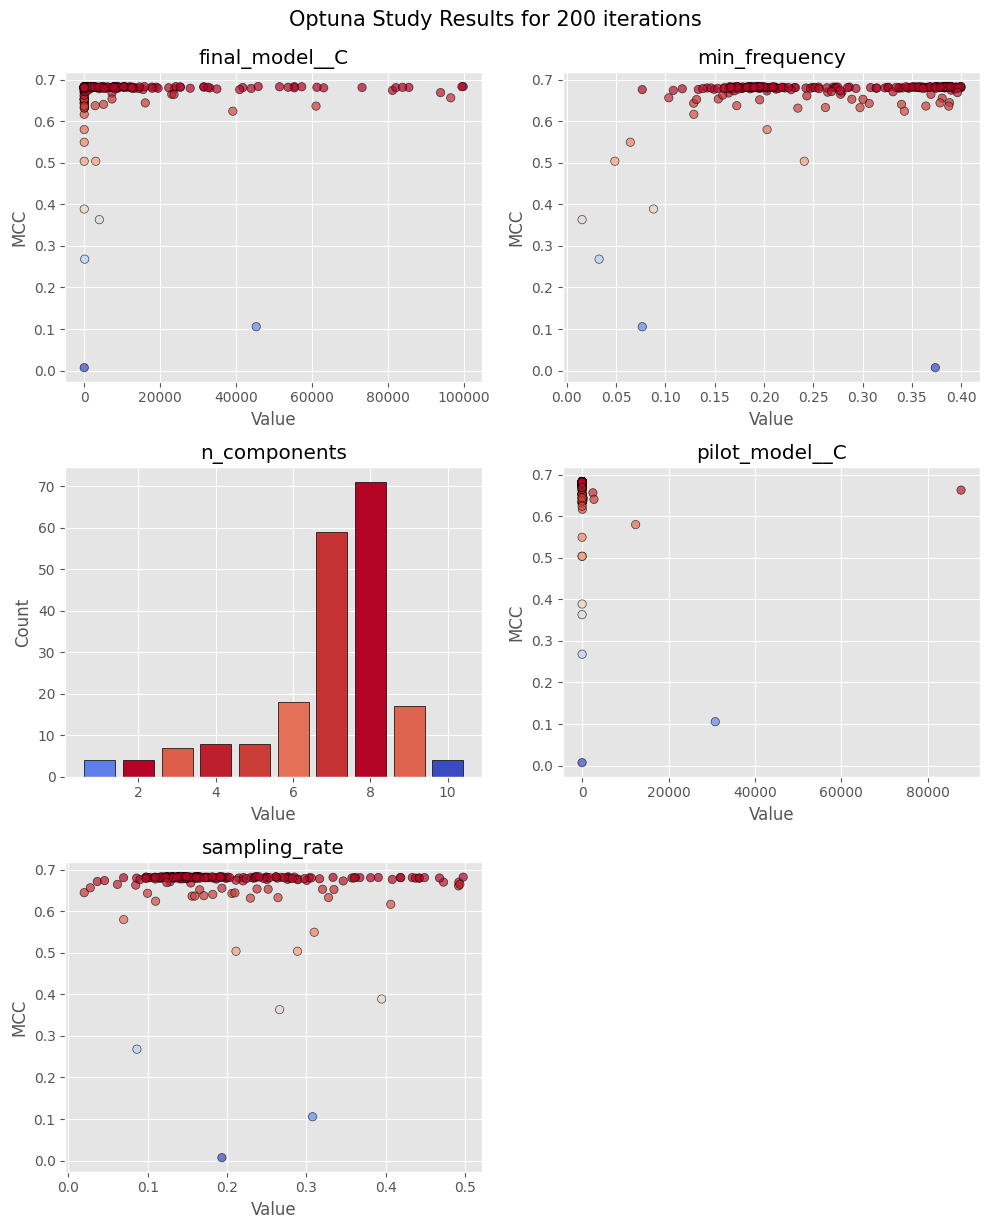

In [187]:
plot_optuna_study(logistic_regression_nnus_study)

We naturally have more hyperparameters since the `NUNS` algorithm involves two models.  

Here, we aim to interpret the impact of the `sampling_rate`. When `sampling_rate` is high, more samples from the majority class will be included, not just the hard-to-classify ones.  
Conversely, when it is low, fewer samples will be included, and they will mostly be the difficult examples since their probabilities will be higher.

In this analysis, the model explored the entire range of `sampling_rate` values.  
However, it appears to have converged between 0.1 and 0.3, indicating that a balance is needed—some easy examples should be included, but not too many.

In [101]:
print(f"Best parameters for NUNS Classifier: {logistic_regression_nnus_study.best_params} with MCC: {logistic_regression_nnus_study.best_value:.4f}")

Best parameters for NUNS Classifier: {'sampling_rate': 0.14072931260570748, 'min_frequency': 0.3859688958562578, 'n_components': 8, 'pilot_model__C': 0.00017440364838634142, 'final_model__C': 2.060675985176004} with MCC: 0.6836


<a id="comparative-evaluation-of-logistic-regression-methods"></a>
#### **2.2.5 Benchmark of Logistic Regression Methods**

We will now compare all these methods using $(X_{\text{test}}, y_{\text{test}})_{\text{student}}$ and standard metrics for binary classification.

In [102]:
def benchmark(pipelines: List[Tuple[str, Union[Pipeline, ImbPipeline]]],
              X_test: pd.DataFrame,
              y_test: pd.Series) -> Dict[str, Dict[str, float]]:
    """
    Benchmark multiple pipelines on test data using various metrics and visualize the results.

    :param pipelines: List of tuples (name, pipeline) to benchmark.
    :param X_test: Test features.
    :param y_test: Test labels.
    :return: A dictionary with metrics for each pipeline.
    """

    metrics = {
        'ROC AUC': roc_auc_score,
        'MCC': matthews_corrcoef,
        'F1 Score': f1_score,
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score
    }

    results = {name: {} for name, _ in pipelines}
    colors = plt.cm.tab10.colors

    dummy_proba = np.full(len(y_test), y_test.mean())
    dummy_metrics = {metric: 0.0 for metric in metrics}
    dummy_metrics['ROC AUC'] = roc_auc_score(y_test, dummy_proba)

    confusion_matrices = {}
    for name, pipeline in pipelines:
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, 'predict_proba') else None

        for metric_name, metric_func in metrics.items():
            if metric_name == 'ROC AUC' and y_pred_proba is not None:
                score = metric_func(y_test, y_pred_proba)
            else:
                score = metric_func(y_test, y_pred)
            results[name][metric_name] = score

        confusion_matrices[name] = confusion_matrix(y_test, y_pred)

    num_metrics = len(metrics)
    cols = 3
    rows = (num_metrics + cols - 1) // cols
    fig1, axes = plt.subplots(rows, cols, figsize=(15, 10), constrained_layout=True)

    for i, (metric_name, metric_func) in enumerate(metrics.items()):
        ax = axes.flatten()[i]

        if metric_name == 'ROC AUC':
            for j, (name, pipeline) in enumerate(pipelines):
                y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, 'predict_proba') else None
                if y_pred_proba is not None:
                    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
                    ax.plot(fpr, tpr, label=f'{name} (AUC={results[name][metric_name]:.4f})',
                            color=colors[j % len(colors)])
            dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_proba)
            ax.plot(dummy_fpr, dummy_tpr, 'k--', label='Dummy Model', color='gray')
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_title('ROC Curve')
            ax.legend(loc='lower right')
        else:
            scores = [results[name][metric_name] for name, _ in pipelines]
            names = [name for name, _ in pipelines]
            ax.bar(names, scores, color=colors[:len(scores)])
            ax.set_title(metric_name)
            ax.set_xticklabels(names, rotation=45, ha='right')

        ax.grid(False)

    for j in range(num_metrics, rows * cols):
        axes.flatten()[j].axis('off')

    fig1.suptitle('Model Benchmarking', y=1.02, size=15)

    fig2, cm_axes = plt.subplots(1, len(pipelines), figsize=(5 * len(pipelines), 5), constrained_layout=True)

    if len(pipelines) == 1:
        cm_axes = [cm_axes]  

    for ax, (name, cm) in zip(cm_axes, confusion_matrices.items()):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
        ax.set_title(f'{name} Confusion Matrix')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')

    fig2.suptitle('Confusion Matrices', y=1.1, size=15)

    plt.show()

    return results

In [103]:
logistic_regression_imbalanced_pipeline = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=logistic_regression_study.best_params['min_frequency']),
         X_student_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    ),
    StandardScaler(),
    PCA(),
    LogisticRegression(C=logistic_regression_study.best_params['C'])
)

logistic_regression_balanced_pipeline = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=balanced_logistic_regression_study.best_params['min_frequency']),
         X_student_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    ),
    StandardScaler(),
    PCA(),
    LogisticRegression(class_weight='balanced', C=balanced_logistic_regression_study.best_params['C'])
)

logistic_regression_smote_pipeline = ImbPipeline([
    ('columntransformer', make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=logistic_regression_smote_study.best_params['min_frequency']),
         X_student_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    )),
    ('smote', SMOTE(k_neighbors=logistic_regression_smote_study.best_params['k_neighbors'])),
    ('pca', PCA(n_components=logistic_regression_smote_study.best_params['n_components'])),
    ('logisticregression', LogisticRegression(C=logistic_regression_smote_study.best_params['C']))
])

pilot_pipeline = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=logistic_regression_nnus_study.best_params['min_frequency']),
         X_student_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    ),
    StandardScaler(),
    PCA(n_components=logistic_regression_nnus_study.best_params['n_components']),
    LogisticRegression(C=logistic_regression_nnus_study.best_params['final_model__C'])
)

final_pipeline = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=logistic_regression_nnus_study.best_params['min_frequency']),
         X_student_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    ),
    StandardScaler(),
    PCA(n_components=logistic_regression_nnus_study.best_params['n_components']),
    LogisticRegression(C=logistic_regression_nnus_study.best_params['final_model__C'])
)

nuns_pipeline = NUNSClassifier(
    pilot_model=pilot_pipeline,
    final_model=final_pipeline,
    sampling_rate=logistic_regression_nnus_study.best_params['sampling_rate'],
    final_model_name_if_pipeline="logisticregression"
    )

In [104]:
pipelines = [
    ("Balanced LogReg", logistic_regression_balanced_pipeline),
    ("Imbalanced LogReg", logistic_regression_imbalanced_pipeline),
    ("LogReg + SMOTE", logistic_regression_smote_pipeline),
    ("LogReg NUNS", nuns_pipeline)
]

for pipe in pipelines:
    pipe[1].fit(X_student_train, y_student_train)

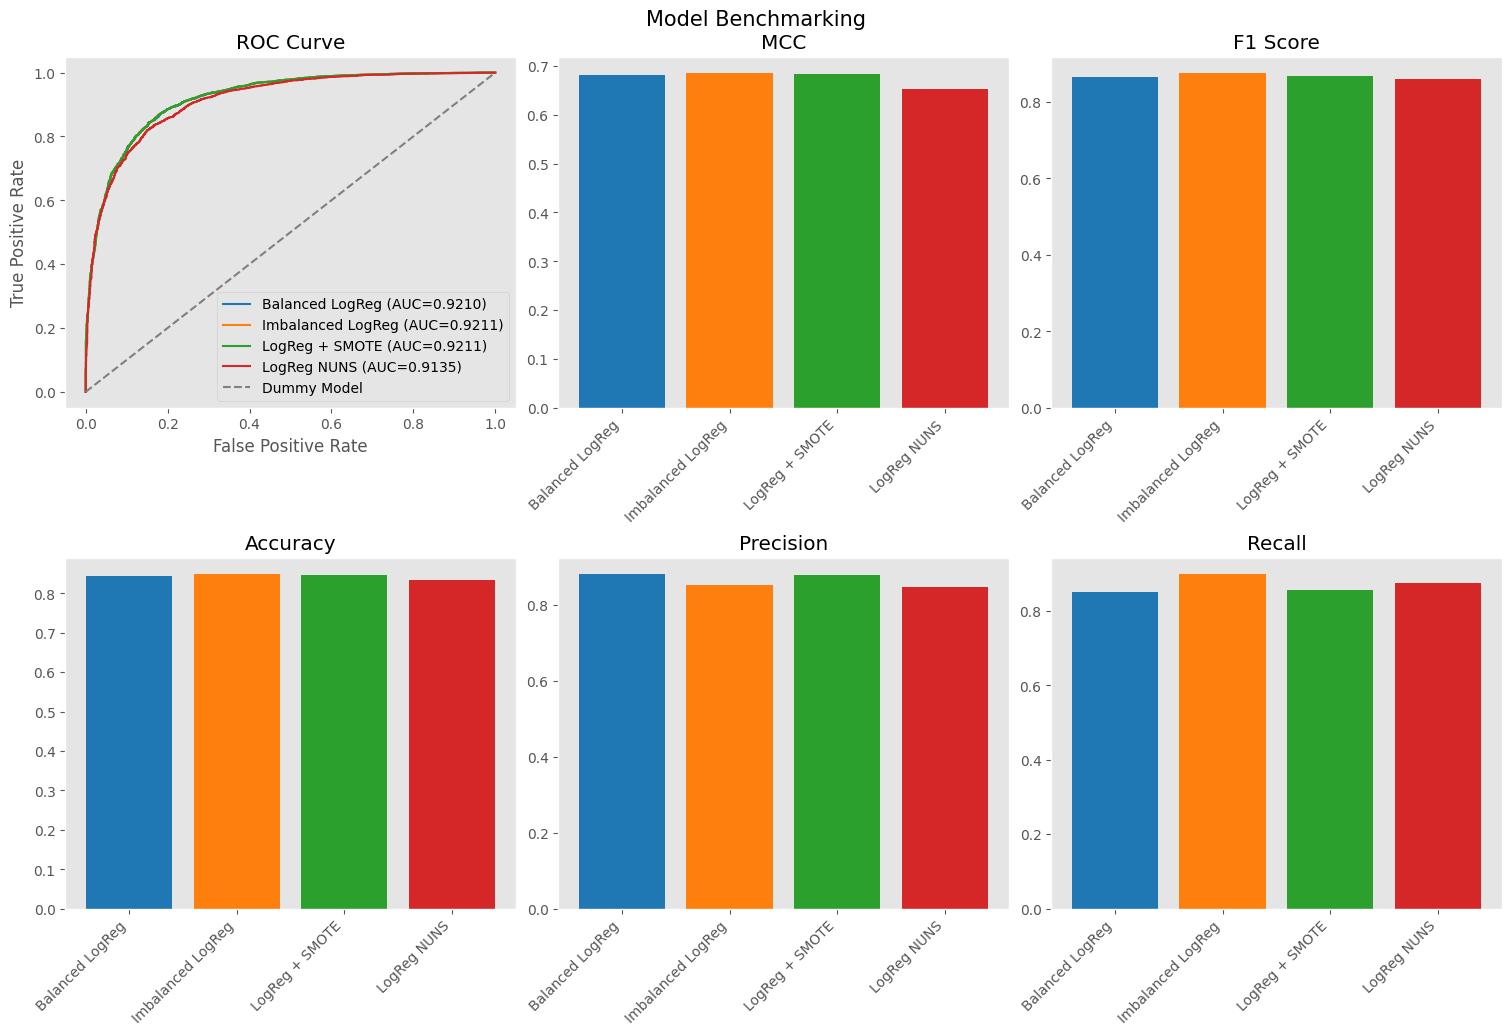

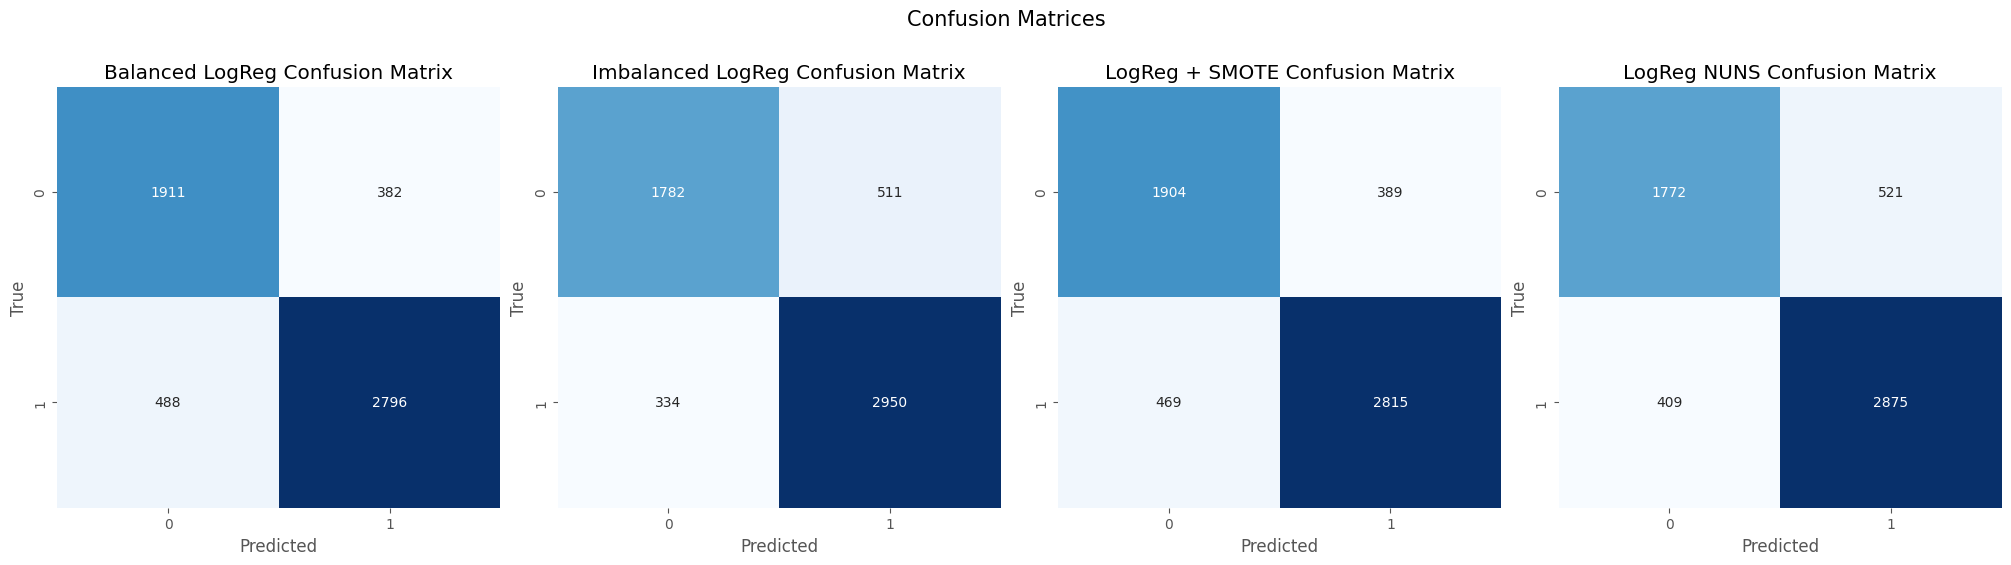

In [105]:
logistic_regression_benchmark = benchmark(pipelines, X_student_test, y_student_test)

The performance across metrics is quite comparable for all methods, except for `LogReg NUNS`, which appears to underperform slightly.  
`LogReg Imbalanced` achieves the highest F1-Score, indicating better prediction of the $y=1$ class, which is surprising given its minority status.  
Methods addressing imbalance seem to improve precision, thereby reducing the number of FP (garbage predictions), but miss more instances of the minority class (lower recall).  

Selecting a model here would depend on the "context": **do we want to target all depressive students, or focus on minimizing false positives for non-depressive ones?**

From the confusion matrices, we observe fewer FN with `SMOTE` and `LogReg Balanced`.  
However, this comes at the cost of slightly more FP, highlighting a trade-off in model performance.

<a id="ensemble-learning-and-model-stacking"></a>
#### **2.2.6 Ensemble Learning**

Now, we aim to enhance the overall performance by leveraging three ensemble learning algorithms:

1. **Random Forest**: This method is based on bagging (bootstrap aggregation), which effectively reduces overfitting by training multiple models on random subsets of the data and combining their predictions.  

2. **XGBoost**: This boosting-based algorithm excels at addressing underfitting by sequentially training models to correct the errors of their predecessors, leading to robust predictions.  

3. **Stacking**: In this approach, multiple base models generate predictions, and a meta-model is trained to make the final prediction based on these outputs.  
This allows for combining the strengths of different models for improved performance.


We will use `optuna` to optimize their hyperparamaters.

In [106]:
def optimize_ensemble_with_optuna(trial: optuna.Trial,
                                  X: Union[pd.DataFrame, np.ndarray],
                                  y: Union[pd.Series, np.ndarray],
                                  model_type: Literal['RandomForest', 'XGBoost', 'Stacking'] = 'RandomForest',
                                  oversampling: bool = False) -> float:
    """
    Optimize an ensemble model (RandomForest, XGBoost, or Stacking) using Optuna.

    :param trial: The Optuna trial.
    :param X: The features.
    :param y: The target.
    :param model_type: The type of ensemble model to optimize ('RandomForest', 'XGBoost', or 'Stacking').
    :param oversampling: Whether to apply SMOTE for oversampling.
    :return: The cross-validated score.
    """

    if model_type not in ['RandomForest', 'XGBoost', 'Stacking']:
        raise ValueError("model_type must be 'RandomForest', 'XGBoost', or 'Stacking'")

    if oversampling:
        model_pipeline = ImbPipeline([
            ('columntransformer', make_column_transformer(
                (OneHotEncoder(drop='first', handle_unknown='ignore'),
                 X.select_dtypes(include='object').columns),
                remainder='passthrough',
                sparse_threshold=0
            )),
            ('smote', SMOTE(random_state=42)),
            ('randomforestclassifier', RandomForestClassifier(random_state=42)) if model_type == 'RandomForest'
                    else ('xgbclassifier', XGBClassifier(use_label_encoder=False,eval_metric='logloss', random_state=42))
        ])
    elif model_type == 'Stacking':
        rf = RandomForestClassifier(random_state=42)
        xgb = XGBClassifier(use_label_encoder=False, random_state=42, eval_metric='logloss')
        meta_model = LogisticRegression()
        model_pipeline = make_pipeline(
            make_column_transformer(
                (OneHotEncoder(drop='first', handle_unknown='ignore'),
                 X.select_dtypes(include='object').columns),
                remainder='passthrough',
                sparse_threshold=0
            ),
            StackingClassifier(estimators=[
                ('rf', rf),
                ('xgb', xgb)
            ], final_estimator=meta_model)
        )
    else:
        model_pipeline = make_pipeline(
            make_column_transformer(
                (OneHotEncoder(drop='first', handle_unknown='ignore'),
                 X.select_dtypes(include='object').columns),
                remainder='passthrough',
                sparse_threshold=0
            ),
            RandomForestClassifier(random_state=42) if model_type == 'RandomForest' else XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
        )

    if model_type == 'RandomForest':
        param_generator = {
            'columntransformer__onehotencoder__min_frequency': trial.suggest_float('min_frequency', 0.01, 0.4),
            'randomforestclassifier__n_estimators': trial.suggest_int('n_estimators', 50, 300),
            'randomforestclassifier__max_depth': trial.suggest_int('max_depth', 3, 20),
            'randomforestclassifier__min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'randomforestclassifier__min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        }
    elif model_type == 'XGBoost':
        param_generator = {
            'columntransformer__onehotencoder__min_frequency': trial.suggest_float('min_frequency', 0.01, 0.4),
            'xgbclassifier__n_estimators': trial.suggest_int('n_estimators', 50, 300),
            'xgbclassifier__max_depth': trial.suggest_int('max_depth', 3, 10),
            'xgbclassifier__learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'xgbclassifier__subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'xgbclassifier__colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        }
    elif model_type == 'Stacking':
        param_generator = {
            'columntransformer__onehotencoder__min_frequency': trial.suggest_float('min_frequency', 0.01, 0.4),
            'stackingclassifier__rf__n_estimators': trial.suggest_int('rf__n_estimators', 50, 300),
            'stackingclassifier__rf__max_depth': trial.suggest_int('rf__max_depth', 3, 20),
            'stackingclassifier__rf__min_samples_split': trial.suggest_int('rf__min_samples_split', 2, 10),
            'stackingclassifier__rf__min_samples_leaf': trial.suggest_int('rf__min_samples_leaf', 1, 5),
            'stackingclassifier__xgb__n_estimators': trial.suggest_int('xgb__n_estimators', 50, 300),
            'stackingclassifier__xgb__max_depth': trial.suggest_int('xgb__max_depth', 3, 10),
            'stackingclassifier__xgb__learning_rate': trial.suggest_float('xgb__learning_rate', 0.01, 0.3),
            'stackingclassifier__xgb__subsample': trial.suggest_float('xgb__subsample', 0.5, 1.0),
            'stackingclassifier__xgb__colsample_bytree': trial.suggest_float('xgb__colsample_bytree', 0.5, 1.0),
        }

    if oversampling:
        param_generator['smote__k_neighbors'] = trial.suggest_int('k_neighbors', 2, 15)

    return optimize_model_with_optuna(
        trial,
        X,
        y,
        model_pipeline,
        lambda _: param_generator
    )

In [107]:
xgbc_studen_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
xgbc_studen_study.optimize(lambda trial: optimize_ensemble_with_optuna(trial, X_student_train, y_student_train, model_type='XGBoost'),
                           n_trials=200, show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [108]:
print(f"Best parameters for XGBoost: {xgbc_studen_study.best_params} with MCC: {xgbc_studen_study.best_value:.4f}")

Best parameters for XGBoost: {'min_frequency': 0.3276714965917326, 'n_estimators': 164, 'max_depth': 3, 'learning_rate': 0.1421379320445429, 'subsample': 0.9482456038597236, 'colsample_bytree': 0.7323212033322193} with MCC: 0.6865


In [109]:
xgbc_studen_study_with_smote = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
xgbc_studen_study_with_smote.optimize(lambda trial: optimize_ensemble_with_optuna(trial, X_student_train, y_student_train, model_type='XGBoost', oversampling=True),
                                      n_trials=200, show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [110]:
print(f"Best parameters for XGBoost with SMOTE: {xgbc_studen_study_with_smote.best_params} with MCC: {xgbc_studen_study_with_smote.best_value:.4f}")

Best parameters for XGBoost with SMOTE: {'min_frequency': 0.38015414393772595, 'n_estimators': 209, 'max_depth': 3, 'learning_rate': 0.16879968644642687, 'subsample': 0.936361221971285, 'colsample_bytree': 0.5224107553548211, 'k_neighbors': 12} with MCC: 0.6872


In [111]:
rf_student_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
rf_student_study.optimize(lambda trial: optimize_ensemble_with_optuna(trial, X_student_train, y_student_train, model_type='RandomForest'),
                            n_trials=200, show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [112]:
print(f"Best parameters for RandomForest: {rf_student_study.best_params} with MCC: {rf_student_study.best_value:.4f}")

Best parameters for RandomForest: {'min_frequency': 0.026981668226327988, 'n_estimators': 300, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 2} with MCC: 0.6798


In [113]:
stacking_student_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
stacking_student_study.optimize(lambda trial: optimize_ensemble_with_optuna(trial, X_student_train, y_student_train, model_type='Stacking'),
                                n_trials=20, show_progress_bar=True)

  0%|          | 0/20 [00:00<?, ?it/s]

In [114]:
print(f"Best parameters for Stacking: {stacking_student_study.best_params} with MCC: {stacking_student_study.best_value:.4f}")

Best parameters for Stacking: {'min_frequency': 0.018027952775362954, 'rf__n_estimators': 293, 'rf__max_depth': 17, 'rf__min_samples_split': 3, 'rf__min_samples_leaf': 1, 'xgb__n_estimators': 96, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.16217936517334897, 'xgb__subsample': 0.7159725093210578, 'xgb__colsample_bytree': 0.645614570099021} with MCC: 0.6830


<a id="student-data-final-benchmark"></a>
#### **2.2.7 Student Dataset Final Benchmark**

Once our models are optimized, we can construct the final benchmark to determine the best-performing model.

In [195]:
xgb_student_pipeline = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=xgbc_studen_study.best_params['min_frequency']),
         X_student_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    ),
    XGBClassifier(
        n_estimators=xgbc_studen_study.best_params['n_estimators'],
        max_depth=xgbc_studen_study.best_params['max_depth'],
        learning_rate=xgbc_studen_study.best_params['learning_rate'],
        subsample=xgbc_studen_study.best_params['subsample'],
        colsample_bytree=xgbc_studen_study.best_params['colsample_bytree'],
        use_label_encoder=False,
        eval_metric='logloss'
    )
)

xgb_student_pipeline_with_smote = ImbPipeline([
    ('columntransformer', make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=xgbc_studen_study_with_smote.best_params['min_frequency']),
            X_student_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    )),
    ('smote', SMOTE(k_neighbors=xgbc_studen_study_with_smote.best_params['k_neighbors'])),
    ('xgbclassifier', XGBClassifier(
        n_estimators=xgbc_studen_study_with_smote.best_params['n_estimators'],
        max_depth=xgbc_studen_study_with_smote.best_params['max_depth'],
        learning_rate=xgbc_studen_study_with_smote.best_params['learning_rate'],
        subsample=xgbc_studen_study_with_smote.best_params['subsample'],
        colsample_bytree=xgbc_studen_study_with_smote.best_params['colsample_bytree'],
        use_label_encoder=False,
        eval_metric='logloss'
        )
    )
])

rf_student_pipeline = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=rf_student_study.best_params['min_frequency']),
         X_student_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    ),
    RandomForestClassifier(
        n_estimators=rf_student_study.best_params['n_estimators'],
        max_depth=rf_student_study.best_params['max_depth'],
        min_samples_split=rf_student_study.best_params['min_samples_split'],
        min_samples_leaf=rf_student_study.best_params['min_samples_leaf'],
        random_state=42
    )
)

stacking_student_pipeline = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=stacking_student_study.best_params['min_frequency']),
         X_student_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    ),
    StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(
                n_estimators=stacking_student_study.best_params['rf__n_estimators'],
                max_depth=stacking_student_study.best_params['rf__max_depth'],
                min_samples_split=stacking_student_study.best_params['rf__min_samples_split'],
                min_samples_leaf=stacking_student_study.best_params['rf__min_samples_leaf'],
                random_state=42
            )),
            ('xgb', XGBClassifier(
                n_estimators=stacking_student_study.best_params['xgb__n_estimators'],
                max_depth=stacking_student_study.best_params['xgb__max_depth'],
                learning_rate=stacking_student_study.best_params['xgb__learning_rate'],
                subsample=stacking_student_study.best_params['xgb__subsample'],
                colsample_bytree=stacking_student_study.best_params['xgb__colsample_bytree'],
                use_label_encoder=False,
                eval_metric='logloss',
                random_state=42
            ))
        ],
        final_estimator=LogisticRegression()
    )
)

pipelines_student = [
    ("XGBoost", xgb_student_pipeline),
    ("XGBoost + SMOTE", xgb_student_pipeline_with_smote),
    ("RandomForest", rf_student_pipeline),
    ('Balanced LogReg', logistic_regression_balanced_pipeline),
    ('Stacking', stacking_student_pipeline)
]

In [206]:
for pipe in pipelines_student:
    pipe[1].fit(X_student_train, y_student_train)

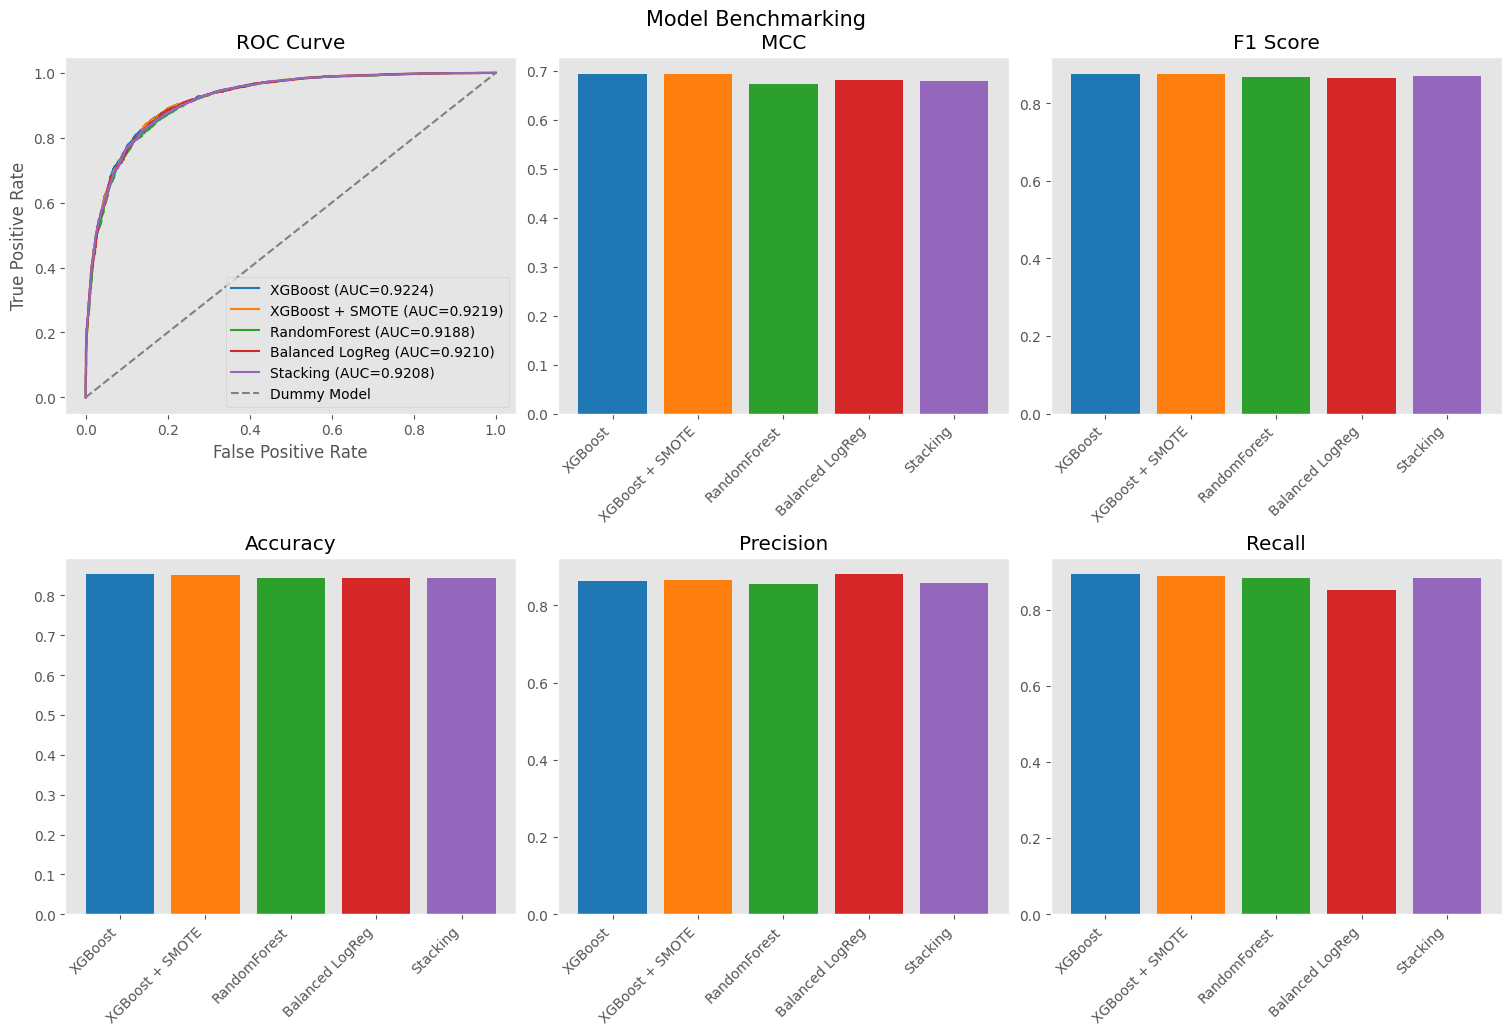

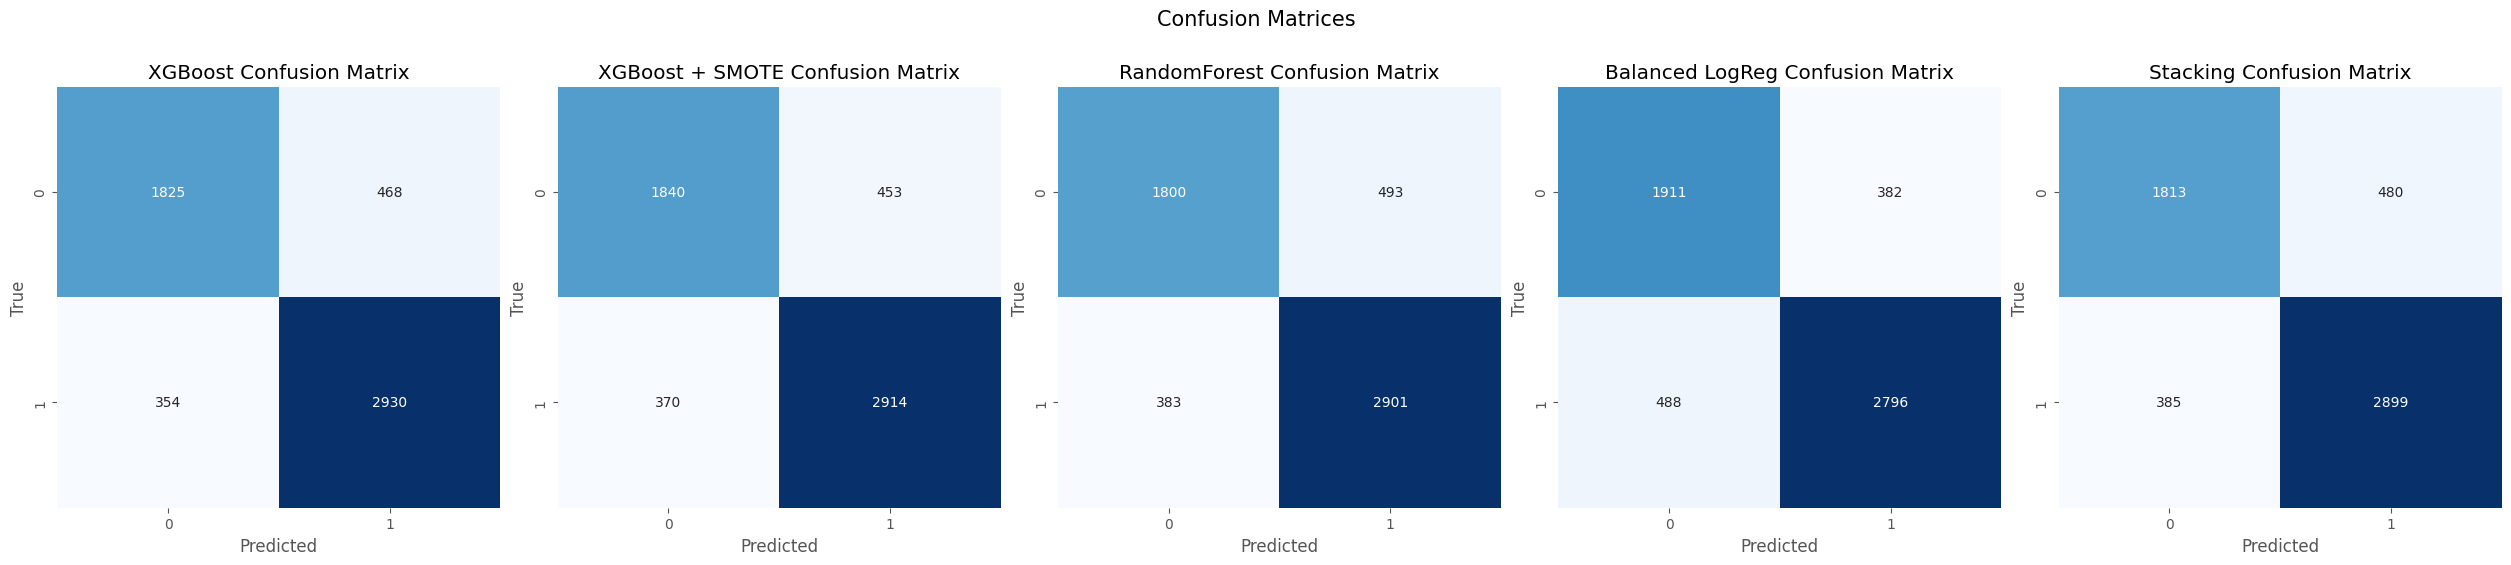

In [117]:
student_results = benchmark(pipelines_student, X_student_test, y_student_test)

Our models all perform exceptionally well, but XGBoost appears to be the best overall. The use of `SMOTE` with `XGBoost` helps balance FN and FP, which is why we have chosen it as our final student model.

In [201]:
def plot_classification_report(y_true: np.ndarray,
                               y_pred: np.ndarray,
                               title: str = "Classification Report") -> None:
    """
    Plots a 2x2 grid with MCC, F1-Score, Precision, and Recall for each class.

    :param y_true: Ground truth (true labels).
    :param y_pred: Predicted labels.
    """

    mcc = matthews_corrcoef(y_true, y_pred)
    f1_class_0 = f1_score(y_true, y_pred, pos_label=0)
    f1_class_1 = f1_score(y_true, y_pred, pos_label=1)
    precision_class_0 = precision_score(y_true, y_pred, pos_label=0)
    precision_class_1 = precision_score(y_true, y_pred, pos_label=1)
    recall_class_0 = recall_score(y_true, y_pred, pos_label=0)
    recall_class_1 = recall_score(y_true, y_pred, pos_label=1)

    fig, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)

    axes[0, 0].bar(['MCC'], [mcc])
    axes[0, 0].set_title("MCC")
    axes[0, 0].set_ylim(0, 1)

    axes[0, 1].bar(['0', '1'], [f1_class_0, f1_class_1])
    axes[0, 1].set_title("F1-Score")
    axes[0, 1].set_ylim(0, 1)

    axes[1, 0].bar(['0', '1'], [precision_class_0, precision_class_1])
    axes[1, 0].set_title("Precision")
    axes[1, 0].set_ylim(0, 1)

    axes[1, 1].bar(['0', '1'], [recall_class_0, recall_class_1])
    axes[1, 1].set_title("Recall")
    axes[1, 1].set_ylim(0, 1)

    plt.suptitle(title, y=1.05, size=12)
    plt.show()

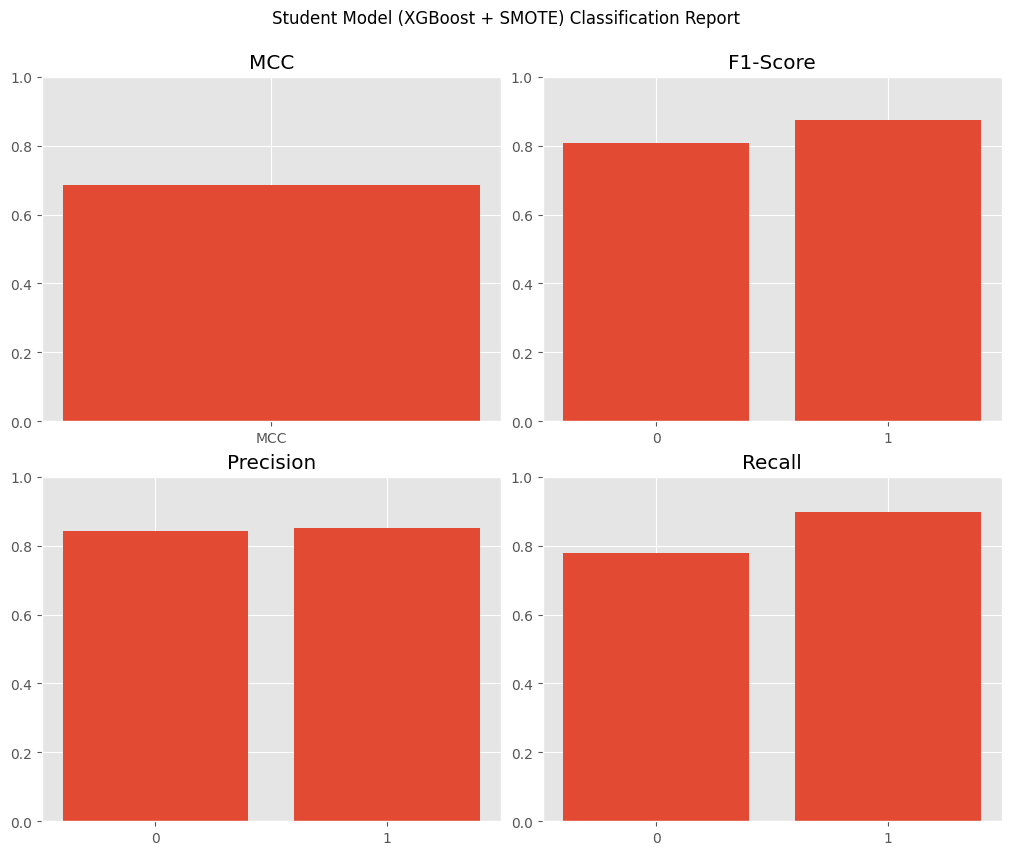

In [207]:
plot_classification_report(y_student_test, pipelines[1][1].predict(X_student_test), title="Student Model (XGBoost + SMOTE) Classification Report")

As we can see, the model performs better on the majority class but does not neglect the minority class.

<a id="working-professional-data-pipeline"></a>
## **3. Working Professional Pipeline**
---

We will now reproduce these same steps for $ (X, y)_{\text{pro}} $.


<a id="comprehensive-dataset-cleaning-and-analysis"></a>
### **3.1 Pro Dataset Analysis and Refinement**

<a id="feature-exploration-and-refinement"></a>
#### **3.1.1 Feature Engineering**

In [118]:
skim(data_professional)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 112799 │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 18     │ │ float64     │ 8     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA      ┃ NA %   ┃ mean     ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Age                  │       0 │      0 │    43.99 │  10.95 │   18 │    38 │    46 │    53 │   60 │ ▂▂▅▆▇▇ │  │
│ │ Academic Pressure    │  112794 │    100 │      3.4 │ 0.8944 │    2 │     3 │     4 │     4 │    4 │ ▃  ▃ ▇ │  │
│ │ Work Pressure        │      20 │   0.02 │    2.999 │  1.406 │    1 │     2 │     3 │     4 │    5 │ ▇▇ ▇▇▇ │  │
│ │ CGPA                 │  112793 │  99.99 │    7.945 │  1.392 │ 5.42 │ 8.057 │ 8.125 │ 8.215 │ 9.72 │ ▂  ▇ ▂ │  │
│ │ Study Satisfaction   │  112793 │  99.99 │    3.167 │  1.169 │    2 │  2.25 │     3 │  3.75 │    5 │ ▇ ▇ ▃▃ │  │
│ │ Job Satisfaction     │      17 │   0.02 │    2.974 │  1.416 │    1 │     2 │     3 │     4 │    5 │ ▇▇ ▇▇▇ │  │
│ │ Work/Study Hours     │       0 │      0 │    6.029 │  3.856 │    0 │     3 │     6 │     9 │   12 │ ▅▅▅▅▅▇ │  │
│ │ Financial Stress     │       1 │      0 │    2.952 │  1.405 │    1 │     2 │     3 │     4 │    5 │ ▇▇ ▆▇▇ │  │
│ │ Depression           │       0 │      0 │  0.08184 │ 0.2741 │    0 │     0 │     0 │     0 │    1 │ ▇    ▁ │  │
│ └──────────────────────┴─────────┴────────┴──────────┴────────┴──────┴───────┴───────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA        ┃ NA %     ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                              │         0 │        0 │                       1 │              112799 │  │
│ │ City                                │         0 │        0 │                       1 │              112799 │  │
│ │ Working Professional or Student     │         0 │        0 │                       2 │              225598 │  │
│ │ Profession                          │      8763 │     7.77 │                     1.3 │              144031 │  │
│ │ Sleep Duration                      │         0 │        0 │                       3 │              339897 │  │
│ │ Dietary Habits                      │         2 │        0 │                       1 │              112800 │  │
│ │ Degree                              │         2 │        0 │                     1.1 │              121459 │  │
│ │ Have you ever had suicidal thoughts │         0 │   

We observe that there are still NaN in the `Profession` column even after splitting the dataset. Therefore, we will focus on addressing these missing values.

In [119]:
data_professional = data_professional.drop(["Working Professional or Student", "Academic Pressure", "CGPA", "Study Satisfaction"], axis=1)

In [120]:
TOTAL_NA_OVER_AXIS_0_PRO = data_professional.isna().sum(axis=0)

print(f'Proportion of missing values in the student dataset: {TOTAL_NA_OVER_AXIS_0_PRO.sum() / data_professional.shape[0]:5f}')

Proportion of missing values in the student dataset: 0.078059


In [121]:
print(TOTAL_NA_OVER_AXIS_0_PRO[TOTAL_NA_OVER_AXIS_0_PRO > 0])

Profession          8763
Work Pressure         20
Job Satisfaction      17
Dietary Habits         2
Degree                 2
Financial Stress       1
dtype: int64


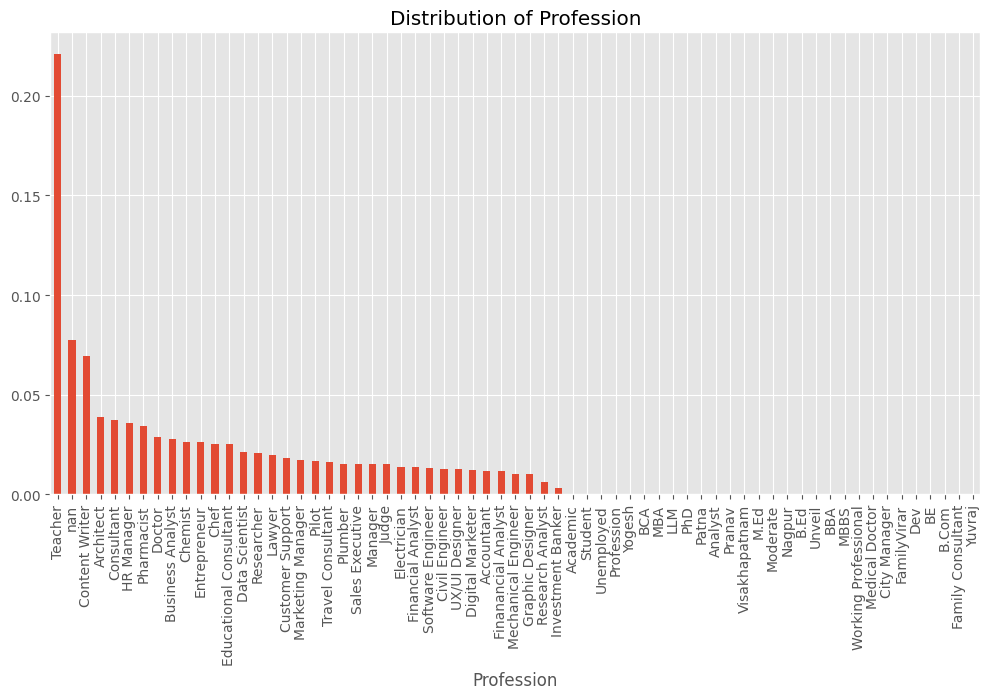

In [122]:
data_professional["Profession"].value_counts(normalize=True, dropna=False).plot(kind='bar', figsize=(12, 6))
plt.title("Distribution of Profession")
plt.show()

As we can see here, the NaN values in the `Profession` column essentially form a distinct category. This leaves us with two potential approaches:

1. Treat them as anomalies caused by an issue in the ETL process and handle them using an `Imputer`.
2. Assume they were intentionally assigned and treat them as a separate category.

Given the overall quality of the dataset, we lean toward the second hypothesis.  
(While we could compare the performance of these two approaches, we will proceed without doing so for simplicity)

In [123]:
data_professional["Profession"] = data_professional["Profession"].fillna("No job")

In [124]:
data_professional = data_professional.dropna()

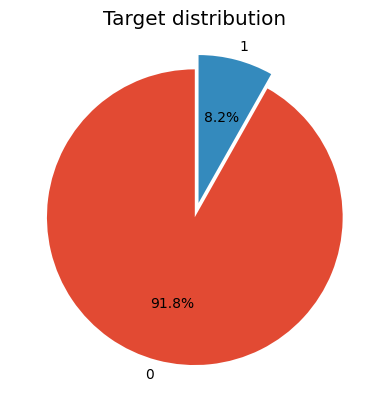

In [125]:
plot_target_distribution(data_professional, TARGET_COL)

We observe that the class imbalance is much more pronounced for professionals compared to students.  

This is the main reason why, in this notebook, we will not focus on accuracy as the primary metric, despite it being the competition's chosen metric.

In [126]:
X_professional = data_professional.drop(TARGET_COL, axis=1)
y_professional = data_professional[TARGET_COL]

X_professional_cleaned = clean_sleep_diet(X_professional)

X_professional_train, X_professional_test, y_professional_train, y_professional_test = train_test_split(
    X_professional_cleaned, y_professional, test_size=0.2, random_state=42, stratify=y_professional
)

X_professional_train = X_professional_train.reset_index(drop=True)
X_professional_test = X_professional_test.reset_index(drop=True)
y_professional_train = y_professional_train.reset_index(drop=True)
y_professional_test = y_professional_test.reset_index(drop=True)

  0%|          | 0/112769 [00:00<?, ?it/s]

  0%|          | 0/112769 [00:00<?, ?it/s]

In [127]:
X_professional_train.head()

Gender   Age       City         Profession  Work Pressure  \
0    Male  49.0  Ahmedabad             No job            4.0   
1  Female  55.0    Chennai  Software Engineer            1.0   
2    Male  59.0  Bangalore            Teacher            5.0   
3  Female  35.0     Indore         HR Manager            4.0   
4  Female  34.0     Kanpur            Teacher            3.0   

   Job Satisfaction  Sleep Duration  Dietary Habits    Degree  \
0               5.0               3               0  Class 12   
1               3.0               0               1       MSc   
2               3.0               0               2       BSc   
3               2.0               0               1        ME   
4               1.0               0               0   M.Pharm   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                   Yes               2.0               1.0   
1                                   Yes              12.0               3.0   
2                                    No               5.0               2.0   
3                                   Yes               3.0               5.0   
4                                    No              11.0               2.0   

  Family History of Mental Illness  
0                               No  
1                               No  
2                               No  
3                              Yes  
4                               No

<a id="dimensionality-reduction-and-correlation-analysis"></a>
#### **3.1.2 Pattern Visualization**

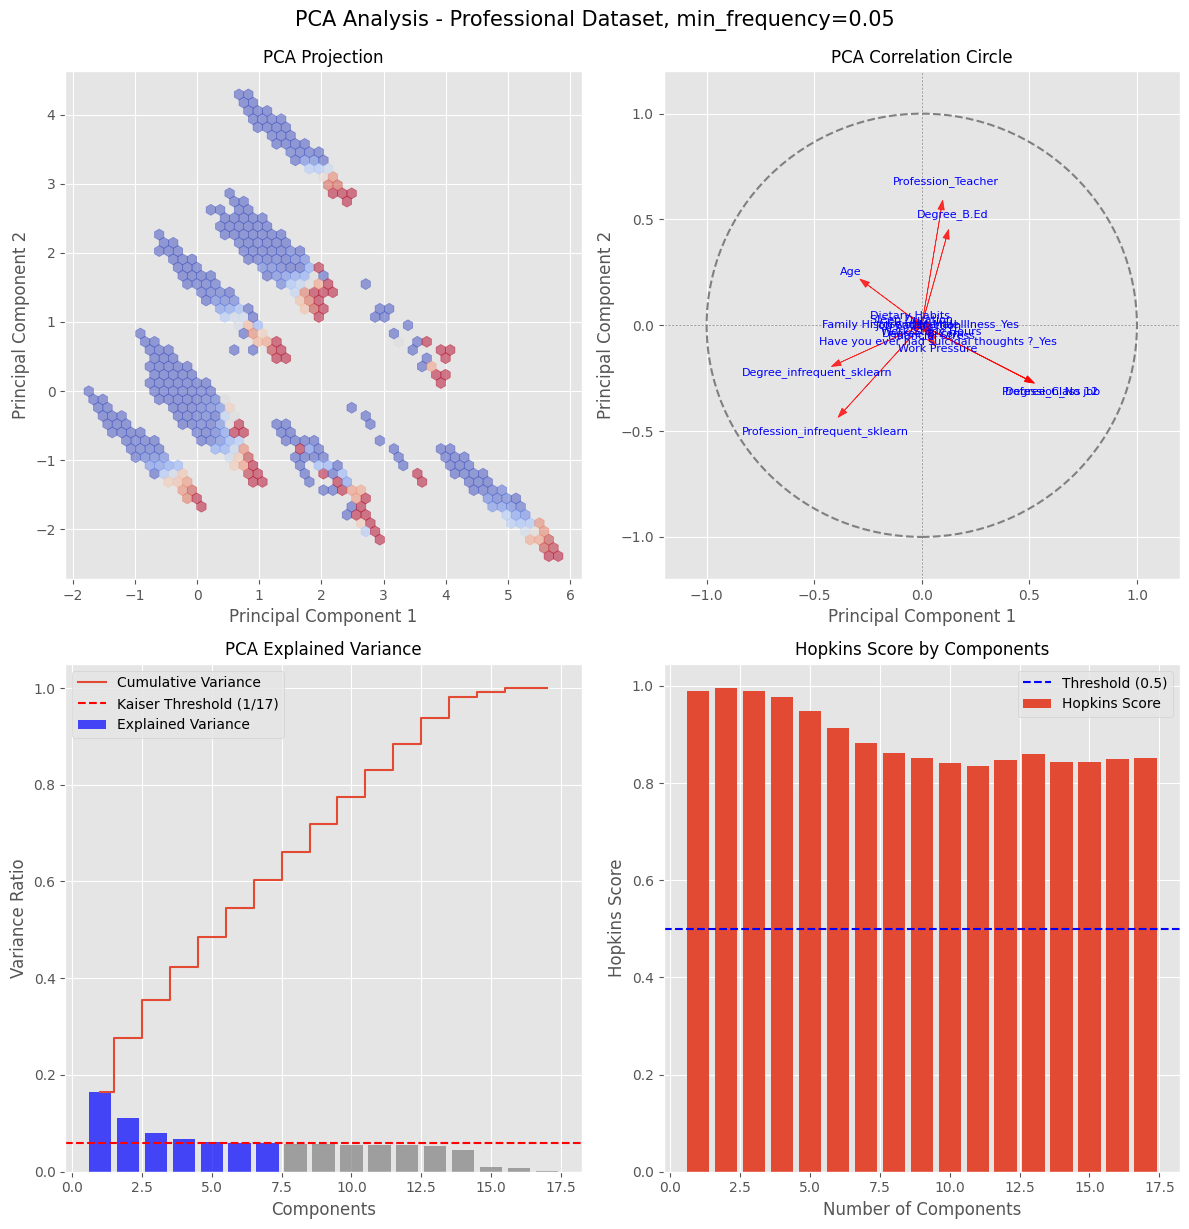

In [128]:
plot_pca_analysis(X_professional_train, y_professional_train, min_frequency=0.05, title="PCA Analysis - Professional Dataset, min_frequency=0.05")

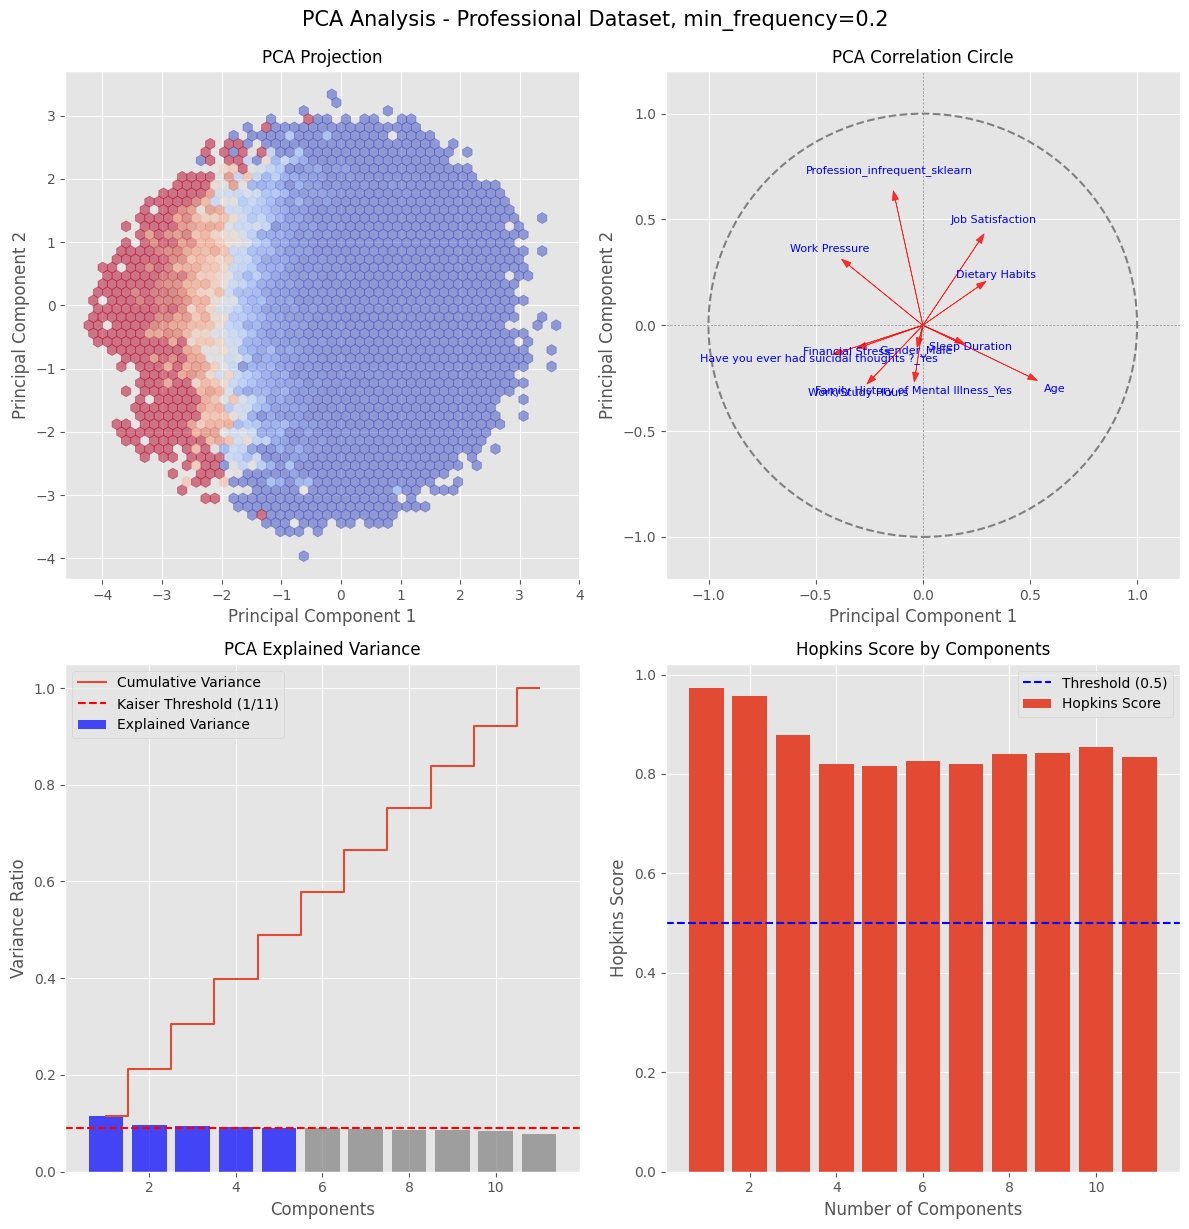

In [129]:
plot_pca_analysis(X_professional_train, y_professional_train, min_frequency=0.2, title="PCA Analysis - Professional Dataset, min_frequency=0.2")

Now that we have observed for students that using a higher `min_frequency` yields better results, we can experiment with this parameter in our visualizations. 

As shown here, when `min_frequency` is set to 0.2, we observe two distinguishable clusters with different colors.  
In contrast, at 0.05, we see several overlapping clusters containing both red and blue. 

This could indicate that more dimensions are required to create a clear decision boundary when `min_frequency` is low.

In the correlation circle, we observe many features pointing in different directions.  
This is a positive finding as it indicates that several features are uncorrelated, thus providing more independent information.

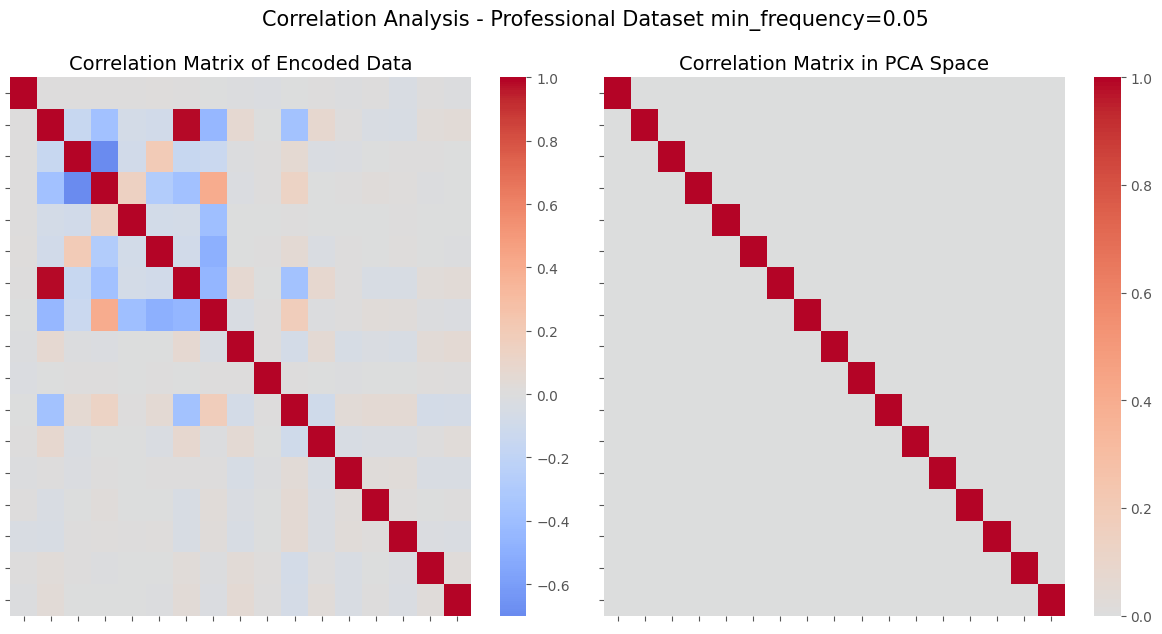

In [130]:
plot_correlation_analysis(X_professional_train, title="Correlation Analysis - Professional Dataset min_frequency=0.05")

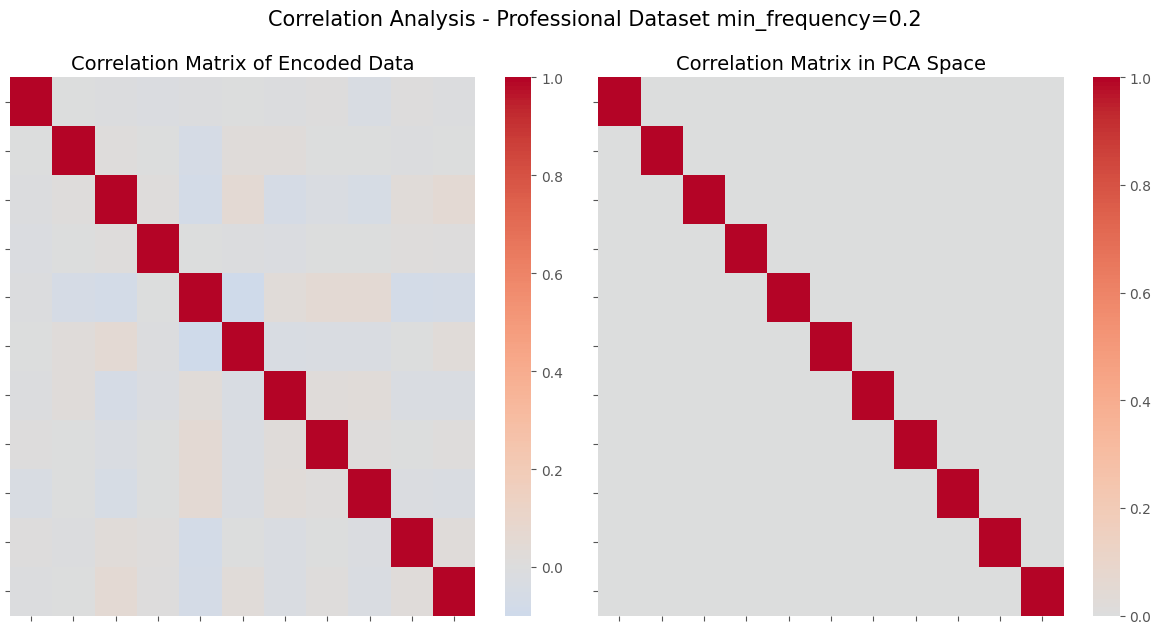

In [131]:
plot_correlation_analysis(X_professional_train, title="Correlation Analysis - Professional Dataset min_frequency=0.2", min_frequency=0.2)

We observe significantly more correlations between features when the `min_frequency` parameter is set to 0.05.  
However, these correlations can still be mitigated or eliminated through the application of `PCA`.

<a id="model-development-and-optimization-1"></a>
### **3.2 Model Development and Optimization**

Computing Learning Curves:   0%|          | 0/4 [00:00<?, ?it/s]

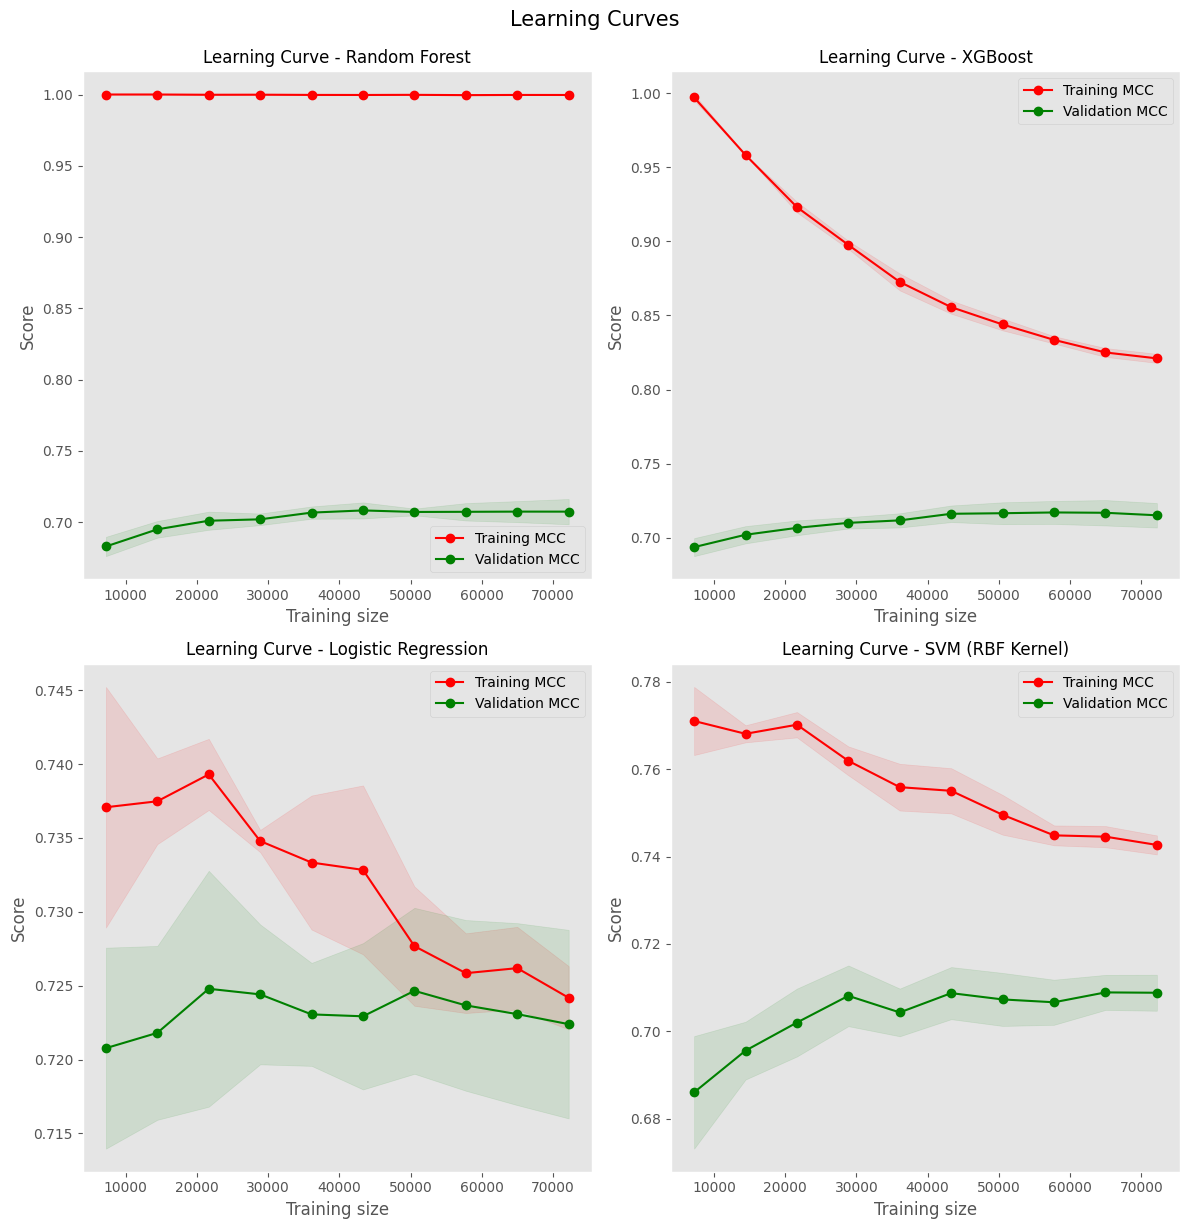

In [132]:
plot_learning_curves(X_professional_train, y_professional_train)

The learning curves exhibit similar trends to those observed with $(X_{\text{train}}, y_{\text{train}})_{\text{student}}$, but the MCC scores appear to be higher overall.

<a id="advanced-hyperparameter-search-with-non-gradient-methods-1"></a>
#### **3.2.1 Advanced Hyperparameter Search with Free-Gradient Methods**

In [133]:
logistic_regression_study_pro = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
logistic_regression_study_pro.optimize(lambda trial: optimize_logistic_regression_with_optuna(trial, X_professional_train, y_professional_train),
                                   n_trials=200, show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [134]:
print(f"Best parameters for Logistic Regression : {logistic_regression_study_pro.best_params} with MCC: {logistic_regression_study_pro.best_value:.4f}")

Best parameters for Logistic Regression : {'min_frequency': 0.31673898316496946, 'n_components': 10, 'C': 1978.3093484943233} with MCC: 0.7222


In [135]:
balanced_logistic_regression_study_pro = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
balanced_logistic_regression_study_pro.optimize(lambda trial: optimize_logistic_regression_with_optuna(trial, X_professional_train, y_professional_train, balanced=True),
                                            n_trials=200, show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [136]:
print(f"Best parameters for Balanced Logistic Regression: {balanced_logistic_regression_study_pro.best_params} with MCC: {balanced_logistic_regression_study_pro.best_value:.4f}")

Best parameters for Balanced Logistic Regression: {'min_frequency': 0.44640819385850966, 'n_components': 10, 'C': 0.003105736458571698} with MCC: 0.6199


<a id="addressing-class-imbalance-1"></a>
#### **3.2.2 Addressing Class Imbalance**

In [137]:
logistic_regression_smote_study_pro = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
logistic_regression_smote_study_pro.optimize(lambda trial: optimize_logistic_regression_with_optuna(trial, X_professional_train, y_professional_train, oversampling=True),
                                         n_trials=200, show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [138]:
print(f"Best parameters for Logistic Regression with SMOTE: {logistic_regression_smote_study_pro.best_params} with MCC: {logistic_regression_smote_study_pro.best_value:.4f}")

Best parameters for Logistic Regression with SMOTE: {'min_frequency': 0.12574613463660628, 'n_components': 10, 'C': 0.002078506494655379, 'k_neighbors': 14} with MCC: 0.6322


In [139]:
logistic_regression_nnus_study_pro = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
logistic_regression_nnus_study_pro.optimize(lambda trial: optimize_nuns_with_optuna(trial, X_professional_train, y_professional_train, pilot_model=LogisticRegression(), final_model=LogisticRegression()),
               n_trials=200, show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [140]:
print(f"Best parameters for NUNS Classifier: {logistic_regression_nnus_study_pro.best_params} with MCC: {logistic_regression_nnus_study_pro.best_value:.4f}")

Best parameters for NUNS Classifier: {'sampling_rate': 0.2772524895444932, 'min_frequency': 0.3715200026288581, 'n_components': 10, 'pilot_model__C': 9.605071799326762, 'final_model__C': 42326.68931403375} with MCC: 0.7322


<a id="comparative-evaluation-of-logistic-regression-methods-1"></a>
#### **3.2.3 Benchmark of Logistic Regression Methods**

In [141]:
logistic_regression_imbalanced_pipeline_pro = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=logistic_regression_study_pro.best_params['min_frequency']),
         X_professional_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    ),
    StandardScaler(),
    PCA(),
    LogisticRegression(C=logistic_regression_study_pro.best_params['C'])
)

logistic_regression_balanced_pipeline_pro = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=balanced_logistic_regression_study_pro.best_params['min_frequency']),
         X_professional_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    ),
    StandardScaler(),
    PCA(),
    LogisticRegression(class_weight='balanced', C=balanced_logistic_regression_study_pro.best_params['C'])
)

logistic_regression_smote_pipeline_pro = ImbPipeline([
    ('columntransformer', make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=logistic_regression_smote_study_pro.best_params['min_frequency']),
         X_professional_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    )),
    ('smote', SMOTE(k_neighbors=logistic_regression_smote_study_pro.best_params['k_neighbors'])),
    ('pca', PCA(n_components=logistic_regression_smote_study_pro.best_params['n_components'])),
    ('logisticregression', LogisticRegression(C=logistic_regression_smote_study_pro.best_params['C']))
])

pilot_pipeline_pro = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=logistic_regression_nnus_study_pro.best_params['min_frequency']),
         X_professional_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    ),
    StandardScaler(),
    PCA(n_components=logistic_regression_nnus_study_pro.best_params['n_components']),
    LogisticRegression(C=logistic_regression_nnus_study_pro.best_params['final_model__C'])
)

final_pipeline_pro = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=logistic_regression_nnus_study_pro.best_params['min_frequency']),
         X_professional_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    ),
    StandardScaler(),
    PCA(n_components=logistic_regression_nnus_study_pro.best_params['n_components']),
    LogisticRegression(C=logistic_regression_nnus_study_pro.best_params['final_model__C'])
)

nuns_pipeline_pro = NUNSClassifier(
    pilot_model=pilot_pipeline_pro,
    final_model=final_pipeline_pro,
    sampling_rate=logistic_regression_nnus_study_pro.best_params['sampling_rate'],
    final_model_name_if_pipeline="logisticregression"
    )

In [142]:
pipelines_pro = [
    ("Balanced LogReg", logistic_regression_balanced_pipeline_pro),
    ("Imbalanced LogReg", logistic_regression_imbalanced_pipeline_pro),
    ("LogReg + SMOTE", logistic_regression_smote_pipeline_pro),
    ("LogReg NUNS", nuns_pipeline_pro)
]

for pipe in pipelines_pro:
    pipe[1].fit(X_professional_train, y_professional_train)

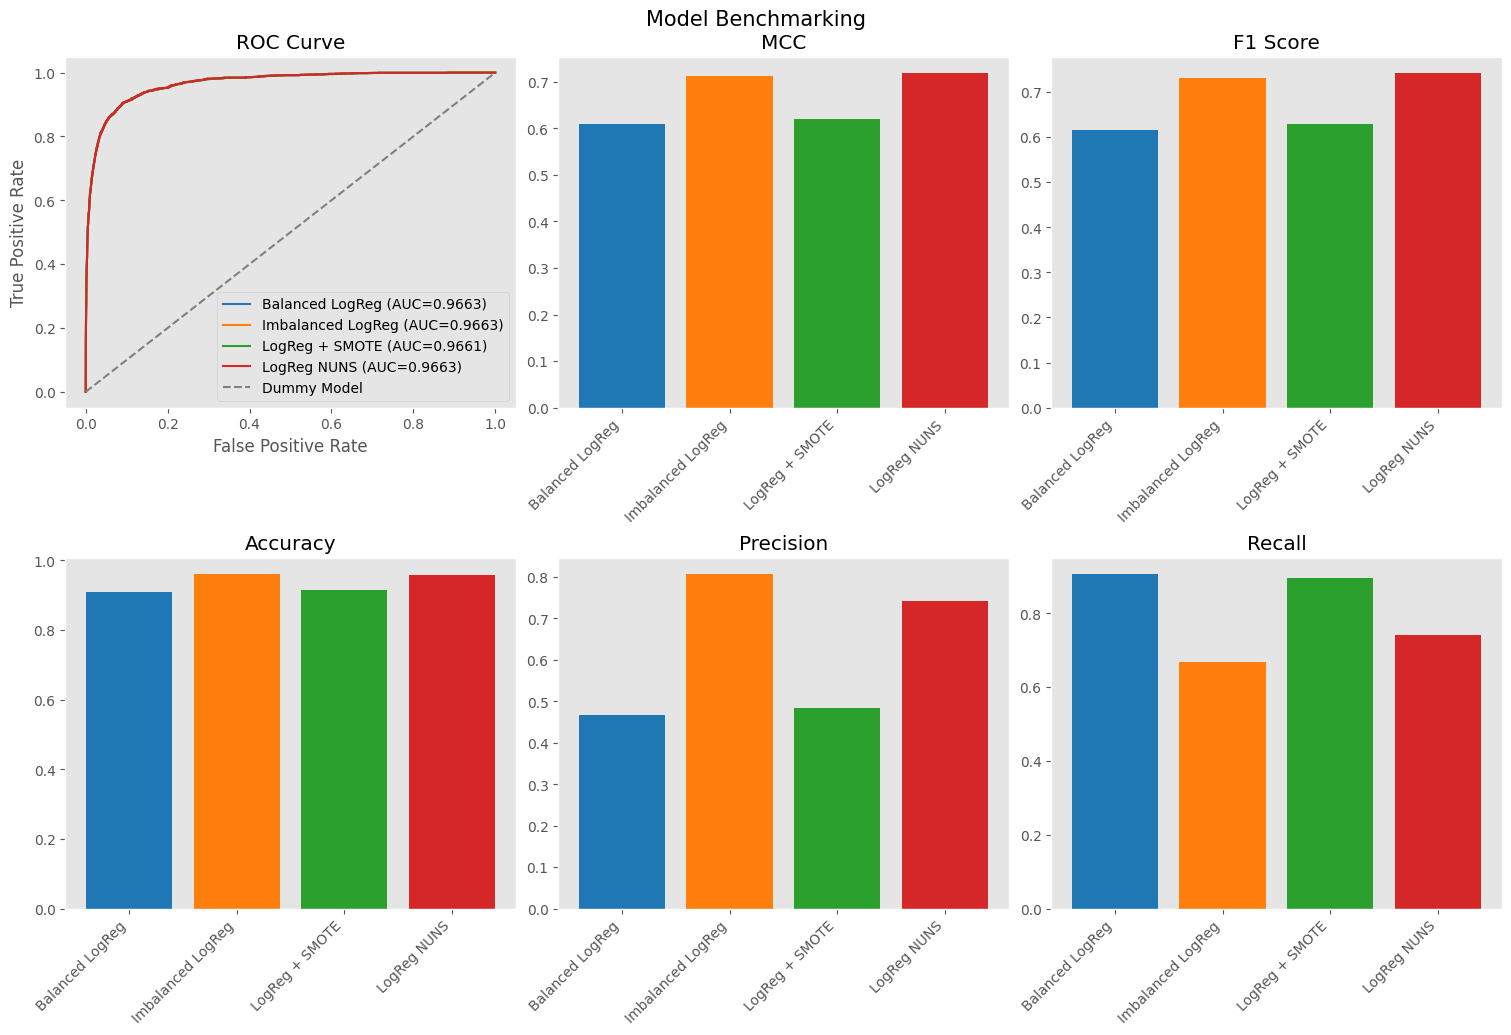

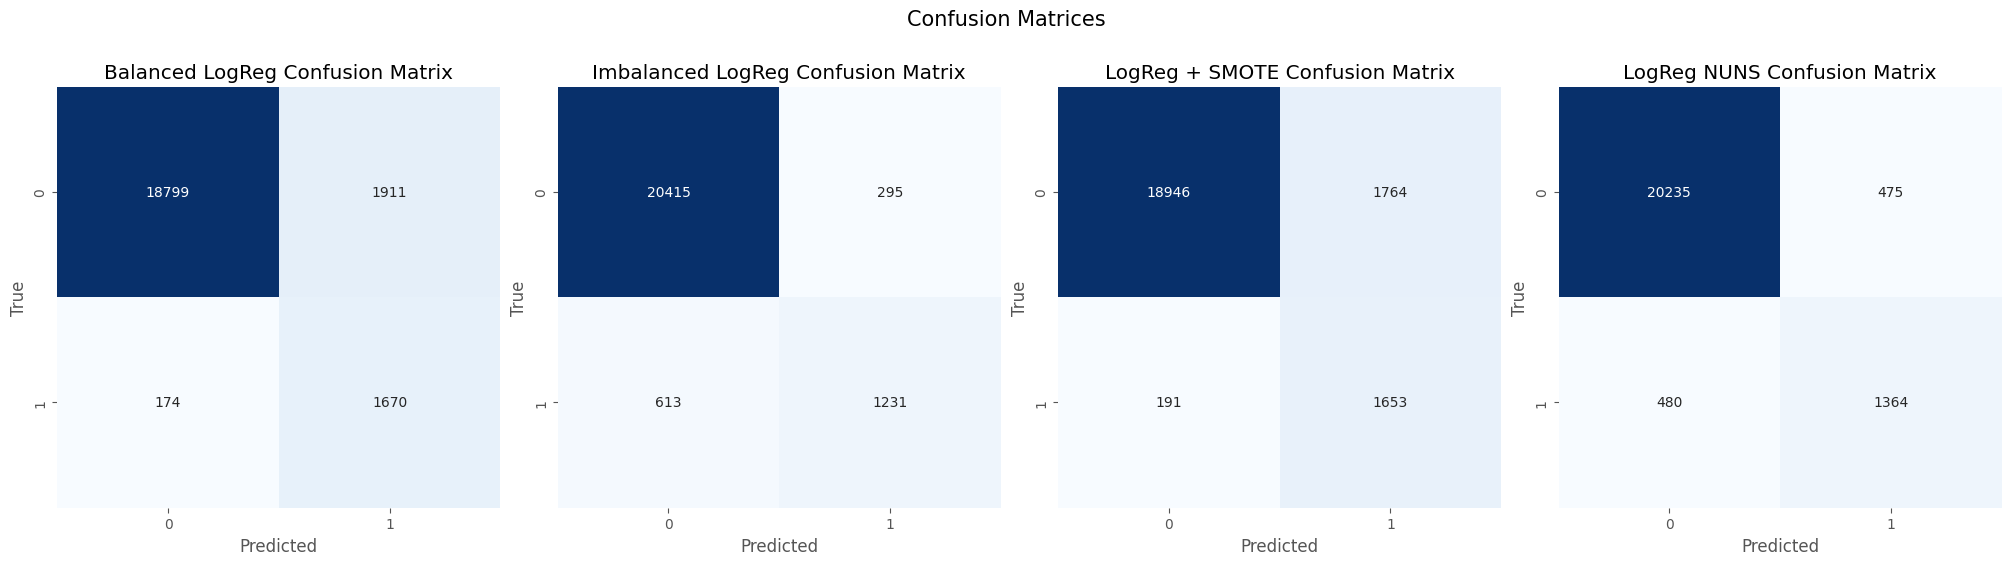

In [143]:
pro_results = benchmark(pipelines_pro, X_professional_test, y_professional_test)

The confusion matrices are less diagonal due to the significant class imbalance. `SMOTE` does not perform well in this scenario, which was expected.  
However, TikTok's algorithm demonstrates excellent performance here, as it significantly reduces the number FN.

<a id="ensemble-learning-and-model-stacking-1"></a>
#### **3.2.4 Ensemble Learning**

In [144]:
xgbc_study_pro = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
xgbc_study_pro.optimize(lambda trial: optimize_ensemble_with_optuna(trial, X_professional_train, y_professional_train, model_type='XGBoost'),
                           n_trials=200, show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [145]:
print(f"Best parameters for XGBoost: {xgbc_study_pro.best_params} with MCC: {xgbc_study_pro.best_value:.4f}")

Best parameters for XGBoost: {'min_frequency': 0.010179103036541962, 'n_estimators': 202, 'max_depth': 4, 'learning_rate': 0.1354721708490058, 'subsample': 0.9028057925481112, 'colsample_bytree': 0.5151112542198532} with MCC: 0.7384


In [146]:
rf_study_pro = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
rf_study_pro.optimize(lambda trial: optimize_ensemble_with_optuna(trial, X_professional_train, y_professional_train, model_type='RandomForest'),
                            n_trials=200, show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [147]:
print(f"Best parameters for RandomForest: {rf_study_pro.best_params} with MCC: {rf_study_pro.best_value:.4f}")

Best parameters for RandomForest: {'min_frequency': 0.28254953951805467, 'n_estimators': 151, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 1} with MCC: 0.7199


In [148]:
stacking_study_pro = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
stacking_study_pro.optimize(lambda trial: optimize_ensemble_with_optuna(trial, X_professional_train, y_professional_train, model_type='Stacking'),
                                n_trials=50, show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [149]:
print(f"Best parameters for Stacking: {stacking_study_pro.best_params} with MCC: {stacking_study_pro.best_value:.4f}")

Best parameters for Stacking: {'min_frequency': 0.010256952464308609, 'rf__n_estimators': 289, 'rf__max_depth': 20, 'rf__min_samples_split': 6, 'rf__min_samples_leaf': 5, 'xgb__n_estimators': 164, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.15199553233314403, 'xgb__subsample': 0.6393158398792966, 'xgb__colsample_bytree': 0.6800039187313173} with MCC: 0.7263


<a id="professional-data-final-benchmark"></a>
#### **3.2.5 Professional Dataset Final Benchmark**

In [150]:
xgb_student_pipeline_pro = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=xgbc_study_pro.best_params['min_frequency']),
         X_professional_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    ),
    XGBClassifier(
        n_estimators=xgbc_study_pro.best_params['n_estimators'],
        max_depth=xgbc_study_pro.best_params['max_depth'],
        learning_rate=xgbc_study_pro.best_params['learning_rate'],
        subsample=xgbc_study_pro.best_params['subsample'],
        colsample_bytree=xgbc_study_pro.best_params['colsample_bytree'],
        use_label_encoder=False,
        eval_metric='logloss'
    )
)

rf_student_pipeline_pro = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=rf_study_pro.best_params['min_frequency']),
         X_professional_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    ),
    RandomForestClassifier(
        n_estimators=rf_study_pro.best_params['n_estimators'],
        max_depth=rf_study_pro.best_params['max_depth'],
        min_samples_split=rf_study_pro.best_params['min_samples_split'],
        min_samples_leaf=rf_study_pro.best_params['min_samples_leaf'],
        random_state=42
    )
)

stacking_student_pipeline_pro = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=stacking_study_pro.best_params['min_frequency']),
         X_professional_train.select_dtypes(include='object').columns),
        remainder='passthrough',
        sparse_threshold=0
    ),
    StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(
                n_estimators=stacking_study_pro.best_params['rf__n_estimators'],
                max_depth=stacking_study_pro.best_params['rf__max_depth'],
                min_samples_split=stacking_study_pro.best_params['rf__min_samples_split'],
                min_samples_leaf=stacking_study_pro.best_params['rf__min_samples_leaf'],
                random_state=42
            )),
            ('xgb', XGBClassifier(
                n_estimators=stacking_study_pro.best_params['xgb__n_estimators'],
                max_depth=stacking_study_pro.best_params['xgb__max_depth'],
                learning_rate=stacking_study_pro.best_params['xgb__learning_rate'],
                subsample=stacking_study_pro.best_params['xgb__subsample'],
                colsample_bytree=stacking_study_pro.best_params['xgb__colsample_bytree'],
                use_label_encoder=False,
                eval_metric='logloss',
                random_state=42
            ))
        ],
        final_estimator=LogisticRegression()
    )
)  

In [151]:
pipelines_pro_final = [
    ("LogReg NUNS", nuns_pipeline_pro),
    ("XGBoost", xgb_student_pipeline_pro),
    ("RandomForest", rf_student_pipeline_pro),
    ("Stacking", stacking_student_pipeline_pro),
]

for pipe in pipelines_pro_final:
    pipe[1].fit(X_professional_train, y_professional_train)

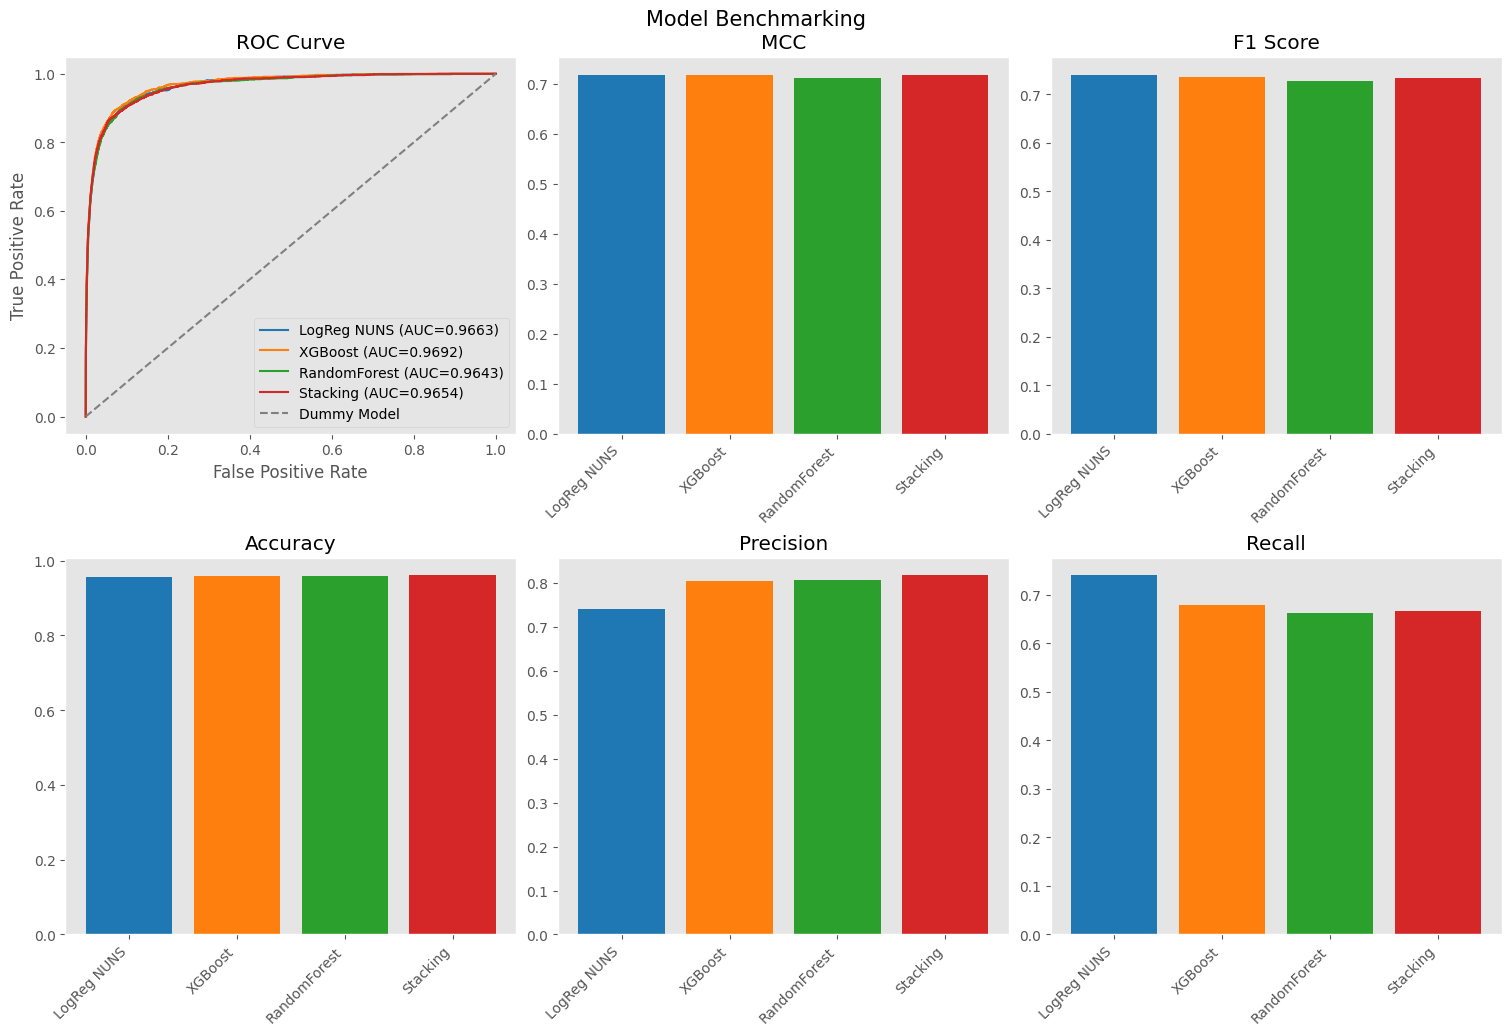

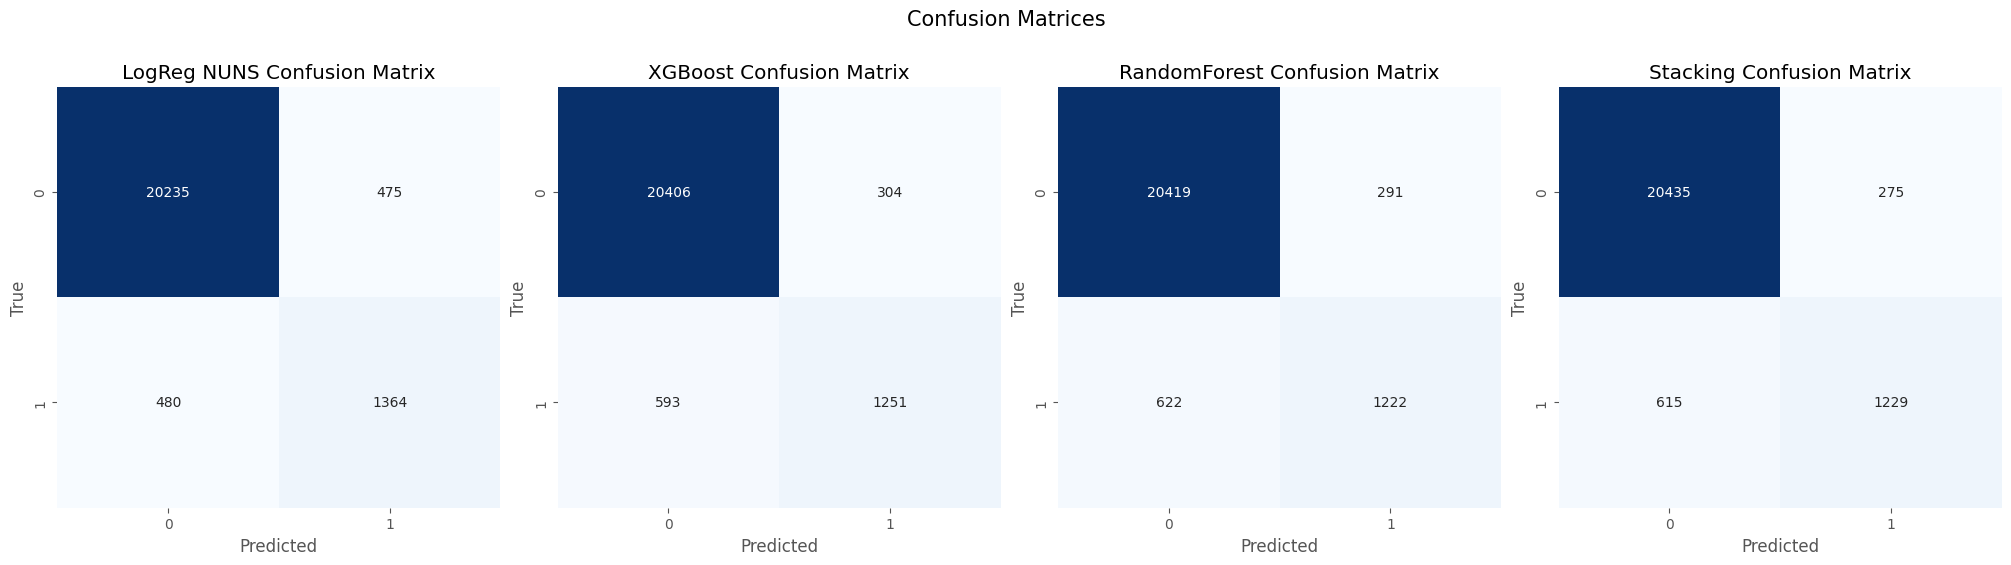

In [152]:
pro_results_final = benchmark(pipelines_pro_final, X_professional_test, y_professional_test)

`LogReg NUNS` even outperforms the Ensemble Learning algorithms, making it the best choice for predicting outcomes in the professional dataset.

When we examine the accuracy, it is generally quite high compared to the student dataset. However, if we look at the F1-Score, it is significantly lower. This highlights the challenge of accurately predicting when $y = 1$, as this is the minority class. 

This extreme imbalance presents a prime example where accuracy can misleadingly suggest that the problem is easy, even though it is far from the truth.

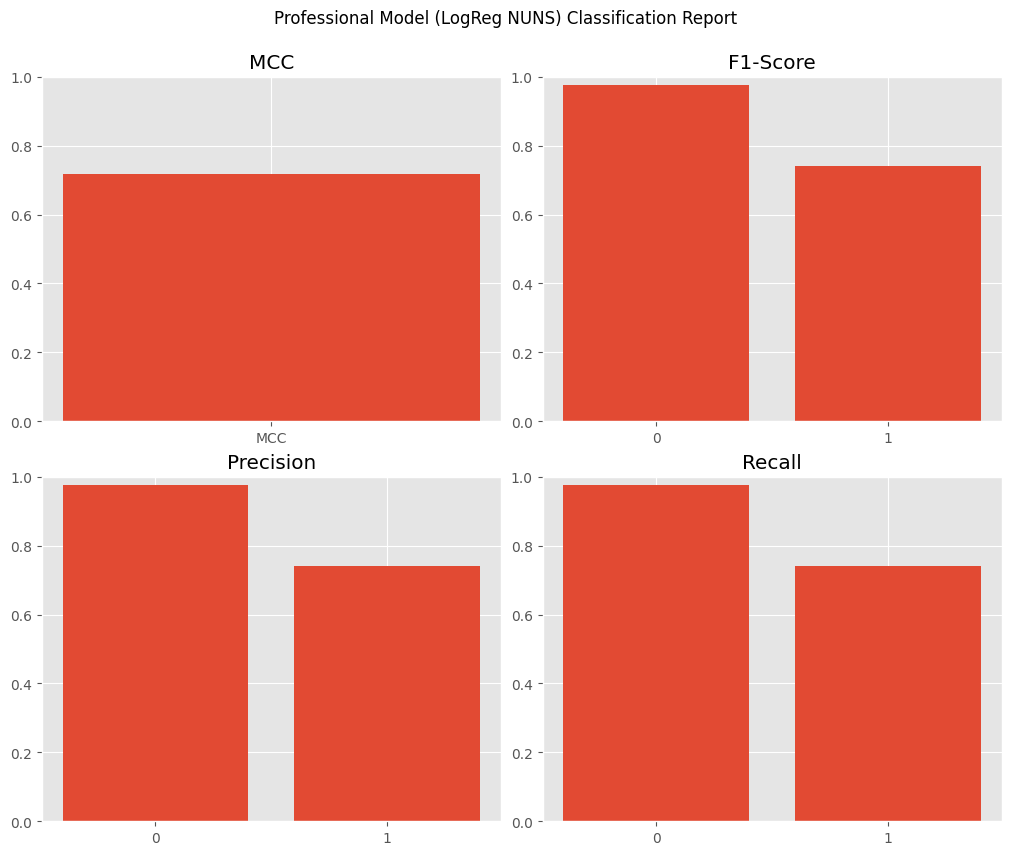

In [204]:
plot_classification_report(y_professional_test, pipelines_pro_final[0][1].predict(X_professional_test), title="Professional Model (LogReg NUNS) Classification Report")

Despite the imbalance, the model manages not to overly neglect the minority class. However, the results remain quite different between the two classes, highlighting the need for more samples of depressive professionals.

<a id="error-analysis-and-model-evaluation"></a>
## **4. Error Analysis and Model Evaluation**
---

<a id="loss-distribution-and-feature-analysis"></a>
### **4.1 Loss Distribution and Feature Analysis**

Now that our models are ready, we will build the final predictor, which will select the appropriate model based on whether the individual is a student or a professional.

Before deploying the predictor into production, we aim to identify if certain categories or bins exhibit error patterns.  
To achieve this, we will analyze the distribution of the BCE loss and the Weighted BCE loss across different categories and bins.

We will also evaluate the overall performance of our model on a global scale this time.

In [153]:
class Predictor(object):
    """
    A class to predict the target variable using the best models for students and professionals.
    """

    def __init__(self, 
                 student_model: Union[Pipeline, ImbPipeline], 
                 pro_model: Union[Pipeline, ImbPipeline]) -> None:
        """
        Initialize the Predictor class.

        :param student_model: The trained model for the student dataset.
        :param pro_model: The trained model for the professional dataset.
        """

        self.student_model = student_model
        self.pro_model = pro_model

    @staticmethod
    def __clean_sleep_diet(X: pd.DataFrame,
                           seed: int = 42) -> pd.DataFrame:
        """
        Clean the 'Sleep Duration' and 'Dietary Habits' columns.

        :param X: The dataframe to clean.
        :param seed: The random seed for reproducibility.
        :return: The cleaned dataframe.
        """

        np.random.seed(seed)
        X = X.copy()

        X['Sleep Duration'] = X['Sleep Duration'].apply(
            lambda value: (
                0 if value in ["Less than 5 hours", "2-3 hours", "3-4 hours", "4-5 hours", "No"]
                else 1 if value in ["5-6 hours", "6-7 hours", "4-6 hours"]
                else 2 if value in ["7-8 hours"]
                else 3 if value in ["8-9 hours", "More than 8 hours", "9-11 hours", "10-11 hours"]
                else np.random.choice([0, 1, 2, 3])
            )
        )

        X['Dietary Habits'] = X['Dietary Habits'].apply(
            lambda value: (
                0 if value in ["Unhealthy", "No Healthy", "No", "1", 1]
                else 1 if value in ["Moderate", "Less Healthy", "Less than Healthy", "2", 2]
                else 2 if value in ["Healthy", "More Healthy", "Yes", "3", 3]
                else np.random.choice([0, 1, 2])
            )
        )

        return X

    def __clean_data(self, 
                     data: pd.DataFrame, 
                     already_cleaned: bool, 
                     target_present: bool = False) -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        Clean the dataset based on its category (Student or Professional).

        :param data: The input dataset.
        :param already_cleaned: Indicates if the input dataset is already cleaned.
        :param target_present: Indicates if the target column is present in the dataset.
        :return: Cleaned datasets for students and professionals.
        """

        if not already_cleaned:
            data = data.drop(['id', 'Name'], axis=1)

        data_student = data[data['Working Professional or Student'] == 'Student']
        data_professional = data[data['Working Professional or Student'] == 'Working Professional']

        data_student = data_student.drop(['Working Professional or Student', 'Work Pressure', 'Job Satisfaction', 'Profession'], axis=1)
        if target_present:
            target_student = data_student['Depression']
            data_student = data_student.drop(['Depression'], axis=1)
        else:
            target_student = None
        data_student = self.__clean_sleep_diet(data_student)

        data_professional = data_professional.drop(["Working Professional or Student", "Academic Pressure", "CGPA", "Study Satisfaction"], axis=1)
        if target_present:
            target_professional = data_professional['Depression']
            data_professional = data_professional.drop(['Depression'], axis=1)
        else:
            target_professional = None
        data_professional["Profession"] = data_professional["Profession"].fillna("No job")
        data_professional = self.__clean_sleep_diet(data_professional)
        data_professional = data_professional.dropna()

        return (data_student, target_student), (data_professional, target_professional)

    def predict(self,
                data: pd.DataFrame,
                already_cleaned: bool = False) -> pd.DataFrame:
        """
        Predict the target variable for the input data.

        :param data: The input data (either raw or cleaned).
        :param already_cleaned: Indicates if the input dataset is already cleaned.
        :return: Dataframe with predictions, probabilities, and cleaned data.
        """

        target_present = 'Depression' in data.columns

        (student_data, student_target), (pro_data, pro_target) = self.__clean_data(data, already_cleaned, target_present)

        student_predictions = self.student_model.predict(student_data)
        student_probs = self.student_model.predict_proba(student_data)

        pro_predictions = self.pro_model.predict(pro_data)
        pro_probs = self.pro_model.predict_proba(pro_data)

        student_data['Prediction'] = student_predictions
        student_data['Probability_0'] = student_probs[:, 0]
        student_data['Probability_1'] = student_probs[:, 1]

        pro_data['Prediction'] = pro_predictions
        pro_data['Probability_0'] = pro_probs[:, 0]
        pro_data['Probability_1'] = pro_probs[:, 1]

        if target_present:
            student_data['Depression'] = student_target
            pro_data['Depression'] = pro_target

        student_data['Working Professional or Student'] = 'Student'
        pro_data['Working Professional or Student'] = 'Working Professional'

        return pd.concat([student_data, pro_data], ignore_index=True)

In [154]:
pro_model = pipelines_pro_final[0][1]
student_model = pipelines_student[1][1]

predictor = Predictor(student_model, pro_model)

In [155]:
X_student_test["Working Professional or Student"] = "Student"
X_professional_test["Working Professional or Student"] = "Working Professional"

X_test = pd.concat([X_student_test, X_professional_test])
y_test = pd.concat([y_student_test, y_professional_test])

X_test["Depression"] = y_test

In [156]:
final_results = predictor.predict(X_test, already_cleaned=True)

In [157]:
final_results.head()

Gender   Age       City  Academic Pressure  CGPA  Study Satisfaction  \
0    Male  20.0     Meerut                1.0  7.53                 4.0   
1    Male  33.0     Bhopal                2.0  8.74                 1.0   
2    Male  23.0     Nagpur                5.0  9.93                 2.0   
3  Female  25.0  Hyderabad                3.0  9.96                 3.0   
4    Male  27.0       Agra                3.0  9.44                 4.0   

   Sleep Duration  Dietary Habits    Degree  \
0               2               2  Class 12   
1               3               0        MA   
2               0               0       BCA   
3               2               1       MCA   
4               2               1    B.Tech   

  Have you ever had suicidal thoughts ?  ...  Financial Stress  \
0                                    No  ...               5.0   
1                                   Yes  ...               1.0   
2                                   Yes  ...               2.0   
3                                   Yes  ...               4.0   
4                                   Yes  ...               5.0   

   Family History of Mental Illness Prediction  Probability_0  Probability_1  \
0                                No          0       0.878677       0.121323   
1                                No          0       0.596009       0.403991   
2                                No          1       0.053251       0.946749   
3                                No          1       0.090616       0.909384   
4                               Yes          1       0.070673       0.929327   

   Depression  Working Professional or Student Profession Work Pressure  \
0           0                          Student        NaN           NaN   
1           0                          Student        NaN           NaN   
2           1                          Student        NaN           NaN   
3           1                          Student        NaN           NaN   
4           1                          Student        NaN           NaN   

   Job Satisfaction  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 21 columns]

In [158]:
print(classification_report(final_results["Depression"], final_results["Prediction"]))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     23003
           1       0.80      0.82      0.81      5128

    accuracy                           0.93     28131
   macro avg       0.88      0.89      0.88     28131
weighted avg       0.93      0.93      0.93     28131



Naturally, it is much more challenging to predict the positive minority class due to the significantly smaller number of samples available.

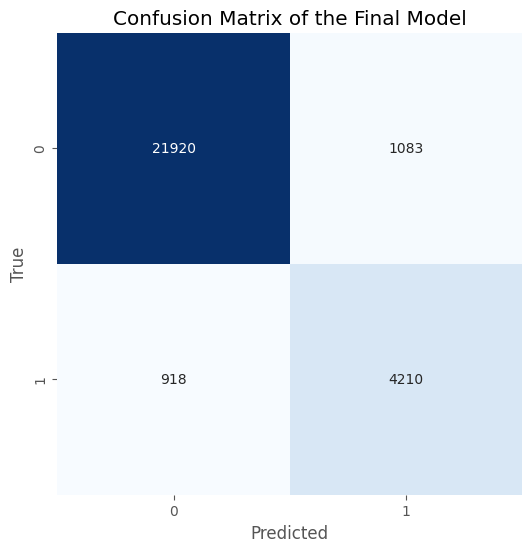

In [159]:
cm = confusion_matrix(final_results["Depression"], final_results["Prediction"])

fig, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_title('Confusion Matrix of the Final Model')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

plt.show()

The confusion matrix reveals a need for more samples from depressed individuals, particularly depressed professionals, as slightly less than 1/4 of the predictions on $X_{\text{test}}$ were incorrect.

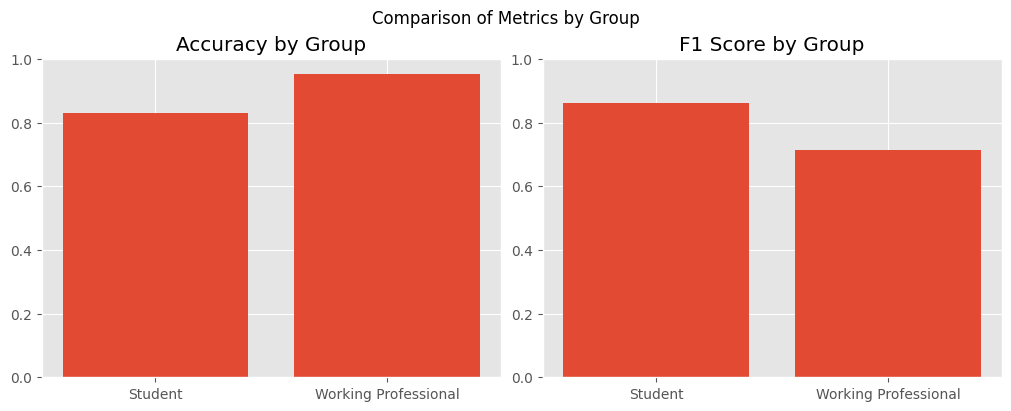

In [208]:
metrics = {"Accuracy": [], "F1 Score": []}
groups = ["Student", "Working Professional"]
for group in groups:
    mask = final_results["Working Professional or Student"] == group
    y_true_group = final_results[mask]["Depression"]
    y_pred_group = final_results[mask]["Prediction"]
    
    metrics["Accuracy"].append(accuracy_score(y_true_group, y_pred_group))
    metrics["F1 Score"].append(f1_score(y_true_group, y_pred_group))

fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

axes[0].bar(groups, metrics["Accuracy"])
axes[0].set_title("Accuracy by Group")
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_ylim(0, 1)

axes[1].bar(groups, metrics["F1 Score"])
axes[1].set_title("F1 Score by Group")
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].set_ylim(0, 1)

plt.suptitle("Comparison of Metrics by Group", fontsize=12)
plt.show()

Here, we clearly see the limitations of accuracy. For students, the F1-Score is higher, but the accuracy is lower compared to professionals. Among professionals, the class $y=0$ is the majority, and the model predicts it very well. However, the class $y=1$, which is the most important, is the minority and therefore harder to predict. **So don't trust the accuracy !**

In [160]:
error_analysis = final_results.copy()

numeric_columns = [
     "CGPA", "Age"
]

error_analysis['BCE Loss'] = error_analysis.apply(
    lambda row: log_loss([row['Depression']], [row['Probability_1']], labels=[0, 1]), axis=1
)

error_analysis['BCE Loss'] = error_analysis.apply(
    lambda row: log_loss([row['Depression']], [row['Probability_1']], labels=[0, 1]), axis=1
)

weights = compute_sample_weight('balanced', error_analysis['Depression'])
error_analysis['Weighted Log Loss'] = error_analysis.apply(
    lambda row: log_loss(
        [row['Depression']],
        [row['Probability_1']],
        labels=[0, 1],
        sample_weight=[weights[row.name]]
    ),
    axis=1
)

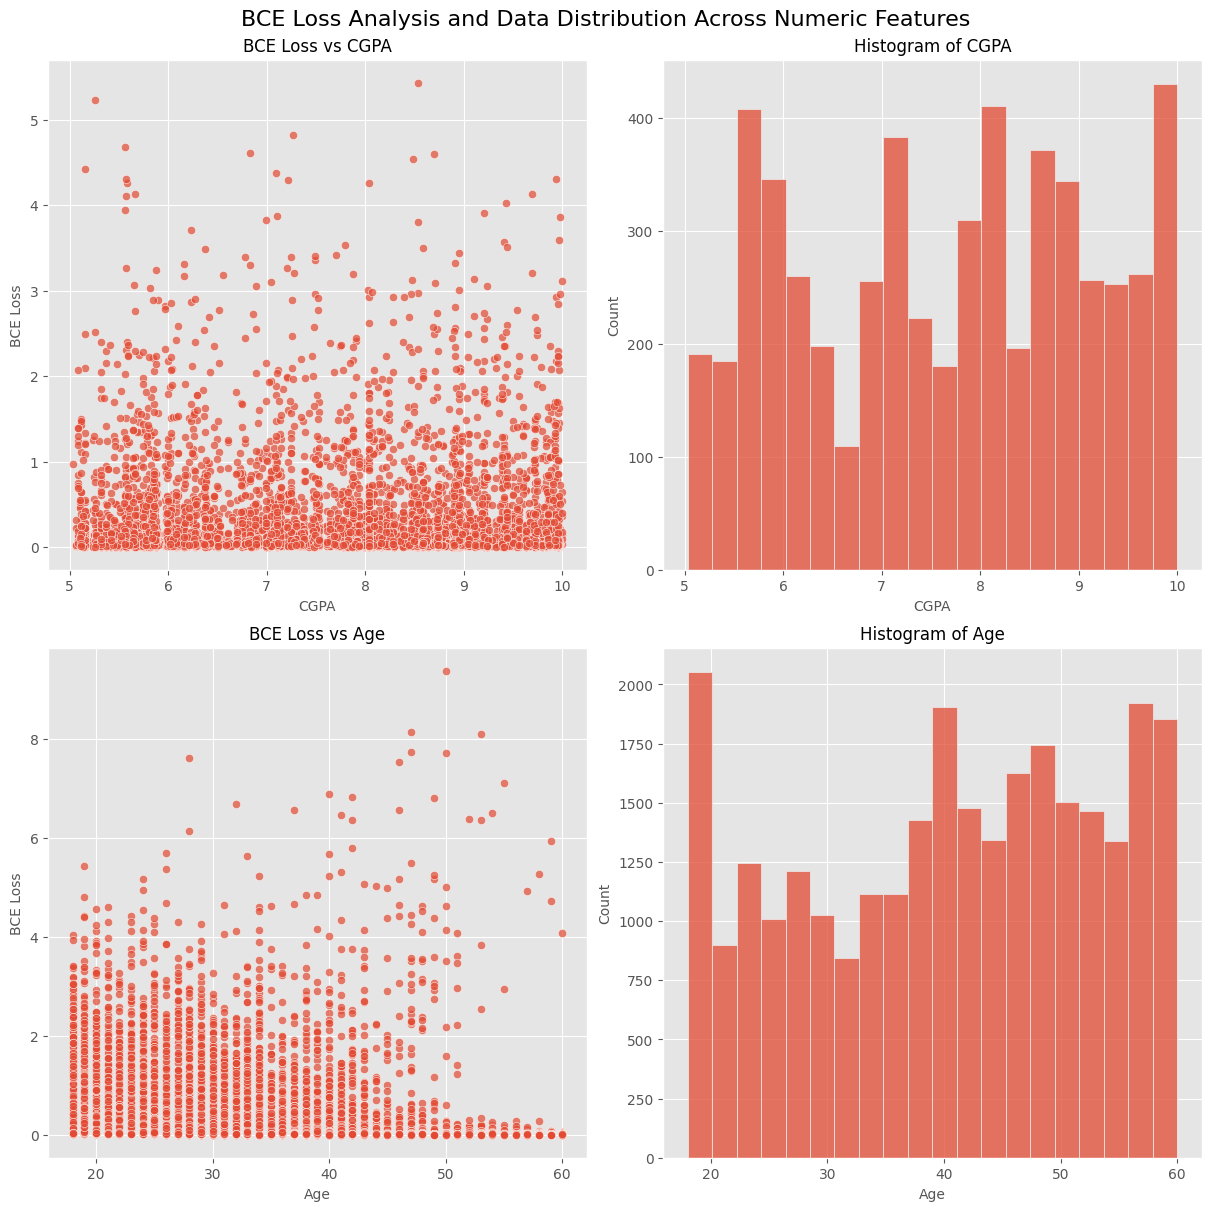

In [161]:
numeric_columns = ["CGPA", "Age"]

fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(12, 6 * len(numeric_columns)), constrained_layout=True)

for i, column in enumerate(numeric_columns):
    sns.scatterplot(
        data=error_analysis,
        x=column,
        y="BCE Loss",
        alpha=0.7,
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f"BCE Loss vs {column}", fontsize=12)
    axes[i, 0].set_xlabel(column, fontsize=10)
    axes[i, 0].set_ylabel("BCE Loss", fontsize=10)

    sns.histplot(
        data=error_analysis,
        x=column,
        kde=False,
        bins=20,
        ax=axes[i, 1]
    )
    axes[i, 1].set_title(f"Histogram of {column}", fontsize=12)
    axes[i, 1].set_xlabel(column, fontsize=10)
    axes[i, 1].set_ylabel("Count", fontsize=10)

plt.suptitle("BCE Loss Analysis and Data Distribution Across Numeric Features", fontsize=16)
plt.show()

The model appears to perform better as age increases, which aligns with the trend we observed regarding depression rates decreasing over the years.

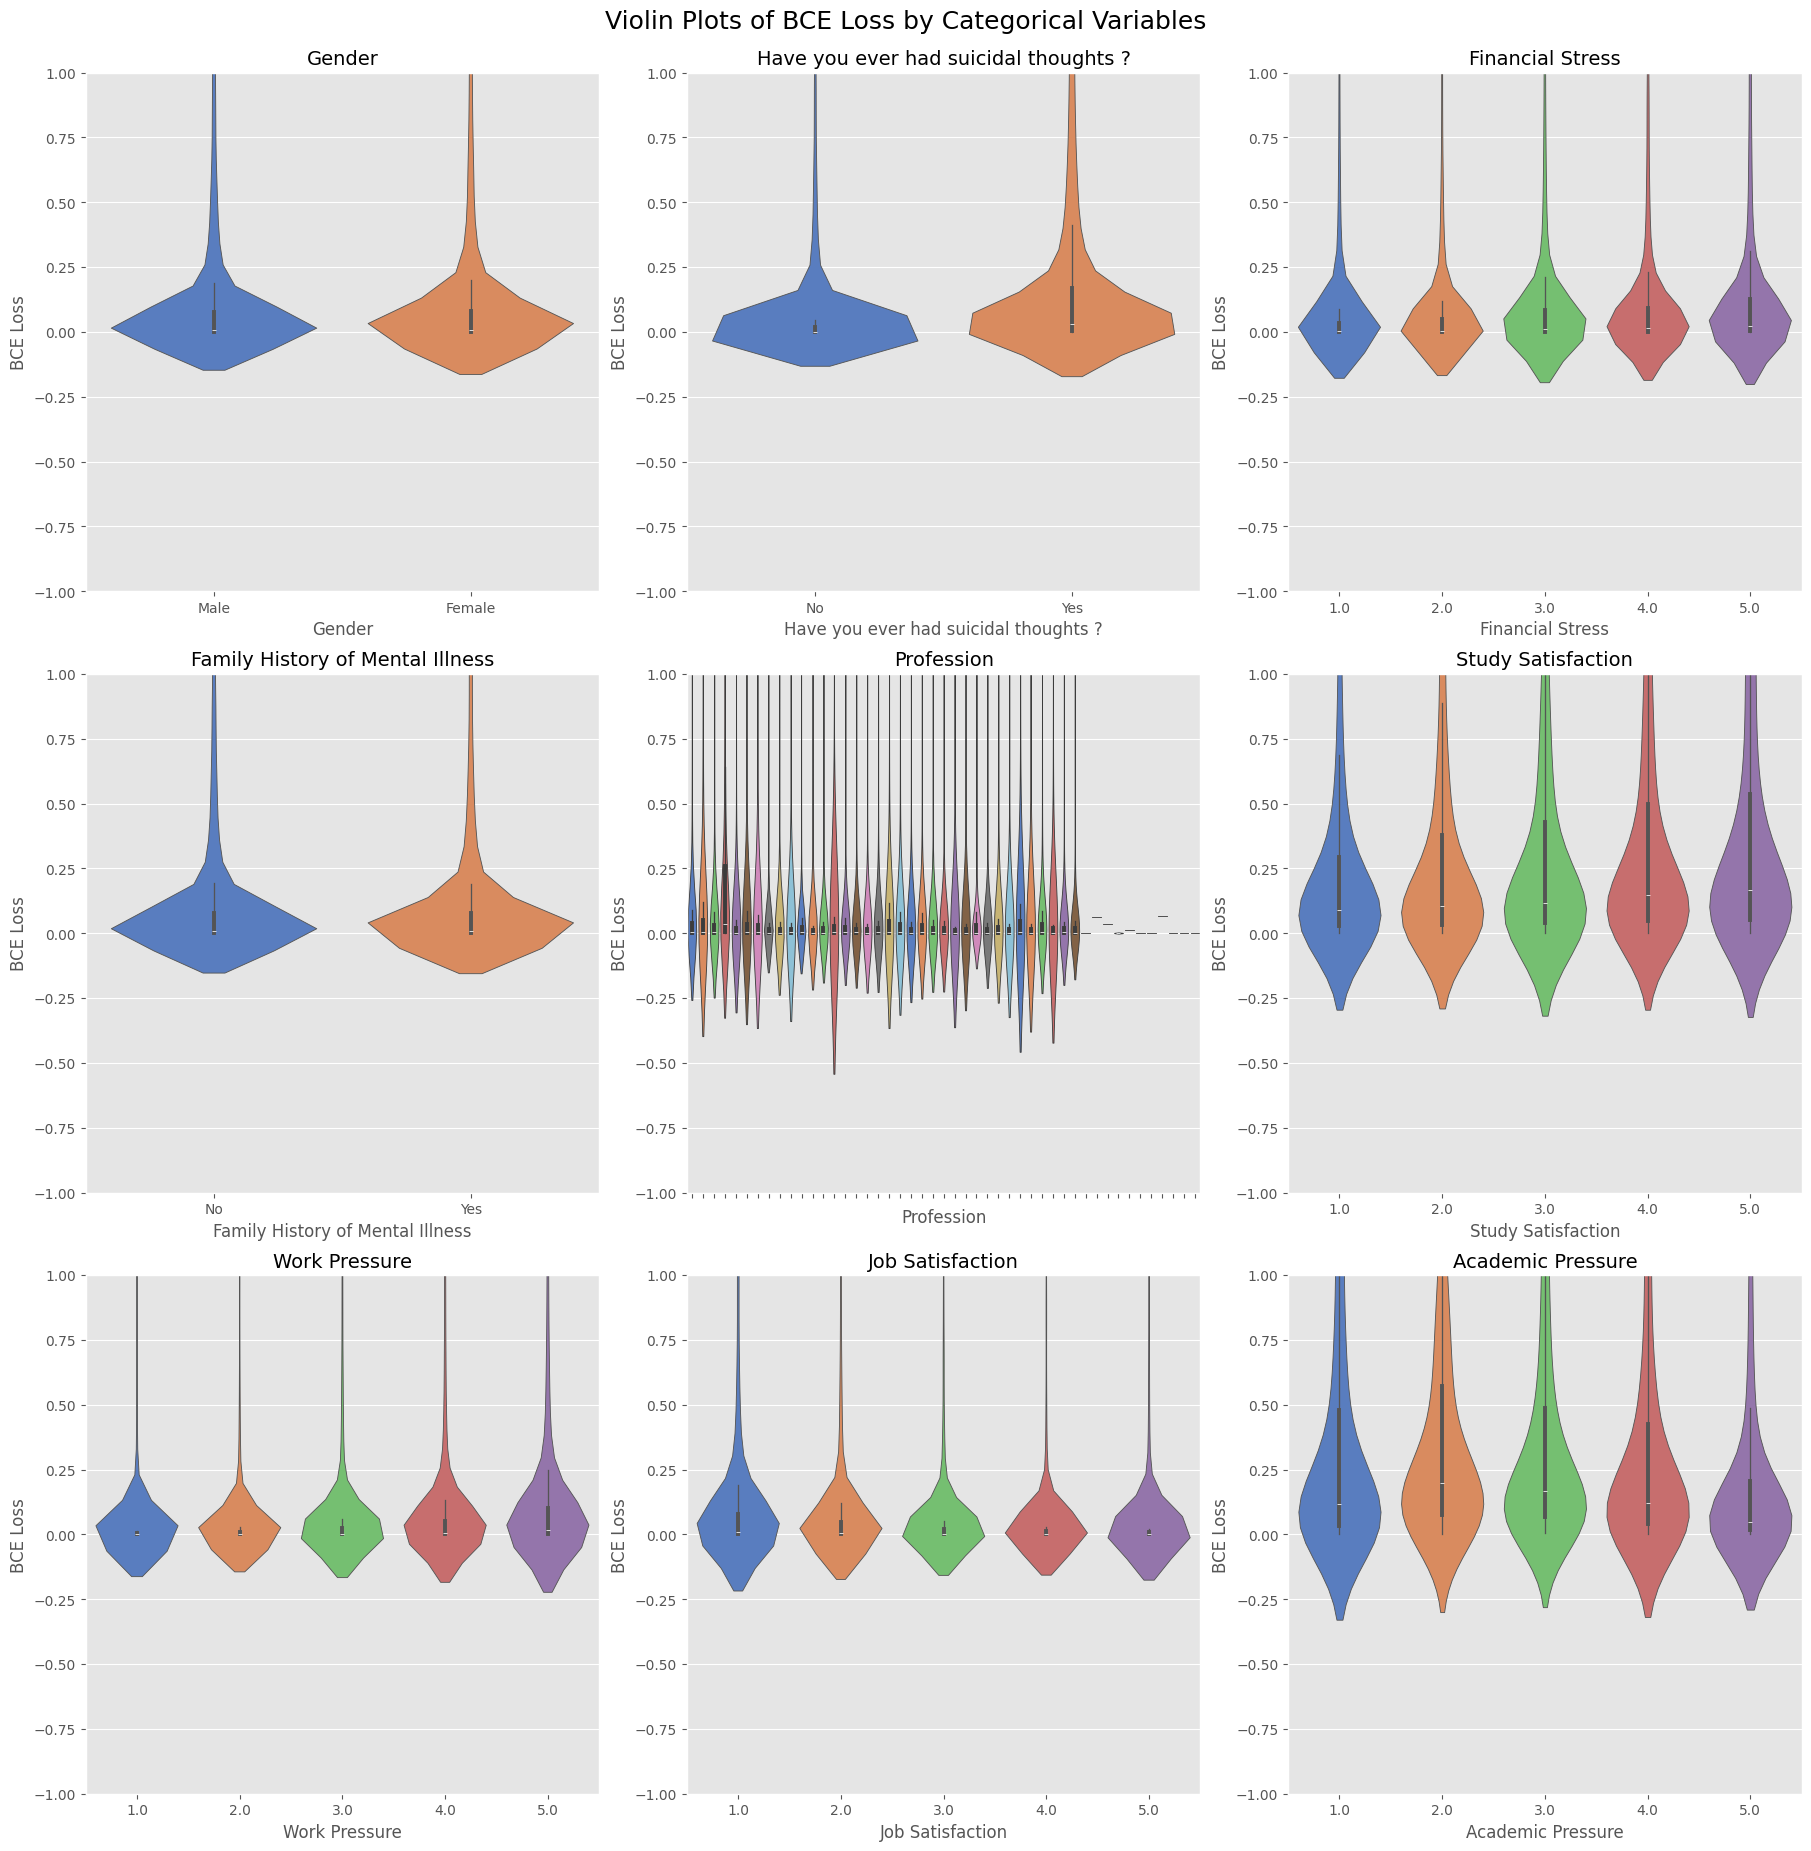

In [162]:
categorical_columns = [
    "Gender", "Have you ever had suicidal thoughts ?", 
    "Financial Stress", "Family History of Mental Illness", 
    "Profession", "Study Satisfaction", "Work Pressure", 
    "Job Satisfaction", "Academic Pressure"
]

num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows), constrained_layout=True)

axes = axes.flatten()

for i, column in enumerate(categorical_columns):

    ax = axes[i]

    sns.violinplot(
        data=error_analysis,
        x=column,
        y="BCE Loss",
        scale="width",
        inner="box",
        palette="muted",
        ax=ax
    )
    ax.set_title(f"{column}", fontsize=14)
    ax.set_xlabel(column)
    if column == "Profession":
        ax.set_xticklabels([])
    ax.set_ylabel("BCE Loss")
    ax.set_ylim(-1, 1)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Violin Plots of BCE Loss by Categorical Variables", fontsize=18, y=1.02)
plt.show()

The distribution of errors across categories appears relatively uniform for most columns.  
However, certain categories exhibit more concentrated distributions, indicating fewer large errors.

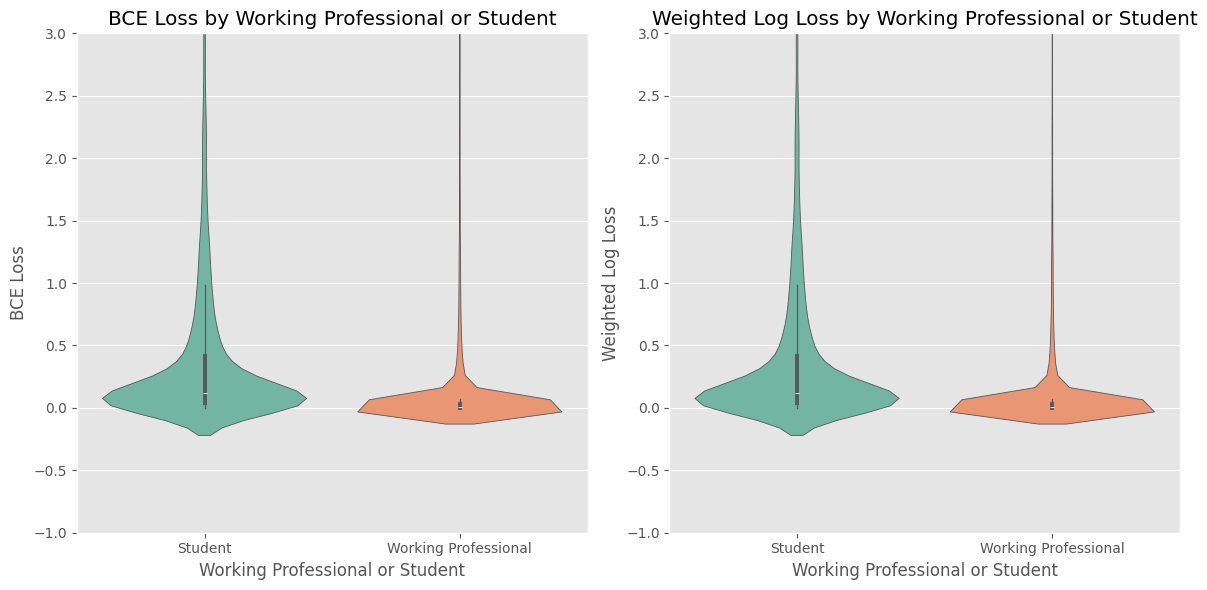

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.violinplot(
    data=error_analysis,
    x="Working Professional or Student",
    y="BCE Loss",
    palette="Set2",
    inner="box",
    scale="width",
    ax=axes[0]
)

axes[0].set_title("BCE Loss by Working Professional or Student")

axes[0].set_ylim(-1, 3)

sns.violinplot(
    data=error_analysis,
    x="Working Professional or Student",
    y="Weighted Log Loss",
    palette="Set2",
    inner="box",
    scale="width",
    ax=axes[1]
)

axes[1].set_title("Weighted Log Loss by Working Professional or Student")

axes[1].set_ylim(-1, 3)

plt.tight_layout()
plt.show()

The error rate appears lower for professionals compared to students. This is primarily because the model predicts $y = 0$, which accounts for $90\%$ of the data, with high accuracy.

<a id="precision-recall-threshold-dynamics"></a>
### **4.2 Precision-Recall Threshold**

Before deploying the model into production, once it is trained and refined, it is crucial to consider the context and use case.

There is one final parameter to tune: $P(y=1 \mid \mathbf{x}; \Theta) \geq t$, where $\Theta$ represents all the model's parameters. This threshold allows us to address the previously mentioned question: **Do we want to target all depressive students or focus on minimizing false positives for non-depressive ones?** 

This question is not purely technical but rather domain-specific, depending on the client's needs and objectives.  
We can represent this trade-off visually using the precision-recall curve. Here, we can decide either:
- To adopt a single global threshold $t$, or
- To address this question separately for students and professionals by introducing two thresholds, $t_{\text{student}}$ and $t_{\text{pro}}$.

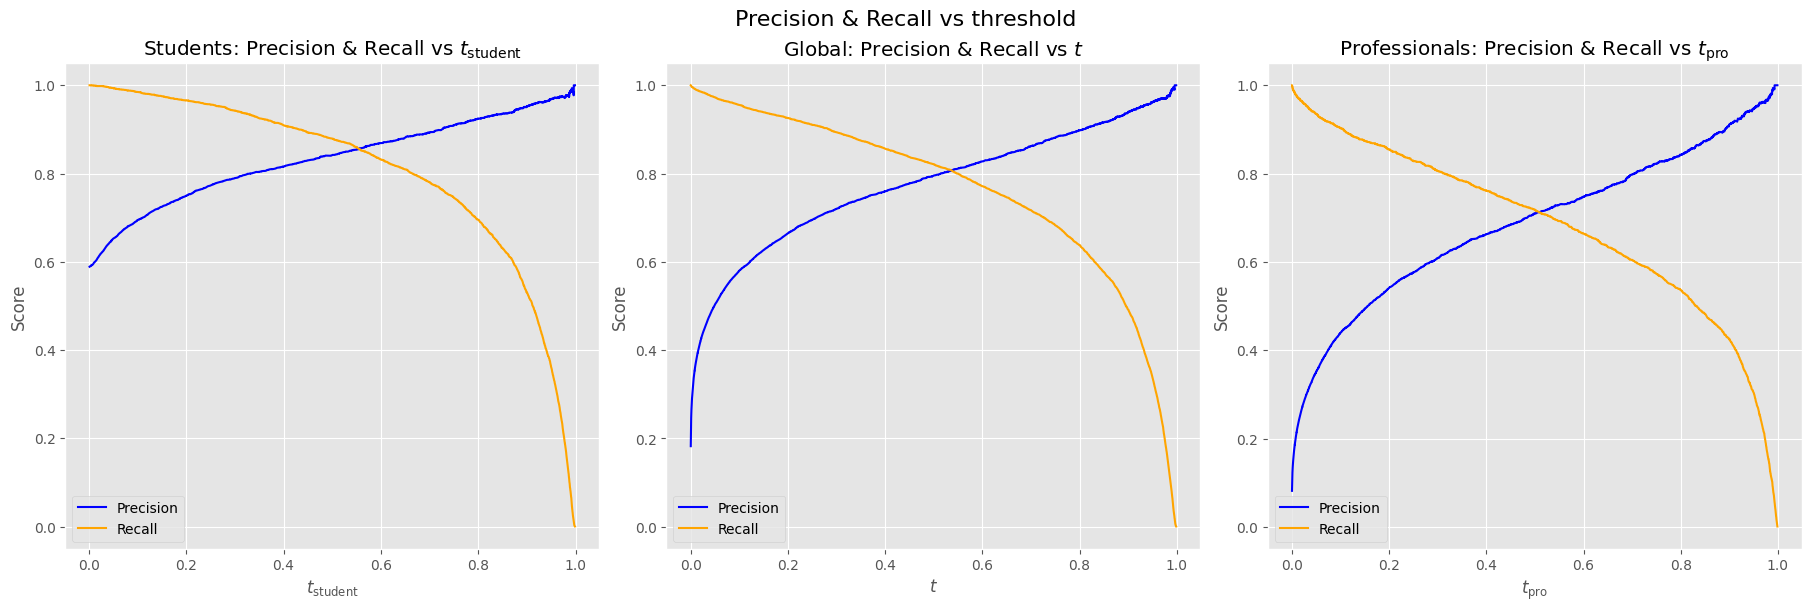

In [164]:
students = error_analysis[error_analysis['Working Professional or Student'] == 'Student']
professionals = error_analysis[error_analysis['Working Professional or Student'] == 'Working Professional']

y_true_students = students['Depression']
y_scores_students = students['Probability_1']

y_true_pros = professionals['Depression']
y_scores_pros = professionals['Probability_1']

y_true_global = error_analysis['Depression']
y_scores_global = error_analysis['Probability_1']

precision_student, recall_student, thresholds_student = precision_recall_curve(y_true_students, y_scores_students)
precision_pro, recall_pro, thresholds_pro = precision_recall_curve(y_true_pros, y_scores_pros)
precision_global, recall_global, thresholds_global = precision_recall_curve(y_true_global, y_scores_global)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

axes[0].plot(thresholds_student, precision_student[:-1], label="Precision", color="blue")
axes[0].plot(thresholds_student, recall_student[:-1], label="Recall", color="orange")
axes[0].set_title("Students: Precision & Recall vs $t_{\\text{student}}$")
axes[0].set_xlabel("$t_{\\text{student}}$")
axes[0].set_ylabel("Score")
axes[0].legend()

axes[1].plot(thresholds_global, precision_global[:-1], label="Precision", color="blue")
axes[1].plot(thresholds_global, recall_global[:-1], label="Recall", color="orange")
axes[1].set_title("Global: Precision & Recall vs $t$")
axes[1].set_xlabel("$t$")
axes[1].set_ylabel("Score")
axes[1].legend()

axes[2].plot(thresholds_pro, precision_pro[:-1], label="Precision", color="blue")
axes[2].plot(thresholds_pro, recall_pro[:-1], label="Recall", color="orange")
axes[2].set_title("Professionals: Precision & Recall vs $t_{\\text{pro}}$")
axes[2].set_xlabel("$t_{\\text{pro}}$")
axes[2].set_ylabel("Score")
axes[2].legend()

plt.suptitle("Precision & Recall vs threshold", fontsize=16)
plt.show()

The intersection represents the point where the F1-score is maximized.  
If we aim for a good balance between precision and recall, this is the optimal choice.  
Otherwise, we can adjust the threshold to optimize either precision or recall, depending on the specific requirements of the use case.

## **Conclusion**

---

### **Project Summary**

In this notebook, we developed a model to determine whether an individual is depressive or not.

1. **Exploratory Data Analysis (EDA)**:
   - After an initial EDA phase, we decided to split the dataset into two subsets (students and professionals) to better handl NaNs.

2. **Detailed Data Exploration**:
   - For each model, we delved deeper into the data using PCA.

3. **Training Optimization**:
   - Various techniques were explored to optimize model hyperparameters, along with methods to address class imbalance.

4. **Performance Analysis**:
   - Robust metrics were used to assess the models' performance, highlighting their strengths and weaknesses.

5. **Global Error Analysis**:
   - We performed a global error analysis to identify areas of improvement and draft requirements for future iterations of the project.

6. **Decision Threshold**:
   - Lastly, we studied the critical parameter of binary classification: the decision threshold. A method tailored to our context was proposed to adjust this parameter optimally.

### **To Go Further**

- **Increase Data Availability**: Gather more data on depressive professionals to improve representativeness and model accuracy.  

- **Global vs Local Prediction**: Compare the results of a global prediction model (without splitting the dataset) with those obtained from the current split approach  
(this comparison was initially explored in the competition using the accuracy metric).  

- **Alternative Sampling Approaches**: Experiment with more traditional undersampling techniques, leveraging Hoeffding's inequality to ensure reliable results.

## **References**

1. **Tree-Structured Parzen Estimator**:  
   *Understanding Its Algorithm Components and Their Roles for Better Empirical Performance*.  
   [Paper Link](https://arxiv.org/pdf/2304.11127)

2. **Nonuniform Negative Sampling and Log Odds Correction**:  
   *Application to Rare Events Data*.  
   [Paper Link](https://arxiv.org/pdf/2110.13048)

3. **AI Edge Newsletter**:  
   [Newsletter Link](https://learn.theaiedge.io/p/home)

4. **Hyper-Parameter Optimization**:  
   *A Review of Algorithms and Applications*.  
   [Paper Link](https://arxiv.org/pdf/2003.05689)

5. **Maths for Deep Learning**:  
   Ronald T. Kneusel, *Summary Statistics Section in Chapter: Statistics*, page 72.  